SLEEP MEDICINE LLM BENCHMARKING STUDY
NPJ Digital Medicine Analysis Pipeline

Data loaded from: E:\test\sleep\Final_results.xlsx
  • Human Rater 1: 129 cases, 14 columns
  • Human Rater 2: 129 cases, 12 columns
  • Case Info:     129 cases, 14 columns
  • Averaged:      129 cases, 19 columns

Models evaluated: GPT, Deepseek, Claude, Gemini, Grok
Utility functions defined successfully.
  • parse_age(): Handle mixed age formats
  • kappa_ci(): Cohen's kappa with bootstrap CI
  • mean_ci(): Mean with bootstrap CI
  • classify_domain(): Standardize clinical domains
  • save_figure(): Multi-format figure export

TABLE 1: DEMOGRAPHIC CHARACTERISTICS OF CLINICAL CASES

Characteristic                                     Value
---------------------------------------------------------
Total cases, n                                       129

Age, years                         
  Mean ± SD                         41.7 ± 22.4
  Median (IQR)                      39.0 (25.0–59.0)
  Range            

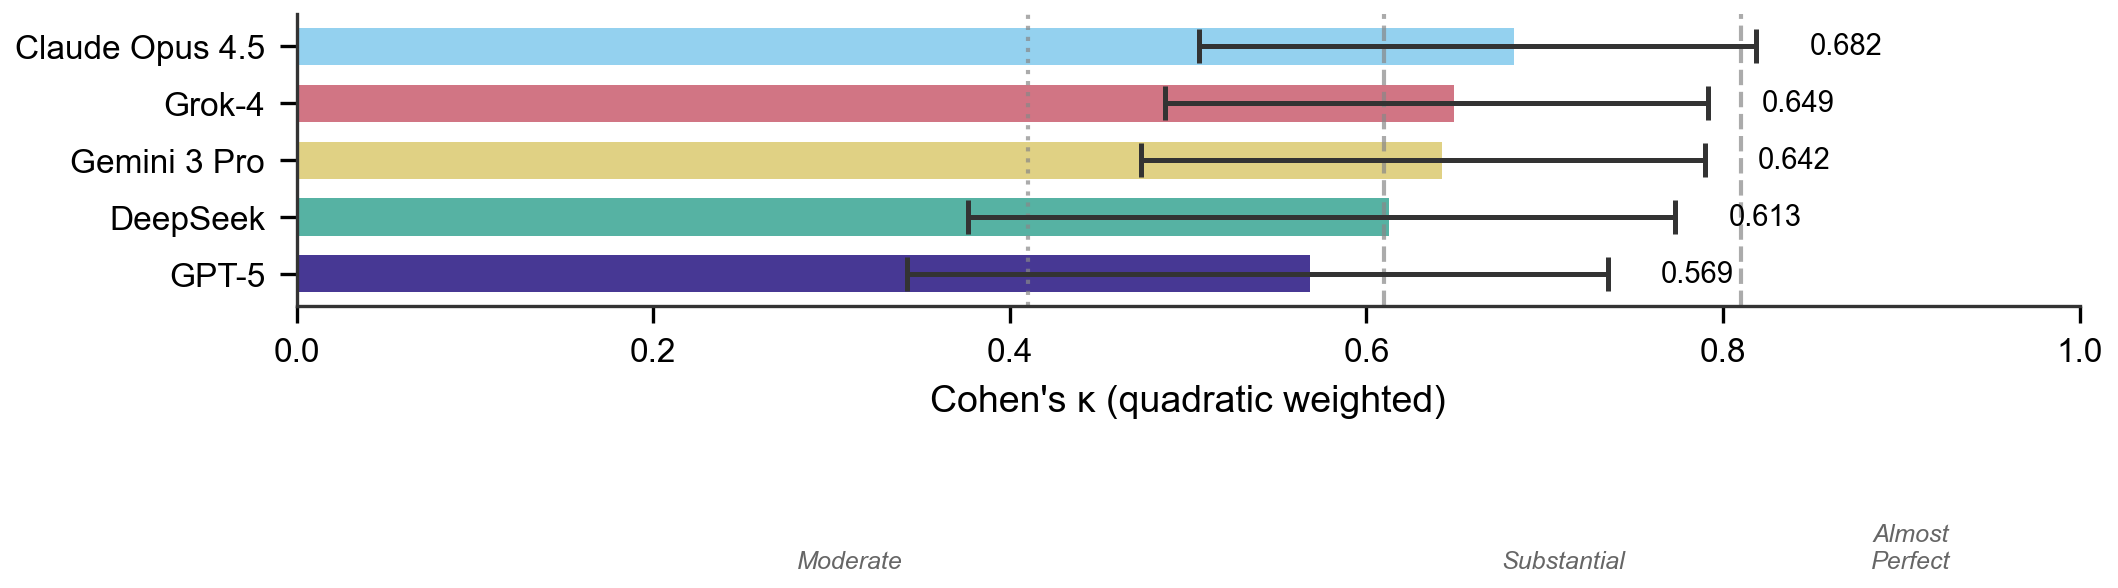

✓ Figure 1 saved to figures/

TABLE 3: DIAGNOSTIC PERFORMANCE METRICS (n = 129 cases)

Model              Mean (95% CI)          SD       Top-1 (%)† Failure (%)‡  Mean Rank   Rank
-----------------------------------------------------------------------------------------------
GPT-5              4.22 (3.96–4.45)    1.42         61.2          6.2       2.85      1
DeepSeek           4.14 (3.88–4.40)    1.55         61.2          9.3       2.93      2
Claude Opus 4.5    4.03 (3.74–4.31)    1.63         61.2          9.3       3.04      3
Gemini 3 Pro       3.98 (3.69–4.27)    1.62         56.6          9.3       3.01      4
Grok-4             3.95 (3.65–4.22)    1.61         56.6          8.5       3.17      5
-----------------------------------------------------------------------------------------------
†Percentage of cases with the reference diagnosis ranked first (score = 5).
‡Percentage of cases with the reference diagnosis absent from the differential (score = 0).
SD, standard deviati

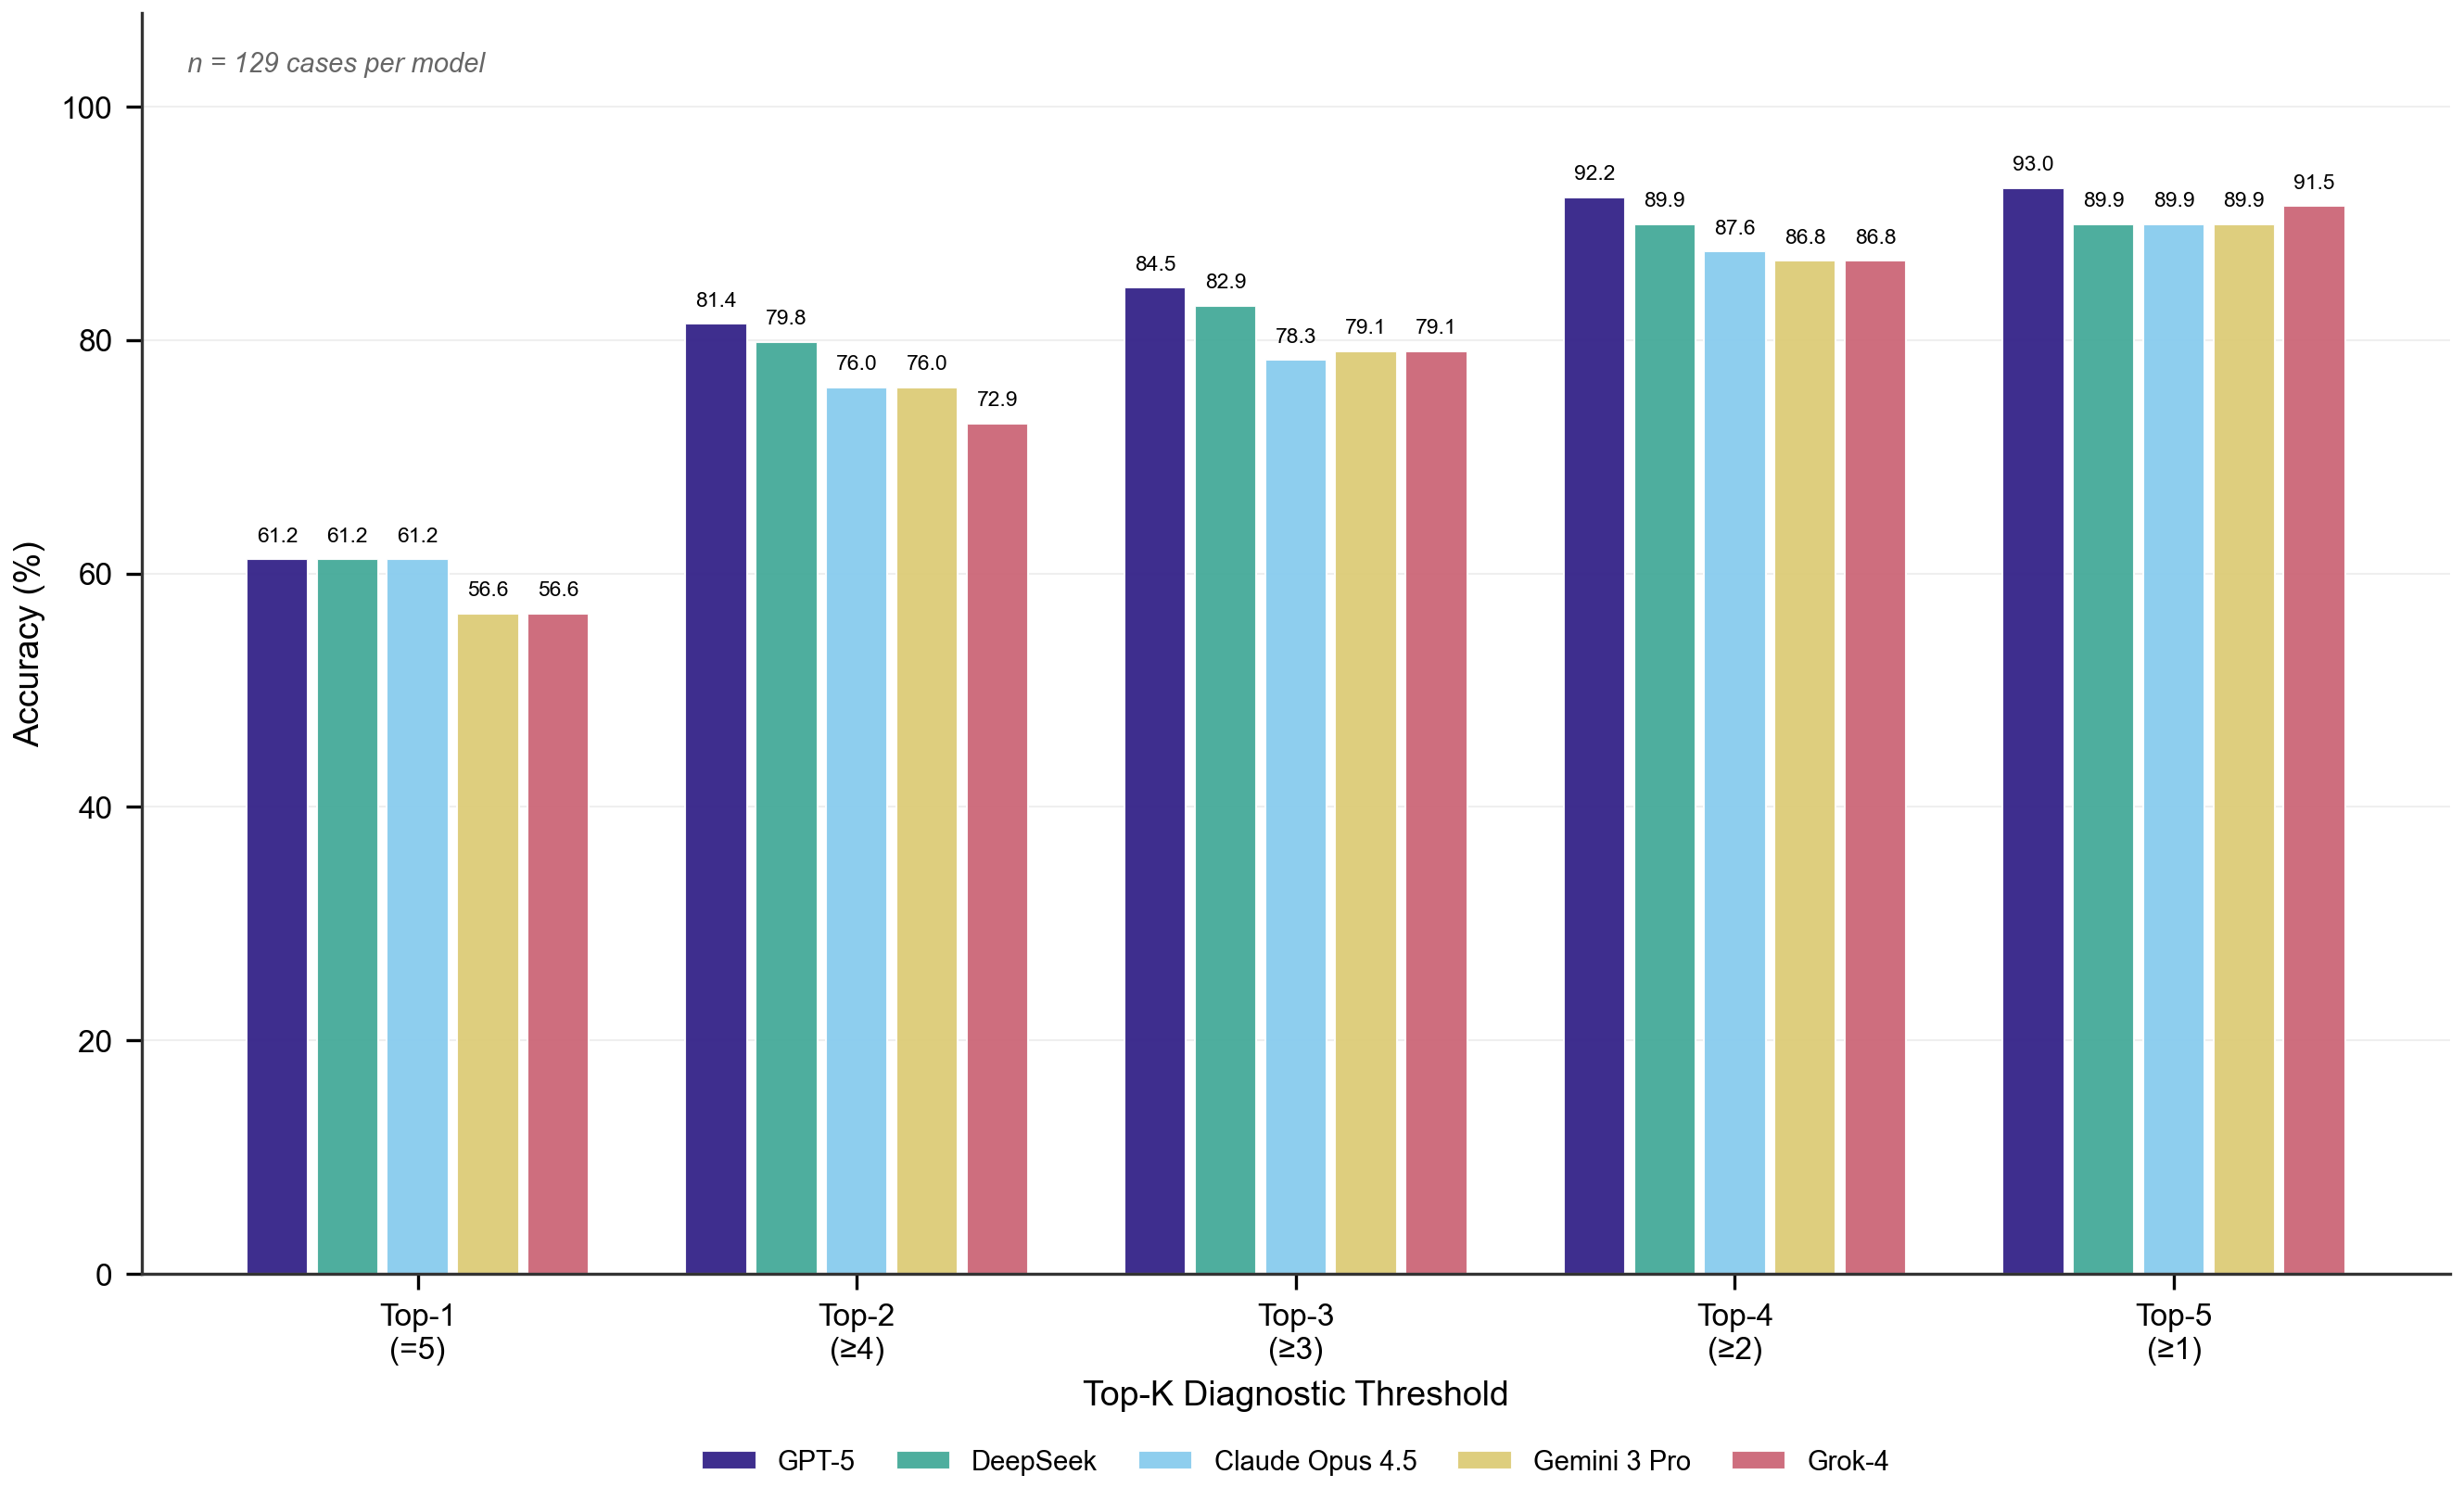

✓ Figure 2 saved to figures/

TABLE 6: MEAN DIAGNOSTIC SCORES STRATIFIED BY CASE DIFFICULTY

Difficulty             n (%)        GPT   Deepseek     Claude     Gemini       Grok
--------------------------------------------------------------------------------
Easy              76 ( 58.9%)       4.90       4.89       4.90       4.86       4.84
Moderate          41 ( 31.8%)       3.99       3.95       3.59       3.33       3.35
Difficult          1 (  0.8%)       2.00       0.00       0.00       2.50       1.50
Very Difficult    11 (  8.5%)       0.55       0.05       0.05       0.50       0.23
--------------------------------------------------------------------------------

Difficulty categories were defined based on aggregate model performance:
Easy (all models score ≥4), Moderate (mean score 2 to 4),
Difficult (mean score 1 to 2), and Very Difficult (mean score below 1).

TABLE 7: MEAN DIAGNOSTIC SCORES BY SECONDARY CLINICAL DOMAIN

Domain              n        GPT   Deepseek     Claude

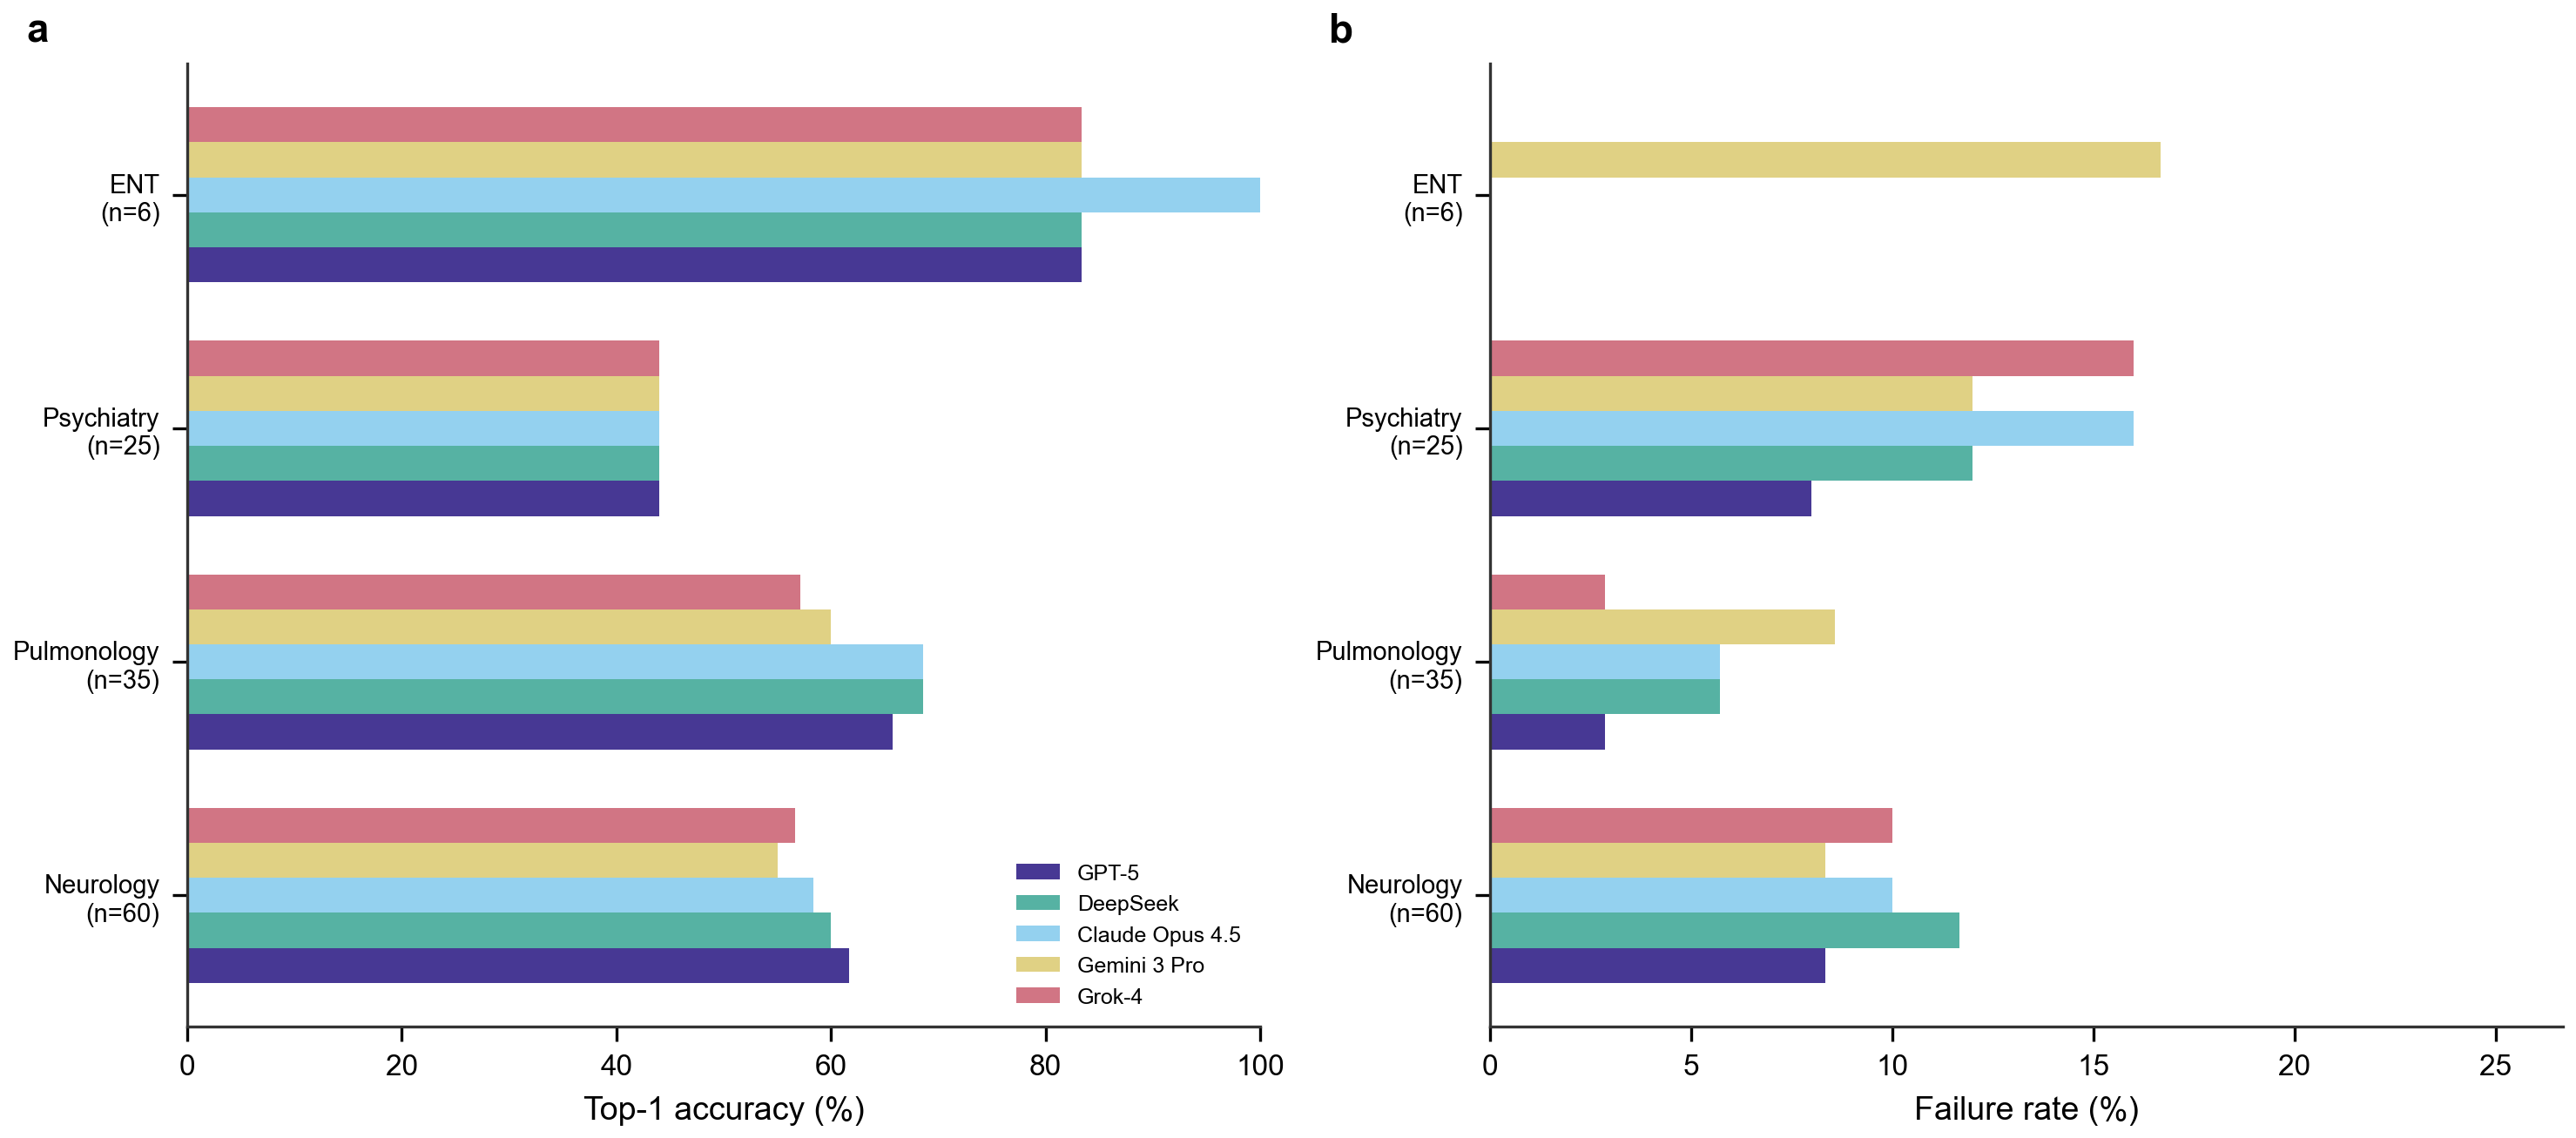

✓ Figure 3 saved to figures/

Generating Figure 4: Performance by Source Accessibility...


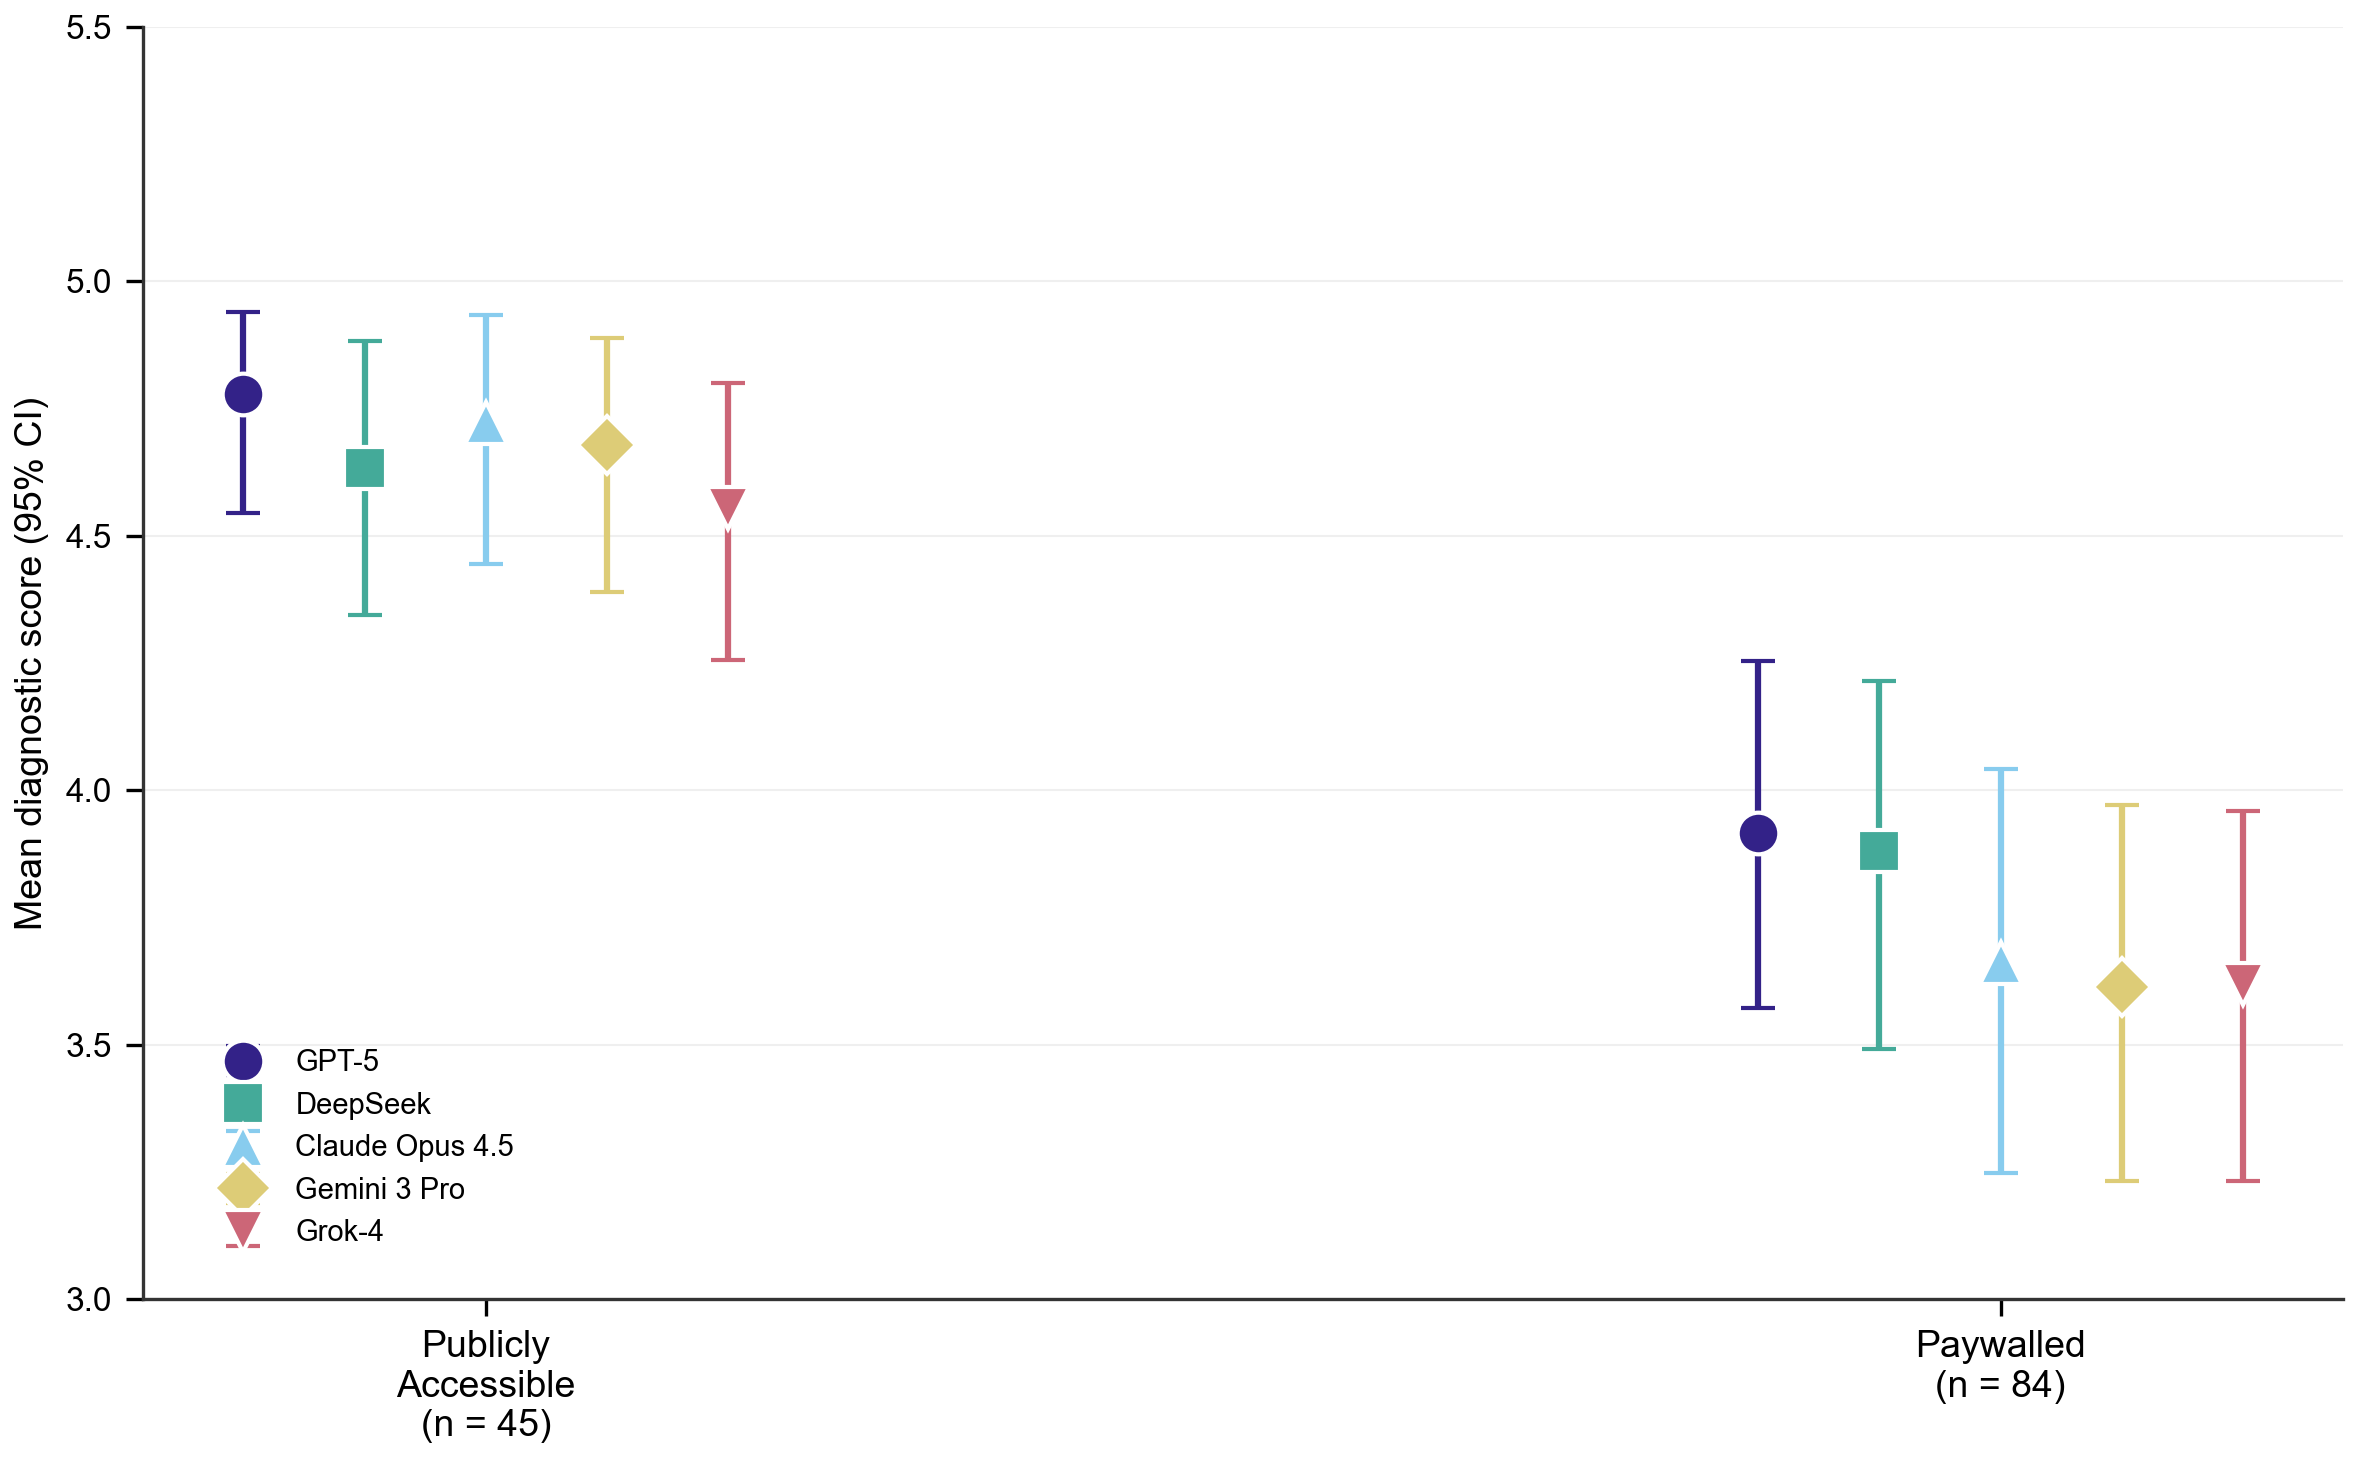

✓ Figure 4 saved to figures/

TABLE 8: PAIRWISE INTER-MODEL AGREEMENT (Spearman correlation)

Model Pair                              n   Spearman ρ      p-value
--------------------------------------------------------------------
GPT-5 vs Grok-4                       129         0.76      < 0.001
GPT-5 vs Claude Opus 4.5              129         0.76      < 0.001
DeepSeek vs Grok-4                    129         0.76      < 0.001
GPT-5 vs DeepSeek                     129         0.75      < 0.001
DeepSeek vs Claude Opus 4.5           129         0.73      < 0.001
Claude Opus 4.5 vs Grok-4             129         0.66      < 0.001
Claude Opus 4.5 vs Gemini 3 Pro       129         0.65      < 0.001
DeepSeek vs Gemini 3 Pro              129         0.61      < 0.001
GPT-5 vs Gemini 3 Pro                 129         0.56      < 0.001
Gemini 3 Pro vs Grok-4                129         0.45      < 0.001

TABLE 9: ERROR TYPE DISTRIBUTION BY MODEL

Model                 Excellent         Good 

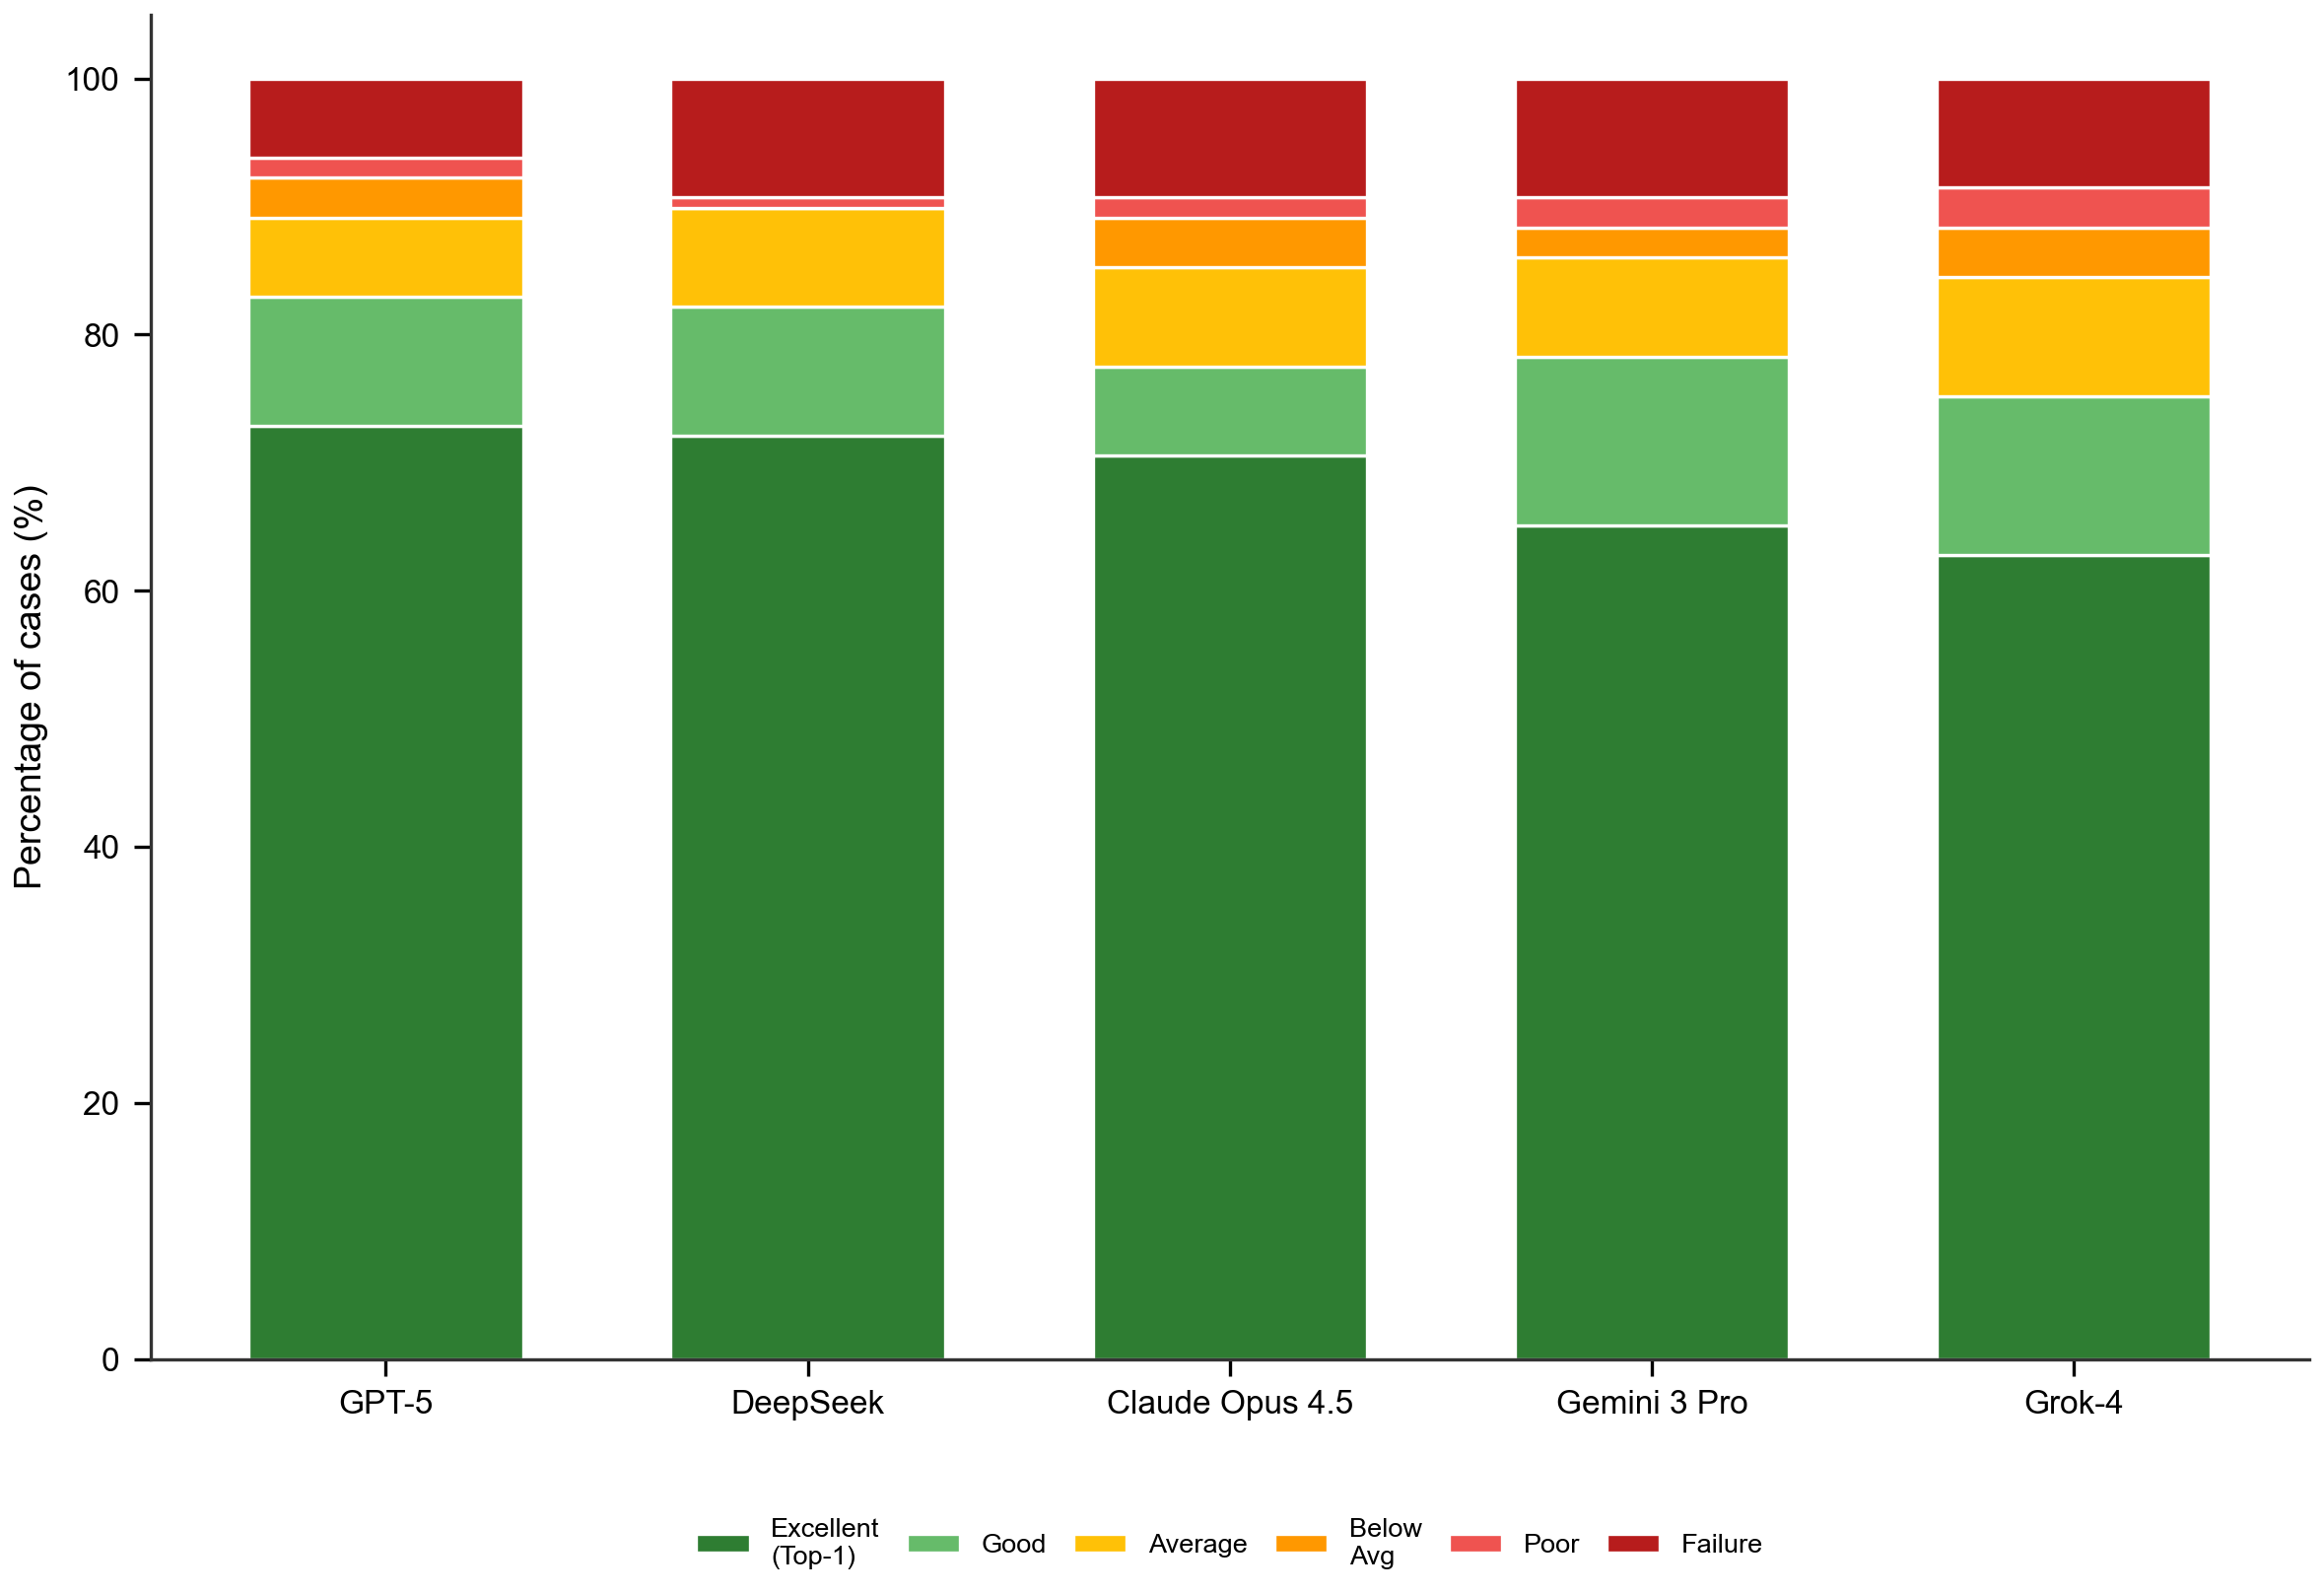

✓ Figure 5 saved to figures/

Generating Figure 6: Model Consensus Analysis...


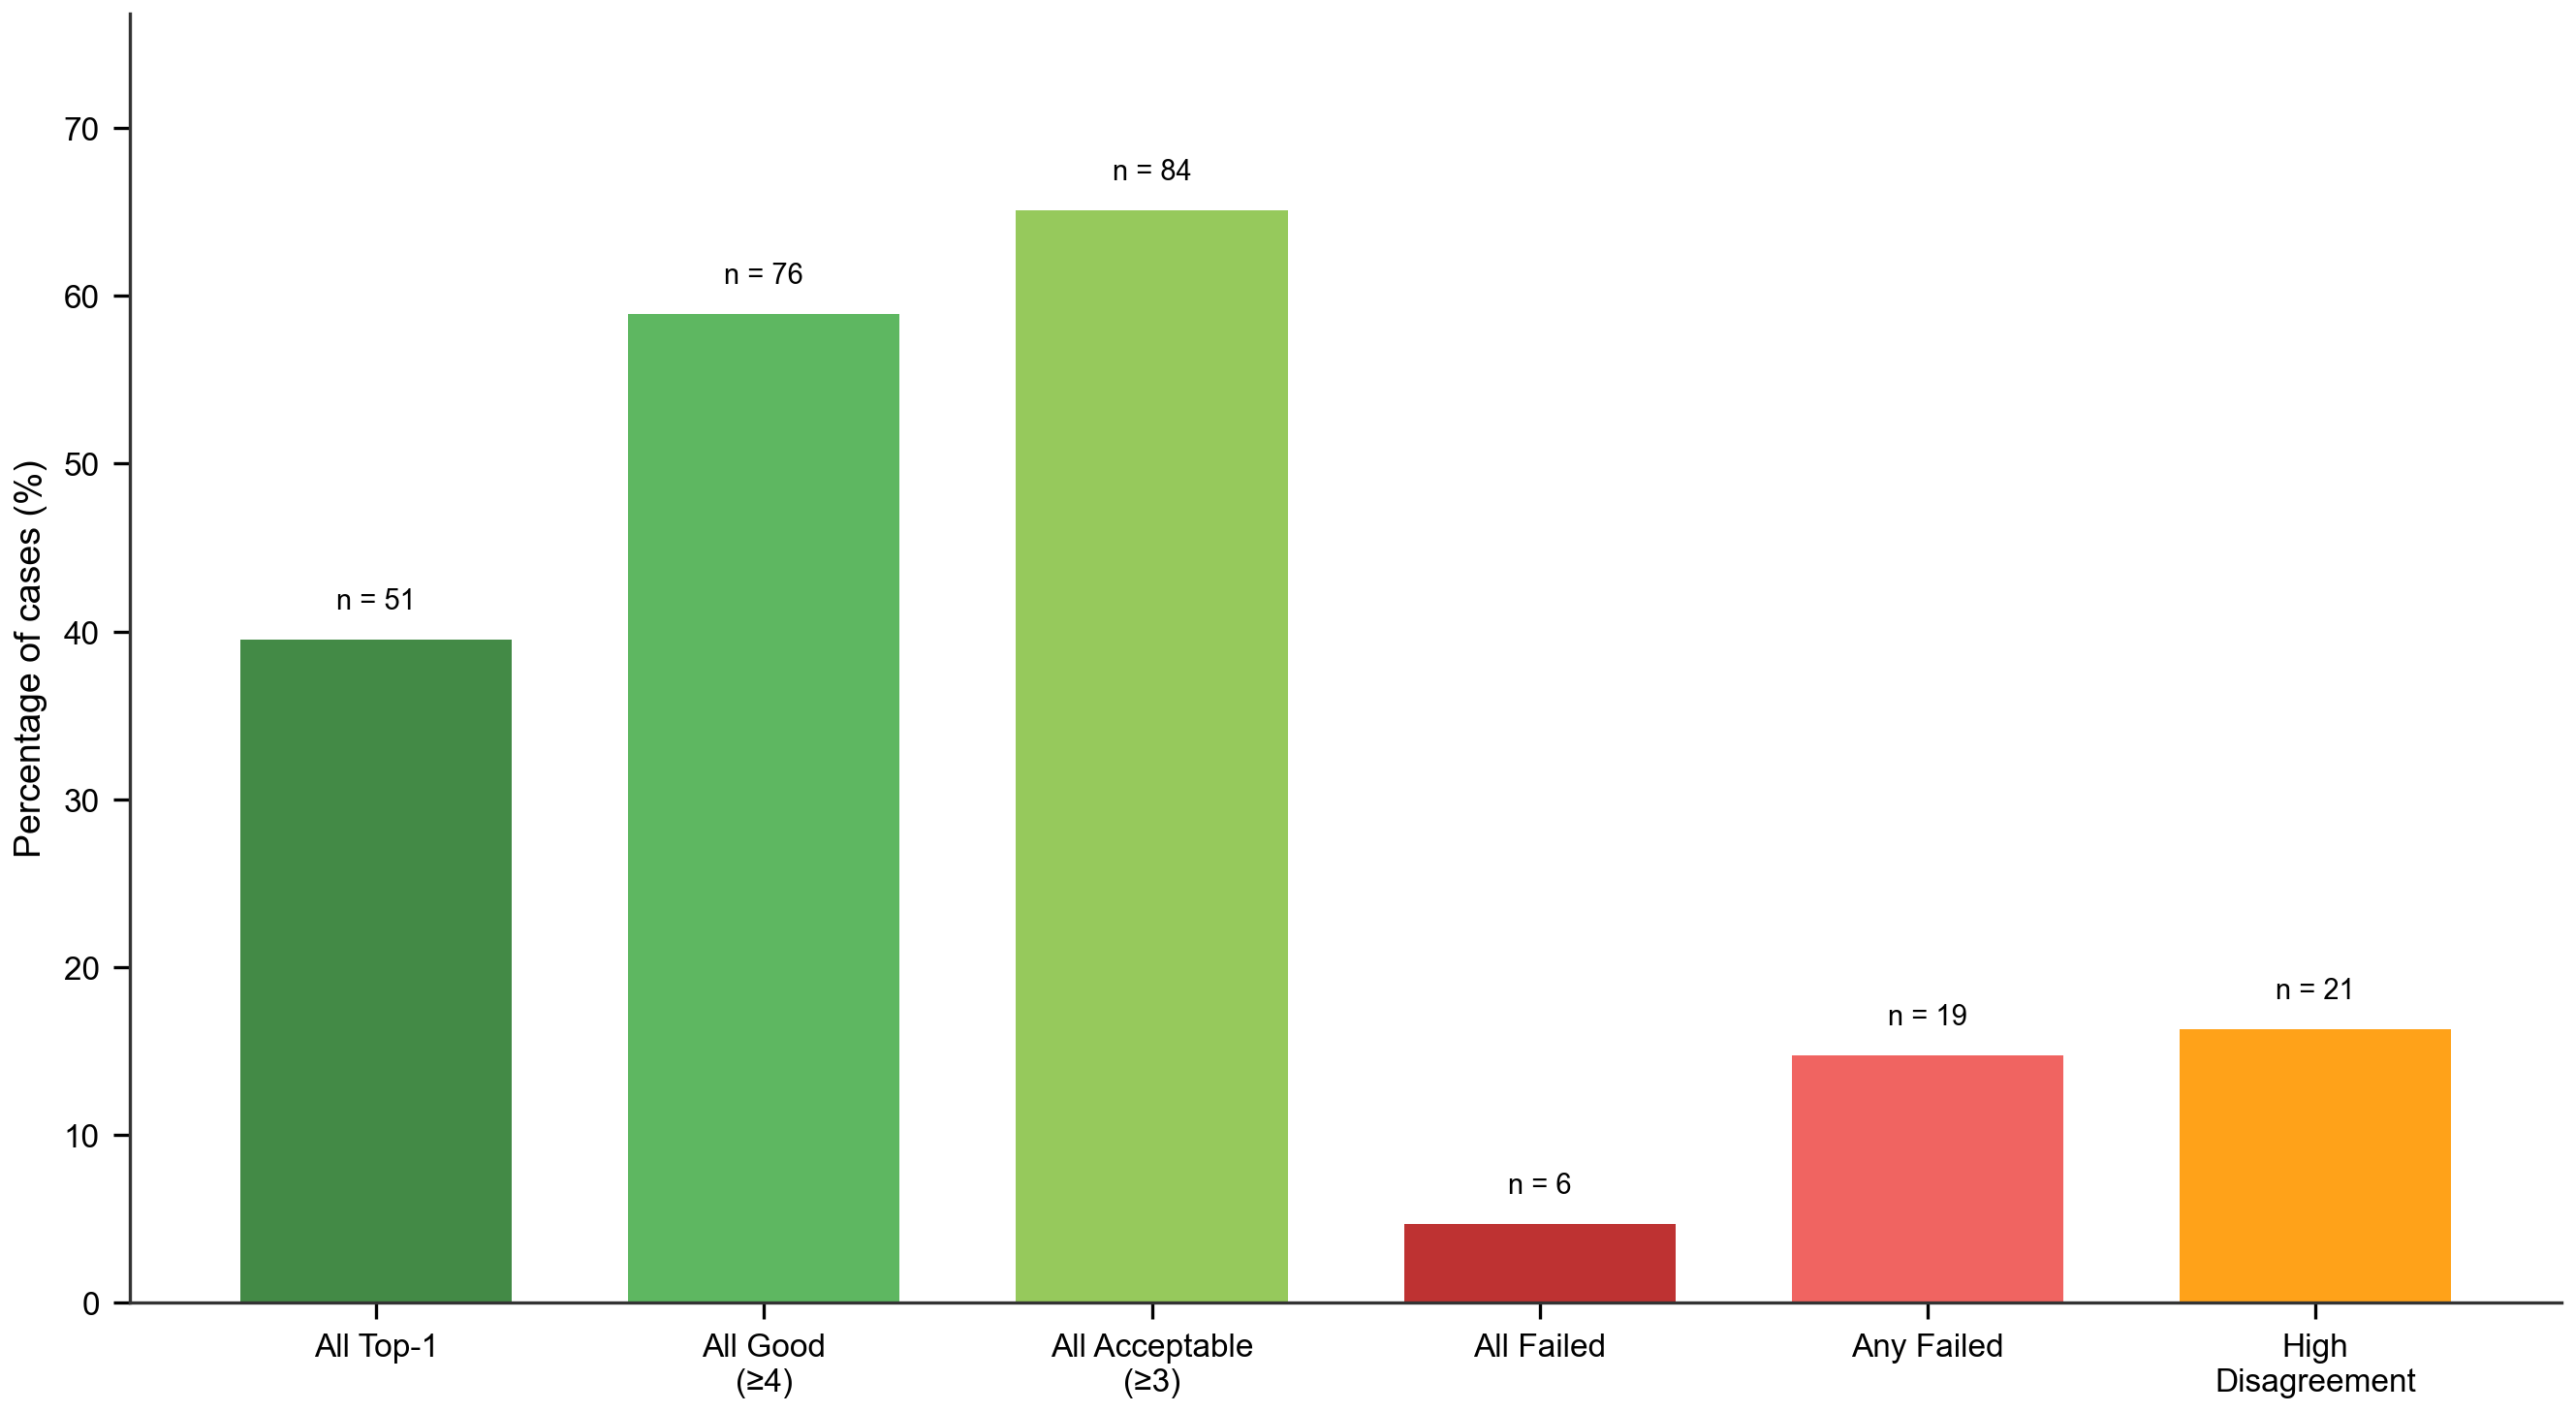

✓ Figure 6 saved to figures/

Generating Figure 7: Unique Performance Patterns...


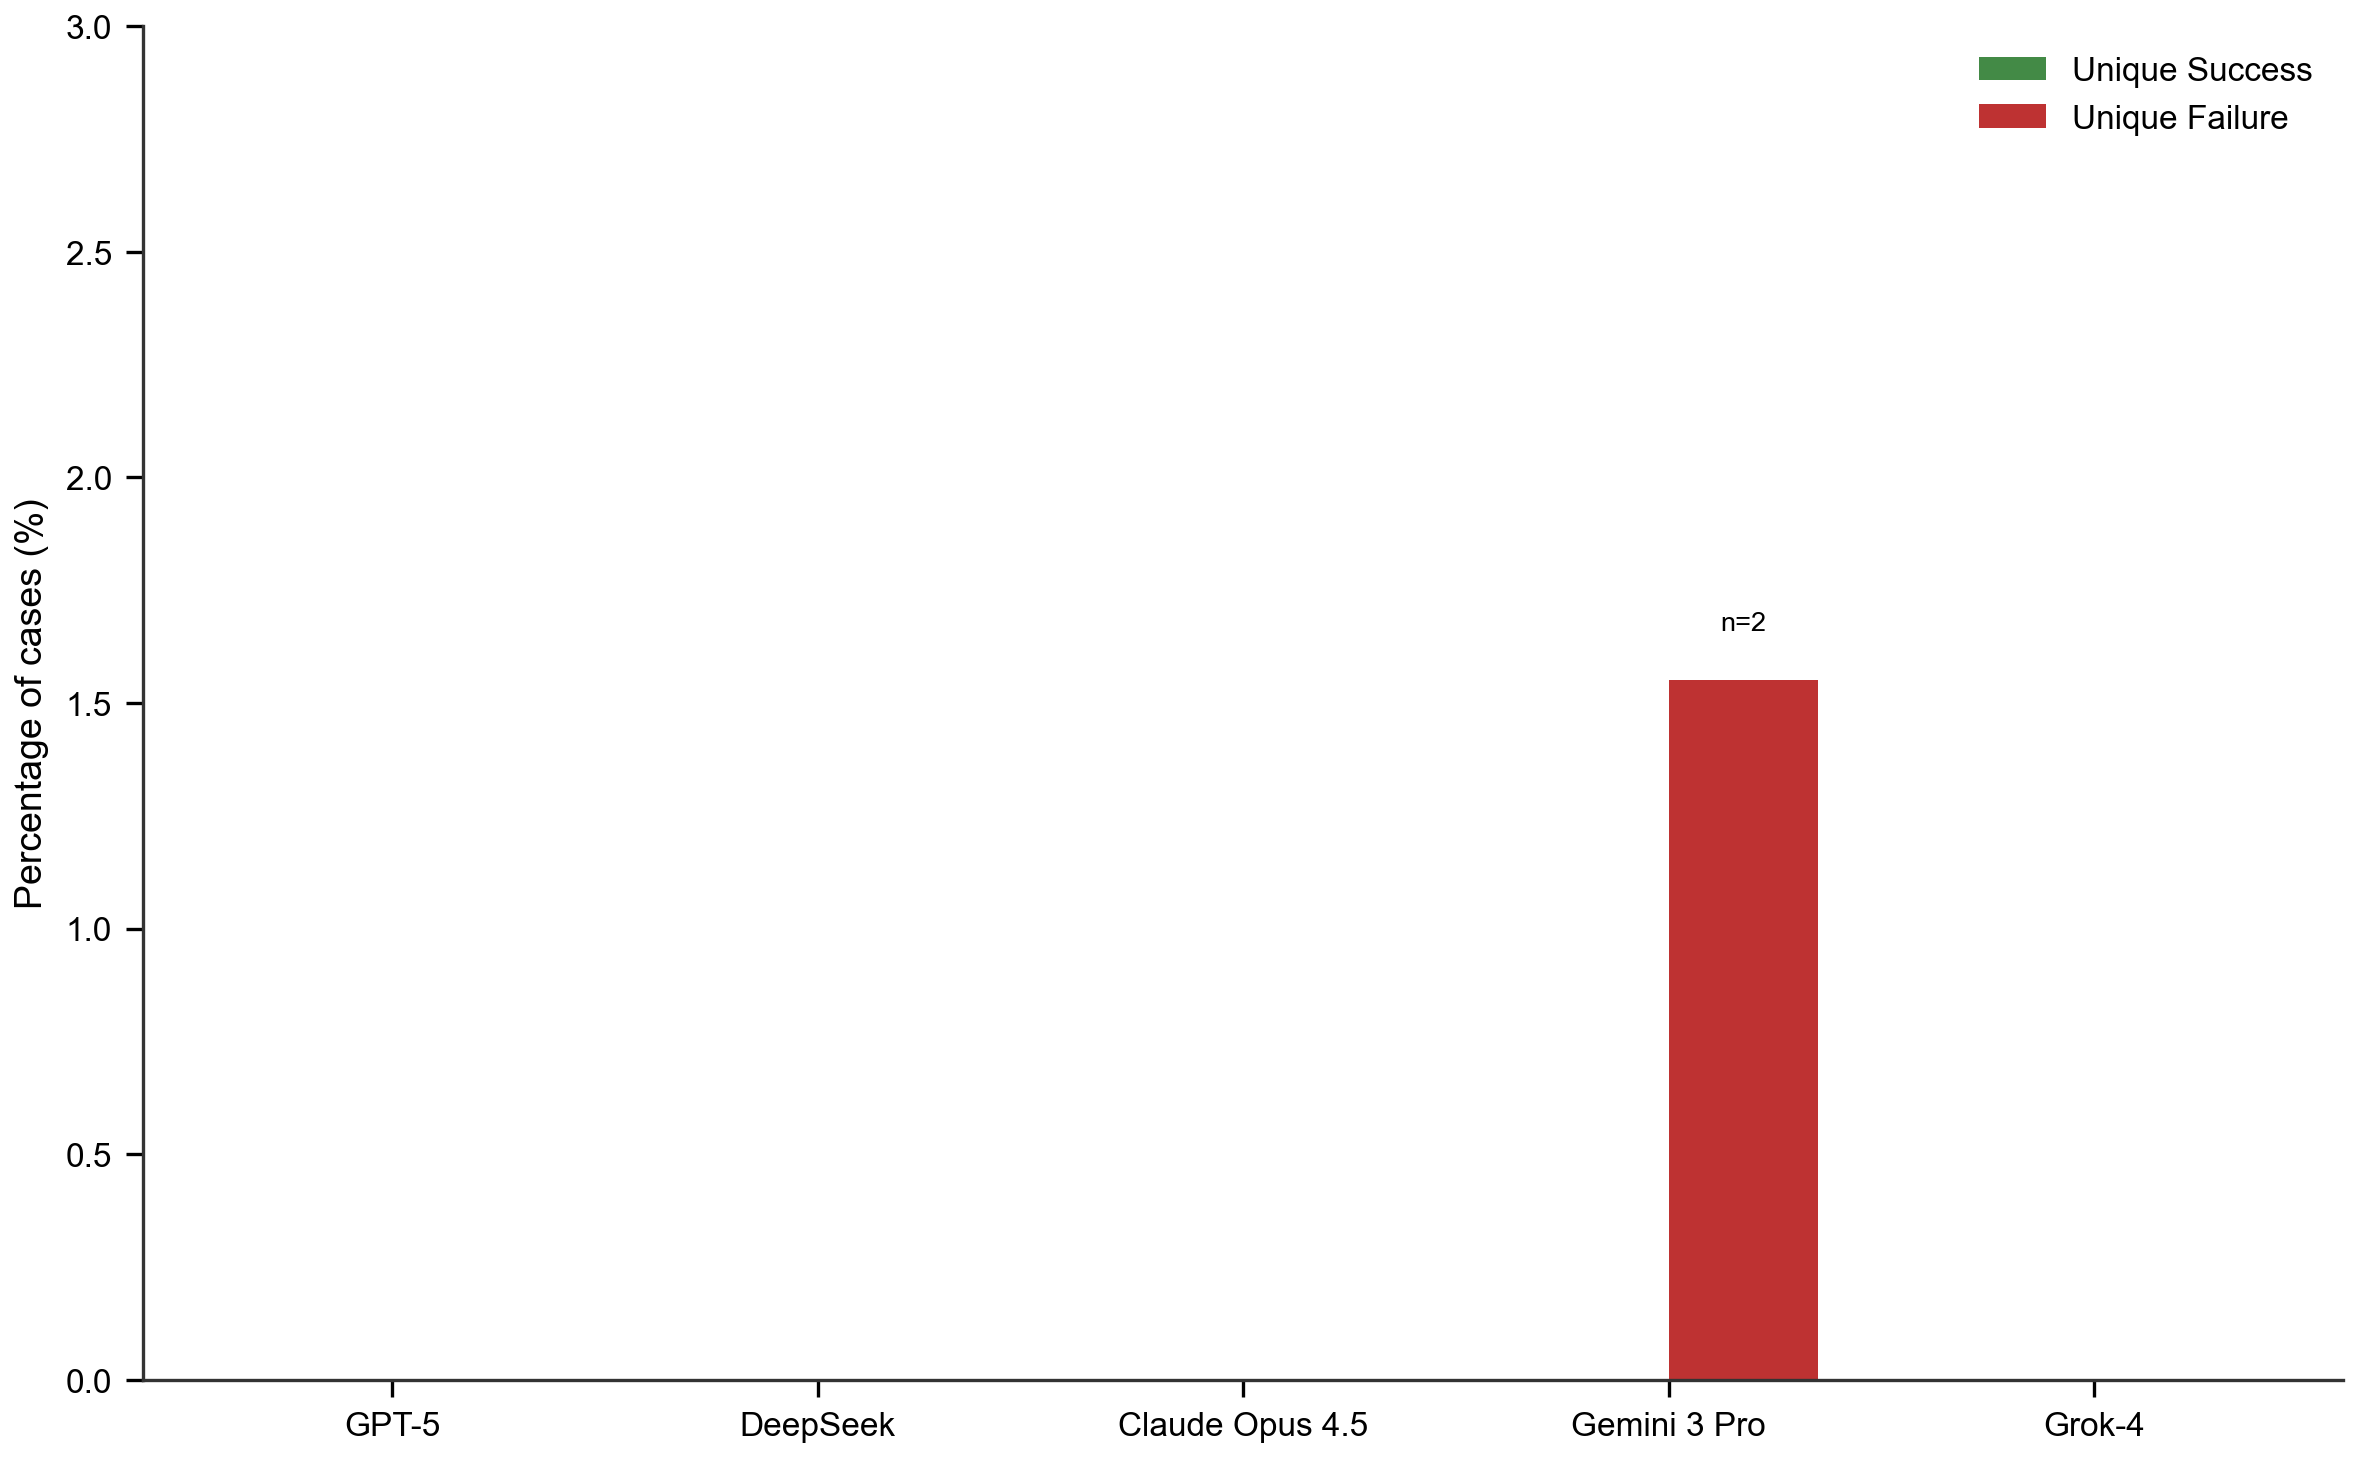

✓ Figure 7 saved to figures/

ANALYSIS COMPLETE!

All figures saved to: figures/

----------------------------------------------------------------------
FIGURES GENERATED:
----------------------------------------------------------------------
  Figure 1: Inter-rater Agreement (Cohen's κ Forest Plot)
  Figure 2: Cumulative Top-K Diagnostic Accuracy
  Figure 3: Top-1 Accuracy and Failure Rates by Clinical Domain
  Figure 4: Diagnostic Performance by Source Accessibility
  Figure 5: Distribution of Diagnostic Performance Tiers
  Figure 6: Model Consensus and Disagreement Analysis
  Figure 7: Unique Success and Unique Failure Rates

----------------------------------------------------------------------
TABLES GENERATED:
----------------------------------------------------------------------
  Table 1: Demographic Characteristics of Clinical Cases
  Table 2: Inter-rater Reliability Between Human Evaluators
  Table 3: Diagnostic Performance Metrics Across LLMs
  Table 4: Pairwise Model Compar

In [ ]:
# =============================================================================
# SLEEP MEDICINE LLM BENCHMARKING STUDY
# Complete Analysis Code - NPJ Digital Medicine Style
# =============================================================================
#
# This script generates all figures and tables for the manuscript:
# "Comparative evaluation of large language models for differential 
#  diagnosis in sleep medicine: a multi-model benchmarking study"
#
# TABLES:
#   Table 1: Demographic characteristics of clinical cases
#   Table 2: Inter-rater reliability between human evaluators
#   Table 3: Diagnostic performance metrics across LLMs (n = 129 cases)
#   Table 4: Pairwise model comparisons (Wilcoxon + Holm correction)
#   Table 5: Cumulative Top-K Diagnostic Accuracy by Model (%)
#   Table 6: Mean diagnostic scores stratified by case difficulty
#   Table 7: Mean diagnostic scores stratified by secondary clinical domain
#   Table 8: Pairwise inter-model agreement (Spearman correlation)
#   Table 9: Error type distribution by model
#
# FIGURES:
#   Figure 1: Inter-rater agreement (Cohen's kappa forest plot)
#   Figure 2: Cumulative Top-K Diagnostic Accuracy
#   Figure 3: Top-1 accuracy and failure rates by clinical domain
#   Figure 4: Diagnostic performance by source accessibility
#   Figure 5: Distribution of diagnostic performance tiers
#   Figure 6: Model consensus and disagreement
#   Figure 7: Unique success and unique failure rates by model
#
# Instructions:
#   1. Update file_path to point to your Excel file
#   2. Run cells sequentially in Jupyter notebook
#   3. Figures saved to 'figures/' directory in PNG, PDF, and TIFF formats
# =============================================================================

# %% [markdown]
# # Cell 1: Setup and Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import warnings
import os
import re

warnings.filterwarnings('ignore')

# =============================================================================
# NPJ DIGITAL MEDICINE STYLE CONFIGURATION
# Nature Portfolio journals use specific typography and styling guidelines
# =============================================================================
NPJ_STYLE = {
    # Figure dimensions (single column: 88mm, double: 180mm)
    'figure.figsize': (7.2, 5.0),
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    
    # Typography - Nature uses Helvetica/Arial
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 8,
    
    # Axes styling - clean, minimal
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.linewidth': 0.8,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 4,
    
    # Tick styling
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    
    # Legend styling
    'legend.fontsize': 7,
    'legend.frameon': False,
    'legend.borderpad': 0.4,
    
    # Grid - subtle
    'grid.alpha': 0.3,
    'grid.linewidth': 0.5,
    'grid.color': '#CCCCCC',
    
    # Output settings for publication
    'pdf.fonttype': 42,  # TrueType fonts
    'ps.fonttype': 42,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
}
mpl.rcParams.update(NPJ_STYLE)

# =============================================================================
# COLOR PALETTE - Colorblind-friendly (Nature recommended)
# Using Paul Tol's colorblind-safe palette
# =============================================================================
COLORS = {
    'GPT': '#332288',       # Indigo
    'Claude': '#88CCEE',    # Cyan
    'Deepseek': '#44AA99',  # Teal
    'Gemini': '#DDCC77',    # Sand
    'Grok': '#CC6677',      # Rose
}

# Alternative ordering for visualizations (by performance)
COLORS_ORDERED = ['#332288', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677']

# Display names for paper (formal model names)
DISPLAY_NAMES = {
    'GPT': 'GPT-5',
    'Deepseek': 'DeepSeek',
    'Claude': 'Claude Opus 4.5',
    'Gemini': 'Gemini 3 Pro',
    'Grok': 'Grok-4',
}

# Model column names (as they appear in Excel) - ordered by performance
MODELS = ['GPT', 'Deepseek', 'Claude', 'Gemini', 'Grok']
MODELS_DISPLAY = ['Grok', 'Claude', 'Deepseek', 'GPT', 'Gemini']  # For some figures

# =============================================================================
# LOAD DATA - UPDATE THIS PATH
# =============================================================================
file_path = r"E:\test\sleep\Final_results.xlsx"  # <-- UPDATE THIS PATH

# Try to load from user uploads if local path doesn't exist
try:
    human1 = pd.read_excel(file_path, sheet_name="human1")
except FileNotFoundError:
    file_path = "/mnt/user-data/uploads/Final_results.xlsx"
    human1 = pd.read_excel(file_path, sheet_name="human1")

human2 = pd.read_excel(file_path, sheet_name="human2")
info = pd.read_excel(file_path, sheet_name="Info")
human_avg = pd.read_excel(file_path, sheet_name="human_avg")

# Create output directory
os.makedirs('figures', exist_ok=True)

print("=" * 70)
print("SLEEP MEDICINE LLM BENCHMARKING STUDY")
print("NPJ Digital Medicine Analysis Pipeline")
print("=" * 70)
print(f"\nData loaded from: {file_path}")
print(f"  • Human Rater 1: {human1.shape[0]} cases, {human1.shape[1]} columns")
print(f"  • Human Rater 2: {human2.shape[0]} cases, {human2.shape[1]} columns")
print(f"  • Case Info:     {info.shape[0]} cases, {info.shape[1]} columns")
print(f"  • Averaged:      {human_avg.shape[0]} cases, {human_avg.shape[1]} columns")
print(f"\nModels evaluated: {', '.join(MODELS)}")
print("=" * 70)






# %% [markdown]
# # Cell 2: Utility Functions

# %%
def parse_age(age_value):
    """
    Convert age to years (float).
    Handles: integers, floats, and strings like '8 months', '7 months'
    
    Parameters:
    -----------
    age_value : int, float, or str
        Age value from data
        
    Returns:
    --------
    float : Age in years, or np.nan if unparseable
    """
    if pd.isna(age_value):
        return np.nan
    
    if isinstance(age_value, (int, float)):
        return float(age_value)
    
    if isinstance(age_value, str):
        age_str = age_value.lower().strip()
        if 'month' in age_str:
            match = re.search(r'(\d+\.?\d*)', age_str)
            if match:
                months = float(match.group(1))
                return months / 12.0  # Convert months to years
        else:
            try:
                return float(age_str)
            except ValueError:
                return np.nan
    
    return np.nan







def kappa_ci(s1, s2, n_boot=1000, random_state=42):
    """
    Calculate quadratic-weighted Cohen's Kappa with 95% bootstrap CI.
    
    Parameters:
    -----------
    s1, s2 : array-like
        Scores from two raters
    n_boot : int
        Number of bootstrap iterations
    random_state : int
        Random seed for reproducibility
        
    Returns:
    --------
    tuple : (kappa, ci_low, ci_high)
    """
    np.random.seed(random_state)
    s1, s2 = np.array(s1), np.array(s2)
    
    # Point estimate
    kappa = cohen_kappa_score(s1, s2, weights='quadratic')
    
    # Bootstrap confidence interval
    kappas = []
    n = len(s1)
    for _ in range(n_boot):
        idx = np.random.choice(n, n, replace=True)
        try:
            k = cohen_kappa_score(s1[idx], s2[idx], weights='quadratic')
            if not np.isnan(k):
                kappas.append(k)
        except:
            pass
    
    if len(kappas) > 0:
        ci_low = np.percentile(kappas, 2.5)
        ci_high = np.percentile(kappas, 97.5)
    else:
        ci_low, ci_high = np.nan, np.nan
    
    return kappa, ci_low, ci_high





def mean_ci(scores, n_boot=1000, random_state=42):
    """
    Calculate mean with 95% bootstrap CI.
    
    Parameters:
    -----------
    scores : array-like
        Score values
    n_boot : int
        Number of bootstrap iterations
    random_state : int
        Random seed for reproducibility
        
    Returns:
    --------
    tuple : (mean, ci_low, ci_high)
    """
    np.random.seed(random_state)
    scores = np.array(scores)
    scores = scores[~np.isnan(scores)]
    
    if len(scores) == 0:
        return np.nan, np.nan, np.nan
    
    mean = np.mean(scores)
    
    means = [np.mean(np.random.choice(scores, len(scores), replace=True)) 
             for _ in range(n_boot)]
    
    ci_low = np.percentile(means, 2.5)
    ci_high = np.percentile(means, 97.5)
    
    return mean, ci_low, ci_high








def classify_domain(specialty):
    """
    Map clinical specialty to standardized domain categories.
    
    Parameters:
    -----------
    specialty : str
        Clinical specialty string from data
        
    Returns:
    --------
    str : Standardized domain name
    """
    if pd.isna(specialty):
        return 'Other'
    
    specialty = str(specialty).lower()
    
    # Primary categorization
    if 'psychiatry' in specialty or 'psychology' in specialty:
        return 'Psychiatry'
    elif 'pulmonology' in specialty or 'pulmonolgy' in specialty:
        return 'Pulmonology'
    elif 'ent' in specialty or 'otolaryngology' in specialty or 'otorhinolaryngology' in specialty:
        return 'ENT'
    elif 'neurology' in specialty:
        return 'Neurology'
    else:
        return 'Other'






def save_figure(fig, filename, save_path='figures'):
    """
    Save figure in multiple formats for publication.
    
    Parameters:
    -----------
    fig : matplotlib.figure.Figure
        Figure to save
    filename : str
        Base filename (without extension)
    save_path : str
        Directory to save figures
    """
    for fmt in ['png', 'pdf', 'tiff']:
        fig.savefig(f'{save_path}/{filename}.{fmt}', 
                    dpi=600, bbox_inches='tight', facecolor='white',
                    transparent=False)


print("Utility functions defined successfully.")
print("  • parse_age(): Handle mixed age formats")
print("  • kappa_ci(): Cohen's kappa with bootstrap CI")
print("  • mean_ci(): Mean with bootstrap CI")
print("  • classify_domain(): Standardize clinical domains")
print("  • save_figure(): Multi-format figure export")








# %% [markdown]
# # Cell 3: Table 1 - Demographic Characteristics

# %%
def table1_demographics(info, human1):
    """
    Table 1: Demographic characteristics of clinical cases
    
    Generates summary statistics matching NPJ Digital Medicine Table 1 format.
    """
    print("\n" + "=" * 70)
    print("TABLE 1: DEMOGRAPHIC CHARACTERISTICS OF CLINICAL CASES")
    print("=" * 70)
    
    n = len(info)
    
    # Parse Age column - handle mixed types including "X months"
    age = human1['Age'].apply(parse_age)
    age_valid = age.dropna()
    
    # Calculate statistics
    age_mean = age_valid.mean()
    age_std = age_valid.std()
    age_median = age_valid.median()
    age_q25 = age_valid.quantile(0.25)
    age_q75 = age_valid.quantile(0.75)
    age_min = age_valid.min()
    age_max = age_valid.max()
    
    # Age groups
    ped = (age_valid < 18).sum()
    adult = ((age_valid >= 18) & (age_valid < 65)).sum()
    elderly = (age_valid >= 65).sum()
    n_valid = len(age_valid)
    
    # Gender - handle various formats
    gender = human1['Gender'].astype(str).str.strip().str.lower()
    male_mask = gender.str.contains('male', na=False) & ~gender.str.contains('female', na=False)
    female_mask = gender.str.contains('female', na=False) | gender.str.contains('femlae', na=False)
    
    male = male_mask.sum()
    female = female_mask.sum()
    unknown = n - male - female
    
    # Print formatted table
    print(f"\n{'Characteristic':<35} {'Value':>20}")
    print("-" * 57)
    print(f"{'Total cases, n':<35} {n:>20}")
    
    print(f"\n{'Age, years':<35}")
    print(f"  {'Mean ± SD':<33} {age_mean:.1f} ± {age_std:.1f}")
    print(f"  {'Median (IQR)':<33} {age_median:.1f} ({age_q25:.1f}–{age_q75:.1f})")
    print(f"  {'Range':<33} {age_min:.1f}–{age_max:.1f}")
    
    print(f"\n{'Age group, n (%)':<35}")
    print(f"  {'Pediatric (<18 years)':<33} {ped:>3} ({100*ped/n_valid:.1f}%)")
    print(f"  {'Adult (18–64 years)':<33} {adult:>3} ({100*adult/n_valid:.1f}%)")
    print(f"  {'Elderly (≥65 years)':<33} {elderly:>3} ({100*elderly/n_valid:.1f}%)")
    
    print(f"\n{'Gender, n (%)':<35}")
    print(f"  {'Male':<33} {male:>3} ({100*male/n:.1f}%)")
    print(f"  {'Female':<33} {female:>3} ({100*female/n:.1f}%)")
    if unknown > 0:
        print(f"  {'Unknown':<33} {unknown:>3} ({100*unknown/n:.1f}%)")
    
    print("=" * 70)
    
    # Return data for potential further use
    return {
        'n': n,
        'age_mean': age_mean, 'age_std': age_std,
        'age_median': age_median, 'age_iqr': (age_q25, age_q75),
        'age_range': (age_min, age_max),
        'pediatric': ped, 'adult': adult, 'elderly': elderly,
        'male': male, 'female': female, 'unknown': unknown
    }


demographics = table1_demographics(info, human1)









# %% [markdown]
# # Cell 4: Table 2 - Inter-rater Reliability

# %%
def table2_interrater(human1, human2):
    """
    Table 2: Inter-rater reliability between human evaluators
    
    κ = Cohen's kappa with quadratic weights
    Exact = percentage of identical ratings
    Within 1 = percentage of ratings differing by at most one point
    Interpretation follows Landis and Koch criteria
    """
    print("\n" + "=" * 70)
    print("TABLE 2: INTER-RATER RELIABILITY BETWEEN HUMAN EVALUATORS")
    print("=" * 70)
    
    # Header
    print(f"\n{'Model':<12} {'n':>5} {'κ (95% CI)':<24} {'Exact (%)':>10} "
          f"{'Within 1 (%)':>12} {'Interpretation':<15}")
    print("-" * 85)
    
    all_h1, all_h2 = [], []
    results = []
    
    for model in MODELS:
        s1 = human1[model].values
        s2 = human2[model].values
        
        # Remove NaN pairs
        valid = ~np.isnan(s1) & ~np.isnan(s2)
        s1_valid, s2_valid = s1[valid], s2[valid]
        n = len(s1_valid)
        
        # Calculate metrics
        kappa, ci_l, ci_h = kappa_ci(s1_valid, s2_valid)
        exact = (s1_valid == s2_valid).mean() * 100
        within1 = (np.abs(s1_valid - s2_valid) <= 1).mean() * 100
        
        # Landis & Koch interpretation
        if kappa >= 0.81:
            interp = 'Almost Perfect'
        elif kappa >= 0.61:
            interp = 'Substantial'
        elif kappa >= 0.41:
            interp = 'Moderate'
        elif kappa >= 0.21:
            interp = 'Fair'
        else:
            interp = 'Slight'
        
        print(f"{model:<12} {n:>5} {kappa:.3f} ({ci_l:.3f}–{ci_h:.3f}){' '*3} "
              f"{exact:>9.1f} {within1:>12.1f} {interp:<15}")
        
        results.append({
            'Model': model, 'n': n, 'kappa': kappa, 
            'ci_low': ci_l, 'ci_high': ci_h,
            'exact': exact, 'within1': within1, 'interp': interp
        })
        
        all_h1.extend(s1_valid)
        all_h2.extend(s2_valid)
    
    # Overall statistics
    kappa, ci_l, ci_h = kappa_ci(np.array(all_h1), np.array(all_h2))
    exact = (np.array(all_h1) == np.array(all_h2)).mean() * 100
    within1 = (np.abs(np.array(all_h1) - np.array(all_h2)) <= 1).mean() * 100
    
    if kappa >= 0.61:
        interp = 'Substantial'
    elif kappa >= 0.41:
        interp = 'Moderate'
    else:
        interp = 'Fair'
    
    print("-" * 85)
    print(f"{'Overall':<12} {len(all_h1):>5} {kappa:.3f} ({ci_l:.3f}–{ci_h:.3f}){' '*3} "
          f"{exact:>9.1f} {within1:>12.1f} {interp:<15}")
    
    print("-" * 85)
    print("\nκ, Cohen's kappa with quadratic weights; Exact, percentage of identical ratings;")
    print("Within 1, percentage of ratings differing by at most one point.")
    print("Interpretation follows Landis and Koch criteria.")
    print("=" * 70)
    
    return pd.DataFrame(results)


irr_results = table2_interrater(human1, human2)









# %% [markdown]
# # Cell 5: Figure 1 - Inter-rater Agreement Forest Plot

# %%
def figure1_kappa(human1, human2, save_path='figures'):
    """
    Figure 1: Quadratic-weighted Cohen's kappa values with 95% confidence 
    intervals for inter-rater agreement between two independent human 
    evaluators, stratified by model. All models achieved at least moderate agreement.
    """
    print("\nGenerating Figure 1: Inter-rater Agreement by LLM Model...")
    
    # Calculate kappa for each model
    data = []
    for model in MODELS:
        s1 = human1[model].dropna().values
        s2 = human2[model].dropna().values
        
        # Ensure same length
        min_len = min(len(s1), len(s2))
        s1, s2 = s1[:min_len], s2[:min_len]
        
        kappa, ci_l, ci_h = kappa_ci(s1, s2)
        data.append({
            'model': model, 
            'display': DISPLAY_NAMES[model],
            'kappa': kappa, 
            'ci_l': ci_l, 
            'ci_h': ci_h
        })
    
    df = pd.DataFrame(data).sort_values('kappa', ascending=True)
    
    # Create figure - NPJ style
    fig, ax = plt.subplots(figsize=(7.2, 4.0))
    y = np.arange(len(df))
    
    # Plot horizontal bars
    bars = ax.barh(y, df['kappa'], 
                   color=[COLORS[m] for m in df['model']], 
                   edgecolor='none', alpha=0.9, height=0.65)
    
    # Error bars (95% CI)
    ax.errorbar(df['kappa'], y, 
                xerr=[df['kappa']-df['ci_l'], df['ci_h']-df['kappa']],
                fmt='none', color='#333333', capsize=4, capthick=1.2, 
                linewidth=1.2, zorder=5)
    
    # Reference lines for interpretation thresholds
    ax.axvline(0.41, color='#888888', linestyle=':', linewidth=1, alpha=0.7)
    ax.axvline(0.61, color='#888888', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(0.81, color='#888888', linestyle='--', linewidth=1, alpha=0.7)
    
    # Labels
    ax.set_yticks(y)
    ax.set_yticklabels([DISPLAY_NAMES[m] for m in df['model']])
    ax.set_xlabel("Cohen's κ (quadratic weighted)")
    ax.set_xlim(0, 1.0)
    
    # Value annotations
    for i, (_, row) in enumerate(df.iterrows()):
        ax.text(row['ci_h'] + 0.03, i, f"{row['kappa']:.3f}", 
                va='center', ha='left', fontsize=7, fontweight='medium')
    
    # Interpretation zone labels
    ax.text(0.31, -0.9, 'Moderate', fontsize=6, style='italic', ha='center',
            transform=ax.get_xaxis_transform(), color='#666666')
    ax.text(0.71, -0.9, 'Substantial', fontsize=6, style='italic', ha='center',
            transform=ax.get_xaxis_transform(), color='#666666')
    ax.text(0.905, -0.9, 'Almost\nPerfect', fontsize=6, style='italic', ha='center',
            transform=ax.get_xaxis_transform(), color='#666666')
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save in multiple formats
    save_figure(fig, 'Figure1_interrater_kappa', save_path)
    
    plt.show()
    print(f"✓ Figure 1 saved to {save_path}/")
    
    return df


fig1_data = figure1_kappa(human1, human2)








# %% [markdown]
# # Cell 6: Table 3 - Diagnostic Performance Metrics

# %%
def table3_performance(human_avg):
    """
    Table 3: Diagnostic performance metrics across large language models (n = 129 cases)
    
    Mean (95% CI), SD, Top-1 (%), Failure (%), Mean Rank, Rank
    """
    print("\n" + "=" * 70)
    print("TABLE 3: DIAGNOSTIC PERFORMANCE METRICS (n = 129 cases)")
    print("=" * 70)
    
    results = []
    n_cases = len(human_avg)
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        mean, ci_l, ci_h = mean_ci(scores)
        std = scores.std()
        
        # Top-1: score = 5 (reference diagnosis ranked first)
        top1_pct = (scores == 5).mean() * 100
        
        # Failure: score = 0 (reference diagnosis absent)
        failure_pct = (scores == 0).mean() * 100
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'model_key': model,
            'mean': mean,
            'ci_l': ci_l,
            'ci_h': ci_h,
            'std': std,
            'top1': top1_pct,
            'failure': failure_pct,
        })
    
    df = pd.DataFrame(results)
    
    # Calculate Friedman mean ranks
    scores_matrix = np.array([human_avg[m].values for m in MODELS]).T
    # Handle NaN - use nanmean for ranking
    valid_mask = ~np.any(np.isnan(scores_matrix), axis=1)
    scores_valid = scores_matrix[valid_mask]
    
    # Higher score = better, so negate for ranking (rank 1 = best)
    ranks = stats.rankdata(-scores_valid, axis=1)
    mean_ranks = ranks.mean(axis=0)
    
    for i, model in enumerate(MODELS):
        df.loc[df['model_key'] == model, 'mean_rank'] = mean_ranks[i]
    
    # Sort by mean score (descending) and assign overall rank
    df = df.sort_values('mean', ascending=False).reset_index(drop=True)
    df['rank'] = range(1, len(df) + 1)
    
    # Print formatted table
    print(f"\n{'Model':<18} {'Mean (95% CI)':<22} {'SD':<8} {'Top-1 (%)†':>10} "
          f"{'Failure (%)‡':>12} {'Mean Rank':>10} {'Rank':>6}")
    print("-" * 95)
    
    for _, row in df.iterrows():
        print(f"{row['Model']:<18} {row['mean']:.2f} ({row['ci_l']:.2f}–{row['ci_h']:.2f}){' '*3} "
              f"{row['std']:.2f}{' '*3} {row['top1']:>9.1f} {row['failure']:>12.1f} "
              f"{row['mean_rank']:>10.2f} {int(row['rank']):>6}")
    
    print("-" * 95)
    print("†Percentage of cases with the reference diagnosis ranked first (score = 5).")
    print("‡Percentage of cases with the reference diagnosis absent from the differential (score = 0).")
    print("SD, standard deviation; CI, confidence interval.")
    print("Mean Rank denotes the average Friedman rank, with lower values indicating better performance.")
    print("=" * 70)
    
    return df


perf_results = table3_performance(human_avg)










# %% [markdown]
# # Cell 7: Table 4 - Pairwise Model Comparisons

# %%
def table4_pairwise(human_avg):
    """
    Table 4: Pairwise model comparisons using Wilcoxon signed-rank tests with Holm correction
    
    Effect size (r) denotes rank-biserial correlation.
    Negative values indicate better performance by the first model listed.
    """
    print("\n" + "=" * 70)
    print("TABLE 4: PAIRWISE MODEL COMPARISONS (Wilcoxon + Holm correction)")
    print("=" * 70)
    
    results = []
    
    for m1, m2 in combinations(MODELS, 2):
        s1 = human_avg[m1].values
        s2 = human_avg[m2].values
        
        # Remove NaN pairs
        valid = ~np.isnan(s1) & ~np.isnan(s2)
        s1_valid, s2_valid = s1[valid], s2[valid]
        n = len(s1_valid)
        
        # Wilcoxon signed-rank test
        stat, p = stats.wilcoxon(s1_valid, s2_valid)
        
        # Rank-biserial correlation (effect size)
        diff = s1_valid - s2_valid
        n_nonzero = (diff != 0).sum()
        if n_nonzero > 0:
            r = ((diff > 0).sum() - (diff < 0).sum()) / n_nonzero
        else:
            r = 0
        
        results.append({
            'Comparison': f'{m1} vs {m2}',
            'n': n,
            'p_raw': p,
            'r': r
        })
    
    df = pd.DataFrame(results)
    
    # Holm correction for multiple comparisons
    df = df.sort_values('p_raw').reset_index(drop=True)
    n_tests = len(df)
    df['p_holm'] = (df['p_raw'] * (n_tests - np.arange(n_tests))).clip(upper=1.0)
    df['Significant'] = df['p_holm'] < 0.05
    
    # Print formatted table
    print(f"\n{'Comparison':<22} {'n':>5} {'p_raw':>10} {'p_Holm':>10} "
          f"{'Significant':>12} {'Effect (r)':>12}")
    print("-" * 75)
    
    for _, row in df.iterrows():
        sig = 'Yes' if row['Significant'] else 'No'
        print(f"{row['Comparison']:<22} {row['n']:>5} {row['p_raw']:>10.3f} "
              f"{row['p_holm']:>10.3f} {sig:>12} {row['r']:>12.3f}")
    
    print("-" * 75)
    print("\nEffect size (r) denotes rank-biserial correlation.")
    print("Negative values indicate better performance by the first model listed.")
    print("=" * 70)
    
    return df


pairwise_results = table4_pairwise(human_avg)
















# %% [markdown]
# # Cell 8: Table 5 - Cumulative Top-K Diagnostic Accuracy

# %%
def table5_topk(human_avg):
    """
    Table 5: Cumulative Top-K Diagnostic Accuracy by Model (%)
    
    Top-K indicates cumulative accuracy at each rank threshold.
    Top-1 = score 5; Top-5 = score ≥ 1. n = 129 cases per model.
    """
    print("\n" + "=" * 70)
    print("TABLE 5: CUMULATIVE TOP-K DIAGNOSTIC ACCURACY BY MODEL (%)")
    print("=" * 70)
    
    results = []
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        # Calculate cumulative accuracy at each threshold
        top1 = (scores == 5).sum() / n * 100
        top2 = (scores >= 4).sum() / n * 100
        top3 = (scores >= 3).sum() / n * 100
        top4 = (scores >= 2).sum() / n * 100
        top5 = (scores >= 1).sum() / n * 100
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'Top-1': top1,
            'Top-2': top2,
            'Top-3': top3,
            'Top-4': top4,
            'Top-5': top5,
        })
    
    df = pd.DataFrame(results)
    
    # Sort by Top-1 accuracy
    df = df.sort_values('Top-1', ascending=False).reset_index(drop=True)
    
    # Print formatted table
    print(f"\n{'Model':<18} {'Top-1':>8} {'Top-2':>8} {'Top-3':>8} {'Top-4':>8} {'Top-5':>8}")
    print("-" * 60)
    
    for _, row in df.iterrows():
        print(f"{row['Model']:<18} {row['Top-1']:>8.1f} {row['Top-2']:>8.1f} "
              f"{row['Top-3']:>8.1f} {row['Top-4']:>8.1f} {row['Top-5']:>8.1f}")
    
    print("-" * 60)
    print("\nTop-K indicates cumulative accuracy at each rank threshold.")
    print("Top-1 = score 5; Top-5 = score ≥ 1. n = 129 cases per model.")
    print("=" * 70)
    
    return df


topk_results = table5_topk(human_avg)

# %% [markdown]
# # Cell 9: Figure 2 - Cumulative Top-K Diagnostic Accuracy

# %%
def figure2_topk(human_avg, save_path='figures'):
    """
    Figure 2: Cumulative Top-K Diagnostic Accuracy Across Models.
    
    All models achieved more than 89% accuracy at the Top-5 threshold, 
    indicating that the correct diagnosis appeared somewhere within the 
    differential for the majority of cases.
    """
    print("\nGenerating Figure 2: Cumulative Top-K Diagnostic Accuracy...")
    
    metrics = ['Top-1\n(=5)', 'Top-2\n(≥4)', 'Top-3\n(≥3)', 'Top-4\n(≥2)', 'Top-5\n(≥1)']
    
    # Calculate Top-K data for each model
    topk_data = {}
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        topk_data[model] = [
            (scores == 5).sum() / n * 100,
            (scores >= 4).sum() / n * 100,
            (scores >= 3).sum() / n * 100,
            (scores >= 2).sum() / n * 100,
            (scores >= 1).sum() / n * 100,
        ]
    
    # Create figure - NPJ style grouped bar chart
    fig, ax = plt.subplots(figsize=(9, 5.5))
    
    x = np.arange(len(metrics))
    n_models = len(MODELS)
    width = 0.14
    gap = 0.02
    
    # Calculate offsets for centered grouping
    offsets = np.linspace(-(n_models-1)/2, (n_models-1)/2, n_models) * (width + gap)
    
    for i, model in enumerate(MODELS):
        bars = ax.bar(x + offsets[i], topk_data[model], width=width,
                      color=COLORS[model], label=DISPLAY_NAMES[model], 
                      edgecolor='white', linewidth=0.5, alpha=0.95)
        
        # Value labels on top of bars
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h + 1.2,
                    f'{h:.1f}', ha='center', va='bottom', fontsize=5.5,
                    fontweight='medium')
    
    # Styling
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlabel('Top-K Diagnostic Threshold')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 108)
    
    # Subtle grid
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Legend - horizontal below plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
              ncol=5, fontsize=7, frameon=False, columnspacing=1.5)
    
    # Sample size annotation
    ax.text(0.02, 0.97, 'n = 129 cases per model',
            transform=ax.transAxes, fontsize=7, va='top', style='italic',
            color='#666666')
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure2_topk_accuracy', save_path)
    
    plt.show()
    print(f"✓ Figure 2 saved to {save_path}/")
    
    return topk_data


fig2_data = figure2_topk(human_avg)

# %% [markdown]
# # Cell 10: Table 6 - Mean Scores by Case Difficulty

# %%
def table6_difficulty(human_avg):
    """
    Table 6: Mean diagnostic scores stratified by case difficulty
    
    Difficulty categories defined based on aggregate model performance:
    - Easy: all models score ≥4
    - Moderate: mean score 2 to 4
    - Difficult: mean score 1 to 2
    - Very Difficult: mean score below 1
    """
    print("\n" + "=" * 70)
    print("TABLE 6: MEAN DIAGNOSTIC SCORES STRATIFIED BY CASE DIFFICULTY")
    print("=" * 70)
    
    # Calculate aggregate metrics for difficulty classification
    df = human_avg.copy()
    model_scores = df[MODELS]
    df['mean_all'] = model_scores.mean(axis=1)
    df['min_all'] = model_scores.min(axis=1)
    
    # Classify difficulty
    def classify_difficulty(row):
        if row['min_all'] >= 4:
            return 'Easy'
        elif row['mean_all'] >= 2:
            return 'Moderate'
        elif row['mean_all'] >= 1:
            return 'Difficult'
        else:
            return 'Very Difficult'
    
    df['difficulty'] = df.apply(classify_difficulty, axis=1)
    
    # Print formatted table
    print(f"\n{'Difficulty':<15} {'n (%)':>12}", end='')
    for model in MODELS:
        print(f" {model:>10}", end='')
    print("\n" + "-" * 80)
    
    n_total = len(df)
    difficulty_order = ['Easy', 'Moderate', 'Difficult', 'Very Difficult']
    
    results = []
    for diff in difficulty_order:
        subset = df[df['difficulty'] == diff]
        n = len(subset)
        if n == 0:
            continue
        
        pct = 100 * n / n_total
        row = {'Difficulty': diff, 'n': n, 'pct': pct}
        
        print(f"{diff:<15} {n:>4} ({pct:>5.1f}%)", end='')
        for model in MODELS:
            mean_score = subset[model].mean()
            row[model] = mean_score
            print(f" {mean_score:>10.2f}", end='')
        print()
        
        results.append(row)
    
    print("-" * 80)
    print("\nDifficulty categories were defined based on aggregate model performance:")
    print("Easy (all models score ≥4), Moderate (mean score 2 to 4),")
    print("Difficult (mean score 1 to 2), and Very Difficult (mean score below 1).")
    print("=" * 70)
    
    return pd.DataFrame(results)


difficulty_results = table6_difficulty(human_avg)

# %% [markdown]
# # Cell 11: Table 7 - Mean Scores by Clinical Domain

# %%
def table7_domain(human_avg, info):
    """
    Table 7: Mean diagnostic scores stratified by secondary clinical domain
    
    Sleep medicine was the primary domain for all cases. 
    Secondary domains reflect the predominant subspecialty involvement.
    """
    print("\n" + "=" * 70)
    print("TABLE 7: MEAN DIAGNOSTIC SCORES BY SECONDARY CLINICAL DOMAIN")
    print("=" * 70)
    
    # Merge and standardize domain info
    df = human_avg.copy()
    df['Domain'] = info['Clinical specialty'].apply(classify_domain)
    
    # Get domain counts and order by frequency
    domain_counts = df['Domain'].value_counts()
    
    # Print formatted table
    print(f"\n{'Domain':<15} {'n':>5}", end='')
    for model in MODELS:
        print(f" {model:>10}", end='')
    print("\n" + "-" * 75)
    
    results = []
    for domain in domain_counts.index:
        subset = df[df['Domain'] == domain]
        n = len(subset)
        
        row = {'Domain': domain, 'n': n}
        print(f"{domain:<15} {n:>5}", end='')
        
        for model in MODELS:
            mean_score = subset[model].mean()
            row[model] = mean_score
            print(f" {mean_score:>10.2f}", end='')
        print()
        
        results.append(row)
    
    print("-" * 75)
    print("\nSleep medicine was the primary domain for all cases.")
    print("Secondary domains reflect the predominant subspecialty involvement.")
    print("†Includes psychology and physiotherapy cases; the small sample size")
    print("precludes meaningful comparison.")
    print("=" * 70)
    
    return pd.DataFrame(results)


domain_results = table7_domain(human_avg, info)





# %% [markdown]
# # Cell 12: Figure 3 - Top-1 Accuracy and Failure Rates by Domain

# %%
def figure3_domain(human_avg, info, save_path='figures'):
    """
    Figure 3: Top-1 accuracy and failure rates by clinical domain.
    
    Psychiatry-related cases demonstrated consistently lower accuracy and 
    higher failure rates across all models, while pulmonology-related cases 
    showed the strongest and most consistent performance.
    """
    print("\nGenerating Figure 3: Performance by Clinical Domain...")
    
    # Merge and standardize domain info
    df = human_avg.copy()
    df['Domain'] = info['Clinical specialty'].apply(classify_domain)
    
    # Get main domains (exclude those with very few cases)
    domain_counts = df['Domain'].value_counts()
    main_domains = domain_counts[domain_counts >= 5].index.tolist()
    
    # Reorder: Pulmonology, Neurology, Psychiatry, ENT (by typical performance)
    domain_order = ['Neurology', 'Pulmonology', 'Psychiatry', 'ENT']
    main_domains = [d for d in domain_order if d in main_domains]
    
    if len(main_domains) < 2:
        print("Warning: Not enough domains with sufficient cases. Skipping Figure 3.")
        return None
    
    # Calculate metrics for each domain
    top1_data = {m: [] for m in MODELS}
    fail_data = {m: [] for m in MODELS}
    domain_n = []
    
    for domain in main_domains:
        subset = df[df['Domain'] == domain]
        domain_n.append(len(subset))
        for model in MODELS:
            scores = subset[model]
            top1_data[model].append((scores == 5).mean() * 100)
            fail_data[model].append((scores == 0).mean() * 100)
    
    # Create figure - two panels
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
    
    y = np.arange(len(main_domains))
    n_models = len(MODELS)
    height = 0.15
    
    # Panel a: Top-1 accuracy rate
    offsets = np.linspace(-(n_models-1)/2, (n_models-1)/2, n_models) * height
    
    for i, model in enumerate(MODELS):
        ax1.barh(y + offsets[i], top1_data[model], height=height,
                 color=COLORS[model], label=DISPLAY_NAMES[model], 
                 edgecolor='none', alpha=0.9)
    
    ax1.set_yticks(y)
    ax1.set_yticklabels([f'{d}\n(n={n})' for d, n in zip(main_domains, domain_n)], fontsize=7)
    ax1.set_xlabel('Top-1 accuracy (%)')
    ax1.set_xlim(0, 100)
    ax1.set_title('a', fontsize=11, fontweight='bold', loc='left', x=-0.15)
    ax1.legend(loc='lower right', fontsize=6, frameon=False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Panel b: Failure rate
    for i, model in enumerate(MODELS):
        ax2.barh(y + offsets[i], fail_data[model], height=height,
                 color=COLORS[model], edgecolor='none', alpha=0.9)
    
    ax2.set_yticks(y)
    ax2.set_yticklabels([f'{d}\n(n={n})' for d, n in zip(main_domains, domain_n)], fontsize=7)
    ax2.set_xlabel('Failure rate (%)')
    ax2.set_xlim(0, max(max(fail_data[m]) for m in MODELS) * 1.3 + 5)
    ax2.set_title('b', fontsize=11, fontweight='bold', loc='left', x=-0.15)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure3_domain_performance', save_path)
    
    plt.show()
    print(f"✓ Figure 3 saved to {save_path}/")
    
    return {'domains': main_domains, 'top1': top1_data, 'fail': fail_data}


fig3_data = figure3_domain(human_avg, info)







# %% [markdown]
# # Cell 13: Figure 4 - Performance by Source Accessibility

# %%
def figure4_source(human_avg, info, save_path='figures'):
    """
    Figure 4: Diagnostic performance by source accessibility.
    
    Publicly accessible sources yielded higher accuracy and lower failure rates, 
    likely reflecting differences in case complexity and presentation completeness.
    """
    print("\nGenerating Figure 4: Performance by Source Accessibility...")
    
    # Merge accessibility info
    df = human_avg.copy()
    df['Access'] = info['Publically avalibale'].values
    
    # Get unique access types (Yes/No)
    access_types = ['Yes', 'No']
    access_labels = ['Publicly\nAccessible', 'Paywalled']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 5))
    
    x = np.arange(len(access_types))
    markers = ['o', 's', '^', 'D', 'v']
    
    for i, model in enumerate(MODELS):
        means = []
        errors_low = []
        errors_high = []
        
        for acc in access_types:
            subset = df[df['Access'] == acc][model].dropna()
            mean, ci_l, ci_h = mean_ci(subset.values, n_boot=500)
            means.append(mean)
            errors_low.append(mean - ci_l)
            errors_high.append(ci_h - mean)
        
        # Offset for visibility
        offset = (i - len(MODELS)/2 + 0.5) * 0.08
        
        ax.errorbar(x + offset, means, 
                    yerr=[errors_low, errors_high],
                    fmt=markers[i], color=COLORS[model], 
                    label=DISPLAY_NAMES[model],
                    markersize=10, capsize=4, capthick=1.2, 
                    linewidth=1.5, markeredgecolor='white',
                    markeredgewidth=1)
    
    # Add sample sizes to x-labels
    labels = []
    for acc, lab in zip(access_types, access_labels):
        n = (df['Access'] == acc).sum()
        labels.append(f'{lab}\n(n = {n})')
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_ylabel('Mean diagnostic score (95% CI)')
    ax.set_ylim(3.0, 5.5)
    
    # Legend
    ax.legend(loc='lower left', fontsize=7, frameon=False, 
              ncol=1, bbox_to_anchor=(0.02, 0.02))
    
    # Grid
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure4_source_accessibility', save_path)
    
    plt.show()
    print(f"✓ Figure 4 saved to {save_path}/")


figure4_source(human_avg, info)








# %% [markdown]
# # Cell 14: Table 8 - Inter-model Agreement

# %%
def table8_intermodel(human_avg):
    """
    Table 8: Pairwise inter-model agreement (Spearman correlation)
    """
    print("\n" + "=" * 70)
    print("TABLE 8: PAIRWISE INTER-MODEL AGREEMENT (Spearman correlation)")
    print("=" * 70)
    
    results = []
    
    for m1, m2 in combinations(MODELS, 2):
        # Ensure same cases (no NaN in either)
        valid = human_avg[m1].notna() & human_avg[m2].notna()
        s1, s2 = human_avg.loc[valid, m1], human_avg.loc[valid, m2]
        n = len(s1)
        
        rho, p = stats.spearmanr(s1, s2)
        results.append({
            'Model Pair': f'{DISPLAY_NAMES[m1]} vs {DISPLAY_NAMES[m2]}',
            'pair_key': f'{m1} vs {m2}',
            'n': n, 
            'rho': rho, 
            'p': p
        })
    
    df = pd.DataFrame(results).sort_values('rho', ascending=False)
    
    # Print formatted table
    print(f"\n{'Model Pair':<35} {'n':>5} {'Spearman ρ':>12} {'p-value':>12}")
    print("-" * 68)
    
    for _, row in df.iterrows():
        p_str = '< 0.001' if row['p'] < 0.001 else f"{row['p']:.3f}"
        print(f"{row['Model Pair']:<35} {row['n']:>5} {row['rho']:>12.2f} {p_str:>12}")
    
    print("=" * 70)
    
    return df


intermodel_results = table8_intermodel(human_avg)





# %% [markdown]
# # Cell 15: Table 9 - Error Type Distribution

# %%
def table9_errors(human_avg):
    """
    Table 9: Error type distribution by model
    
    Performance tiers defined by ordinal diagnostic scores:
    - Excellent (Top-1): score = 5
    - Good: score = 4
    - Average: score = 3
    - Below Average: score = 2
    - Poor: score = 1
    - Failure: score = 0
    """
    print("\n" + "=" * 70)
    print("TABLE 9: ERROR TYPE DISTRIBUTION BY MODEL")
    print("=" * 70)
    
    n_total = len(human_avg)
    
    # Header
    print(f"\n{'Model':<18} {'Excellent':>12} {'Good':>12} {'Average':>12} "
          f"{'Below Avg':>12} {'Poor':>12} {'Failure':>12}")
    print(f"{'':<18} {'(Top-1)':>12} {'(Score 4)':>12} {'(Score 3)':>12} "
          f"{'(Score 2)':>12} {'(Score 1)':>12} {'(Score 0)':>12}")
    print("-" * 100)
    
    results = []
    
    for model in MODELS:
        scores = human_avg[model]
        
        # For averaged scores, use ranges to handle non-integer values
        excellent = ((scores >= 4.5) & (scores <= 5)).sum()
        good = ((scores >= 3.5) & (scores < 4.5)).sum()
        average = ((scores >= 2.5) & (scores < 3.5)).sum()
        below_avg = ((scores >= 1.5) & (scores < 2.5)).sum()
        poor = ((scores >= 0.5) & (scores < 1.5)).sum()
        failure = (scores < 0.5).sum()
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'Excellent': excellent,
            'Good': good,
            'Average': average,
            'Below Avg': below_avg,
            'Poor': poor,
            'Failure': failure
        })
        
        print(f"{DISPLAY_NAMES[model]:<18} "
              f"{excellent:>4} ({100*excellent/n_total:>5.1f}%) "
              f"{good:>4} ({100*good/n_total:>5.1f}%) "
              f"{average:>4} ({100*average/n_total:>5.1f}%) "
              f"{below_avg:>4} ({100*below_avg/n_total:>5.1f}%) "
              f"{poor:>4} ({100*poor/n_total:>5.1f}%) "
              f"{failure:>4} ({100*failure/n_total:>5.1f}%)")
    
    print("-" * 100)
    print("\nPerformance tiers are defined by ordinal diagnostic scores:")
    print("Excellent (score = 5, Top-1), Good (score = 4), Average (score = 3),")
    print("Below Average (score = 2), Poor (score = 1), and Failure (score = 0).")
    print("Percentages may not sum to 100% due to averaging of dual-human scores.")
    print("=" * 70)
    
    return pd.DataFrame(results)


error_results = table9_errors(human_avg)







# %% [markdown]
# # Cell 16: Figure 5 - Distribution of Diagnostic Performance Tiers

# %%
def figure5_distribution(human_avg, save_path='figures'):
    """
    Figure 5: Distribution of diagnostic performance tiers across models.
    
    Stacked bar chart showing the proportion of cases assigned to each 
    ordinal score category. GPT-5 and DeepSeek demonstrate more favorable 
    distributions with fewer low-tier outcomes.
    """
    print("\nGenerating Figure 5: Performance Tier Distribution...")
    
    n_total = len(human_avg)
    
    categories = ['Excellent\n(Top-1)', 'Good', 'Average', 'Below\nAvg', 'Poor', 'Failure']
    
    # Color scheme: green (good) to red (bad)
    tier_colors = ['#2E7D32', '#66BB6A', '#FFC107', '#FF9800', '#EF5350', '#B71C1C']
    
    data = {}
    for model in MODELS:
        scores = human_avg[model]
        data[model] = [
            ((scores >= 4.5) & (scores <= 5)).sum() / n_total * 100,
            ((scores >= 3.5) & (scores < 4.5)).sum() / n_total * 100,
            ((scores >= 2.5) & (scores < 3.5)).sum() / n_total * 100,
            ((scores >= 1.5) & (scores < 2.5)).sum() / n_total * 100,
            ((scores >= 0.5) & (scores < 1.5)).sum() / n_total * 100,
            (scores < 0.5).sum() / n_total * 100,
        ]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 5.5))
    x = np.arange(len(MODELS))
    width = 0.65
    
    # Stacked bars
    bottom = np.zeros(len(MODELS))
    bars_list = []
    for i, cat in enumerate(categories):
        values = [data[m][i] for m in MODELS]
        bars = ax.bar(x, values, width, bottom=bottom, label=cat,
                      color=tier_colors[i], edgecolor='white', linewidth=0.8)
        bars_list.append(bars)
        bottom += values
    
    ax.set_ylabel('Percentage of cases (%)')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=8)
    ax.set_ylim(0, 105)
    
    # Legend - horizontal below
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              ncol=6, fontsize=6.5, frameon=False, columnspacing=1)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure5_performance_distribution', save_path)
    
    plt.show()
    print(f"✓ Figure 5 saved to {save_path}/")
    
    return data


fig5_data = figure5_distribution(human_avg)

# %% [markdown]
# # Cell 17: Figure 6 - Model Consensus and Disagreement

# %%
def figure6_consensus(human_avg, save_path='figures'):
    """
    Figure 6: Model consensus and disagreement in diagnostic performance.
    
    Bars indicate the proportion of cases in which all models achieved 
    Top-1 performance, all achieved at least a Good score (score ≥4), 
    all achieved at least an Acceptable score (score ≥3), or all failed.
    """
    print("\nGenerating Figure 6: Model Consensus Analysis...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    # Calculate consensus metrics
    all_top1 = (model_scores.min(axis=1) == 5).sum()
    all_good = (model_scores.min(axis=1) >= 4).sum()
    all_acceptable = (model_scores.min(axis=1) >= 3).sum()
    all_failed = (model_scores.max(axis=1) == 0).sum()
    any_failed = (model_scores.min(axis=1) == 0).sum()
    high_disagree = ((model_scores.max(axis=1) - model_scores.min(axis=1)) >= 3).sum()
    
    categories = ['All Top-1', 'All Good\n(≥4)', 'All Acceptable\n(≥3)',
                  'All Failed', 'Any Failed', 'High\nDisagreement']
    values = [all_top1, all_good, all_acceptable, all_failed, any_failed, high_disagree]
    percentages = [v / n_cases * 100 for v in values]
    
    # Colors: green for consensus, red for failures, orange for disagreement
    colors = ['#2E7D32', '#4CAF50', '#8BC34A', '#B71C1C', '#EF5350', '#FF9800']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(9, 5))
    x = np.arange(len(categories))
    bars = ax.bar(x, percentages, color=colors, edgecolor='none', alpha=0.9, width=0.7)
    
    # Add value labels (n=X) above bars
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
                f'n = {val}', ha='center', va='bottom', fontsize=7, fontweight='medium')
    
    ax.set_ylabel('Percentage of cases (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_ylim(0, max(percentages) * 1.18)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure6_consensus', save_path)
    
    plt.show()
    print(f"✓ Figure 6 saved to {save_path}/")
    
    return dict(zip(categories, values))


fig6_data = figure6_consensus(human_avg)

# %% [markdown]
# # Cell 18: Figure 7 - Unique Success and Failure Rates

# %%
def figure7_unique(human_avg, save_path='figures'):
    """
    Figure 7: Unique success and unique failure rates by model.
    
    Unique success denotes cases in which a single model achieved a successful 
    diagnosis while all others failed. Unique failure denotes cases in which 
    a single model failed while all others succeeded. Both outcomes were rare, 
    with GPT-5 exhibiting no unique failures.
    """
    print("\nGenerating Figure 7: Unique Performance Patterns...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    unique_success = {}
    unique_failure = {}
    
    for model in MODELS:
        others = [m for m in MODELS if m != model]
        
        # Unique success: this model succeeded (=5), all others failed (=0)
        this_success = model_scores[model] == 5
        others_failed = (model_scores[others] == 0).all(axis=1)
        unique_success[model] = (this_success & others_failed).sum()
        
        # Unique failure: this model failed (=0), all others succeeded (=5)
        this_failed = model_scores[model] == 0
        others_success = (model_scores[others] == 5).all(axis=1)
        unique_failure[model] = (this_failed & others_success).sum()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 5))
    x = np.arange(len(MODELS))
    width = 0.35
    
    # Success bars (green)
    success_vals = [unique_success[m] / n_cases * 100 for m in MODELS]
    bars1 = ax.bar(x - width/2, success_vals, width, 
                   label='Unique Success', color='#2E7D32', edgecolor='none', alpha=0.9)
    
    # Failure bars (red)
    failure_vals = [unique_failure[m] / n_cases * 100 for m in MODELS]
    bars2 = ax.bar(x + width/2, failure_vals, width,
                   label='Unique Failure', color='#B71C1C', edgecolor='none', alpha=0.9)
    
    # Add value labels
    for bar, val in zip(bars1, [unique_success[m] for m in MODELS]):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'n={val}', ha='center', va='bottom', fontsize=6.5)
    
    for bar, val in zip(bars2, [unique_failure[m] for m in MODELS]):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'n={val}', ha='center', va='bottom', fontsize=6.5)
    
    ax.set_ylabel('Percentage of cases (%)')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=8)
    ax.legend(fontsize=8, frameon=False, loc='upper right')
    
    # Set y-axis limit based on data
    max_val = max(max(success_vals), max(failure_vals))
    ax.set_ylim(0, max(3, max_val * 1.5))
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save
    save_figure(fig, 'Figure7_unique_performance', save_path)
    
    plt.show()
    print(f"✓ Figure 7 saved to {save_path}/")
    
    return {'success': unique_success, 'failure': unique_failure}


fig7_data = figure7_unique(human_avg)

# %% [markdown]
# # Cell 19: Summary and Export

# %%
print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)

print(f"\nAll figures saved to: figures/")
print("\n" + "-" * 70)
print("FIGURES GENERATED:")
print("-" * 70)
print("  Figure 1: Inter-rater Agreement (Cohen's κ Forest Plot)")
print("  Figure 2: Cumulative Top-K Diagnostic Accuracy")
print("  Figure 3: Top-1 Accuracy and Failure Rates by Clinical Domain")
print("  Figure 4: Diagnostic Performance by Source Accessibility")
print("  Figure 5: Distribution of Diagnostic Performance Tiers")
print("  Figure 6: Model Consensus and Disagreement Analysis")
print("  Figure 7: Unique Success and Unique Failure Rates")

print("\n" + "-" * 70)
print("TABLES GENERATED:")
print("-" * 70)
print("  Table 1: Demographic Characteristics of Clinical Cases")
print("  Table 2: Inter-rater Reliability Between Human Evaluators")
print("  Table 3: Diagnostic Performance Metrics Across LLMs")
print("  Table 4: Pairwise Model Comparisons (Wilcoxon + Holm)")
print("  Table 5: Cumulative Top-K Diagnostic Accuracy by Model")
print("  Table 6: Mean Diagnostic Scores Stratified by Case Difficulty")
print("  Table 7: Mean Diagnostic Scores by Secondary Clinical Domain")
print("  Table 8: Pairwise Inter-model Agreement (Spearman ρ)")
print("  Table 9: Error Type Distribution by Model")

print("\n" + "-" * 70)
print("OUTPUT FORMATS:")
print("-" * 70)
print("  • PNG (300 DPI) - for manuscript drafts")
print("  • PDF (vector)  - for publication submission")
print("  • TIFF (600 DPI) - for print production")

print("\n" + "=" * 70)
print("NPJ Digital Medicine Style Compliance:")
print("  ✓ Helvetica/Arial typography")
print("  ✓ Colorblind-friendly palette")
print("  ✓ Clean minimal axes (no top/right spines)")
print("  ✓ TrueType fonts embedded")
print("  ✓ 600 DPI output resolution")
print("=" * 70)

NPJ Digital Medicine - Supplementary Figure Generation

Attempting to load data from: E:\test\sleep\Final_results.xlsx
  ✓ Data loaded successfully from Excel file
  Cases: 129
  Models: ['Grok', 'Claude', 'Deepseek', 'GPT', 'Gemini']
  Publishers: 7 unique sources

Generating figures...
----------------------------------------
✓ Figure S1 (head-to-head) saved
✓ Figure S2 (case trends) saved
✓ Figure S3 (publisher means) saved
----------------------------------------

All figures saved to: d:\Sleep_medicine\figs
  Output formats:
    - PNG (600 DPI) for review/presentation
    - PDF (vector) for journal submission
    - TIFF (600 DPI) for production

HEAD-TO-HEAD WIN MATRIX
          Grok  Claude  Deepseek  GPT  Gemini
Grok         0      21        13   13      25
Claude      27       0        19   16      22
Deepseek    26      21         0   15      28
GPT         28      29        19    0      30
Gemini      34      24        20   24       0



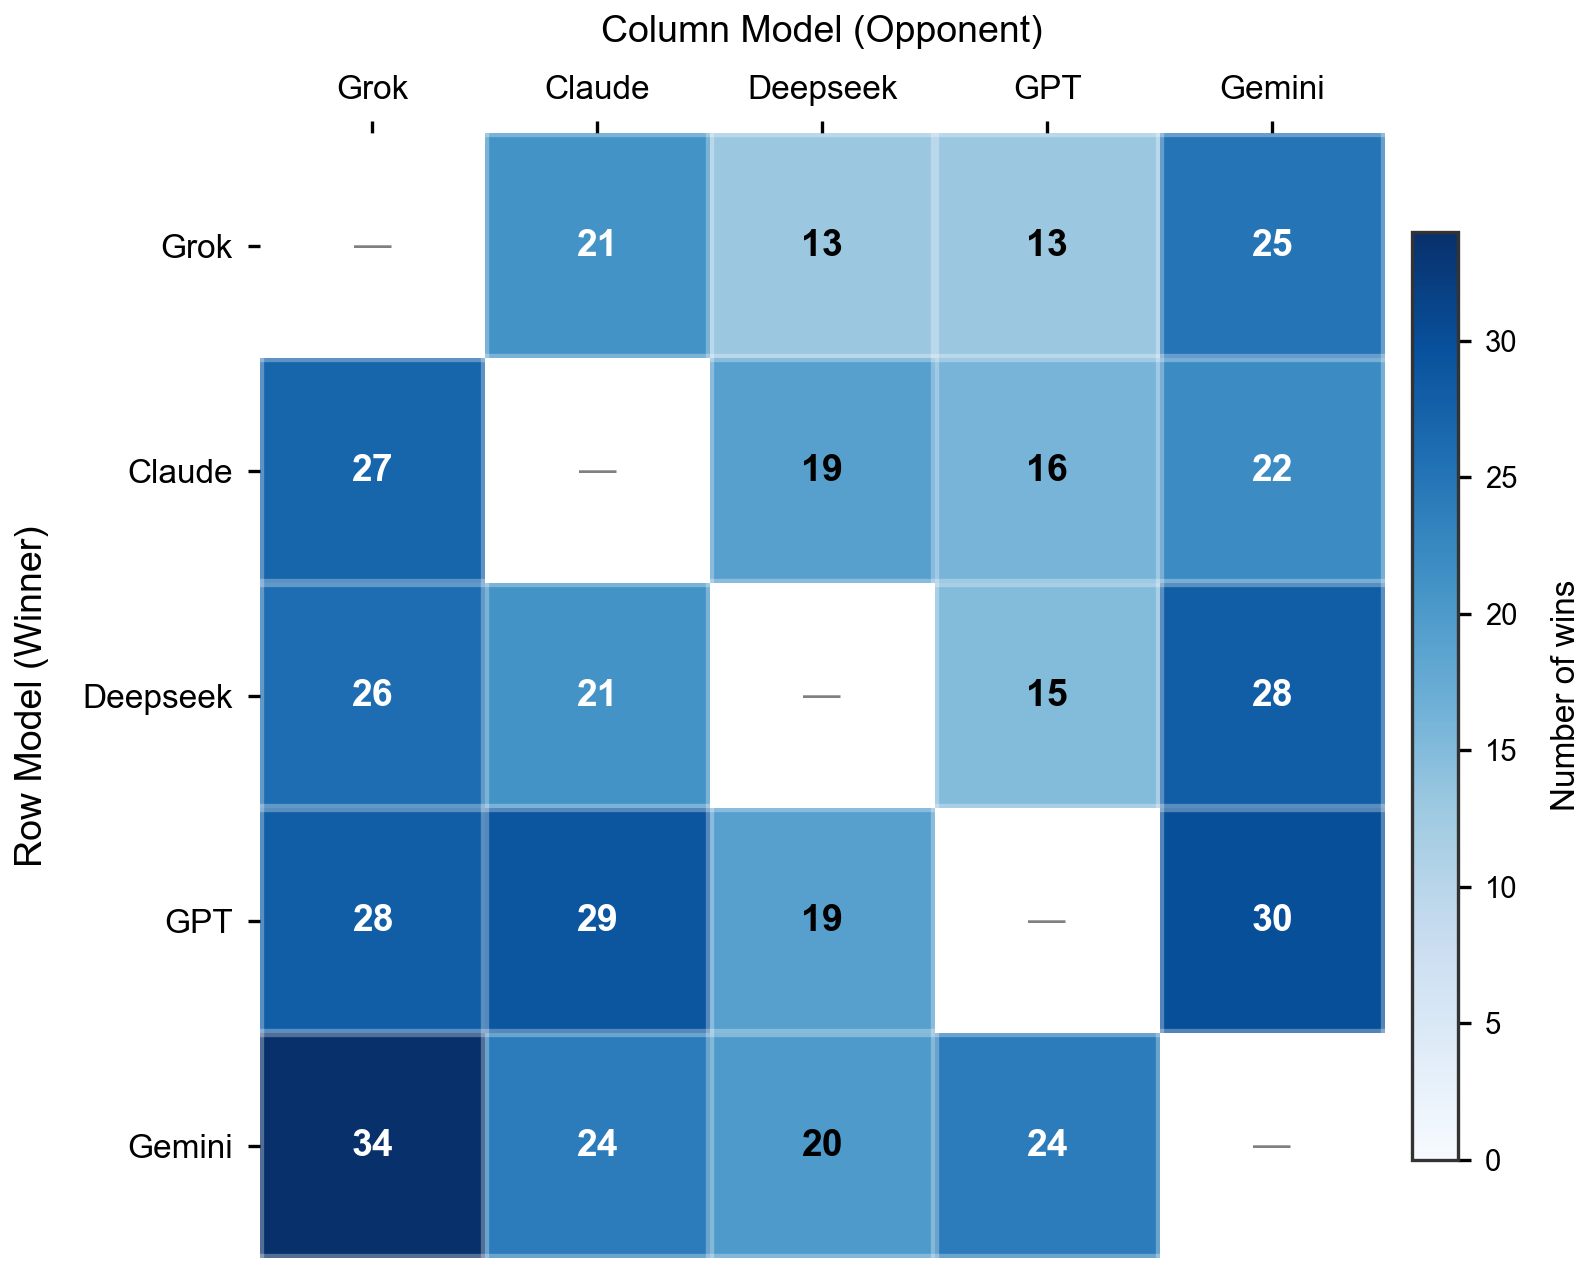

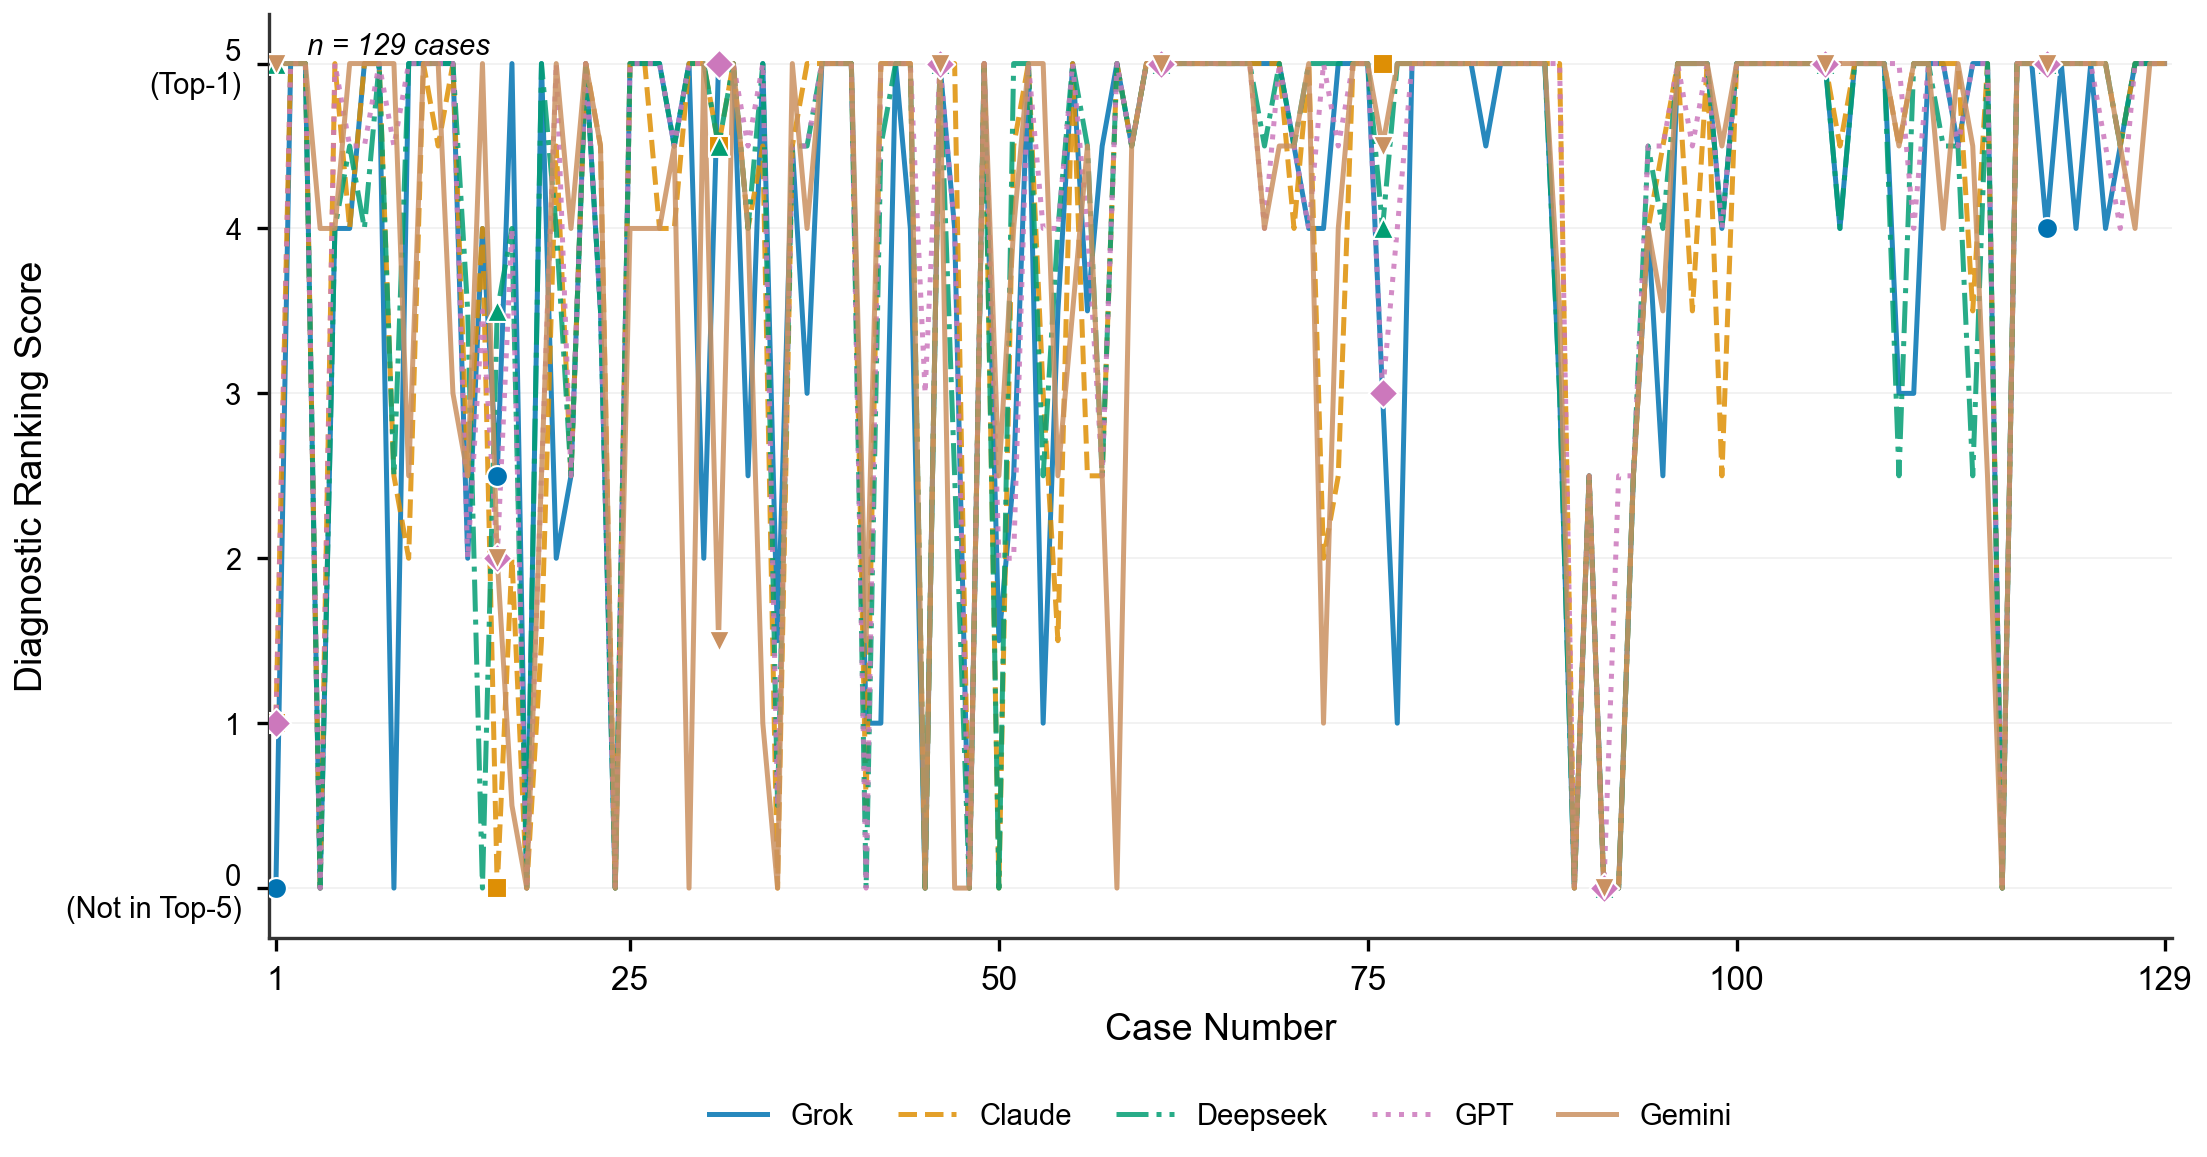

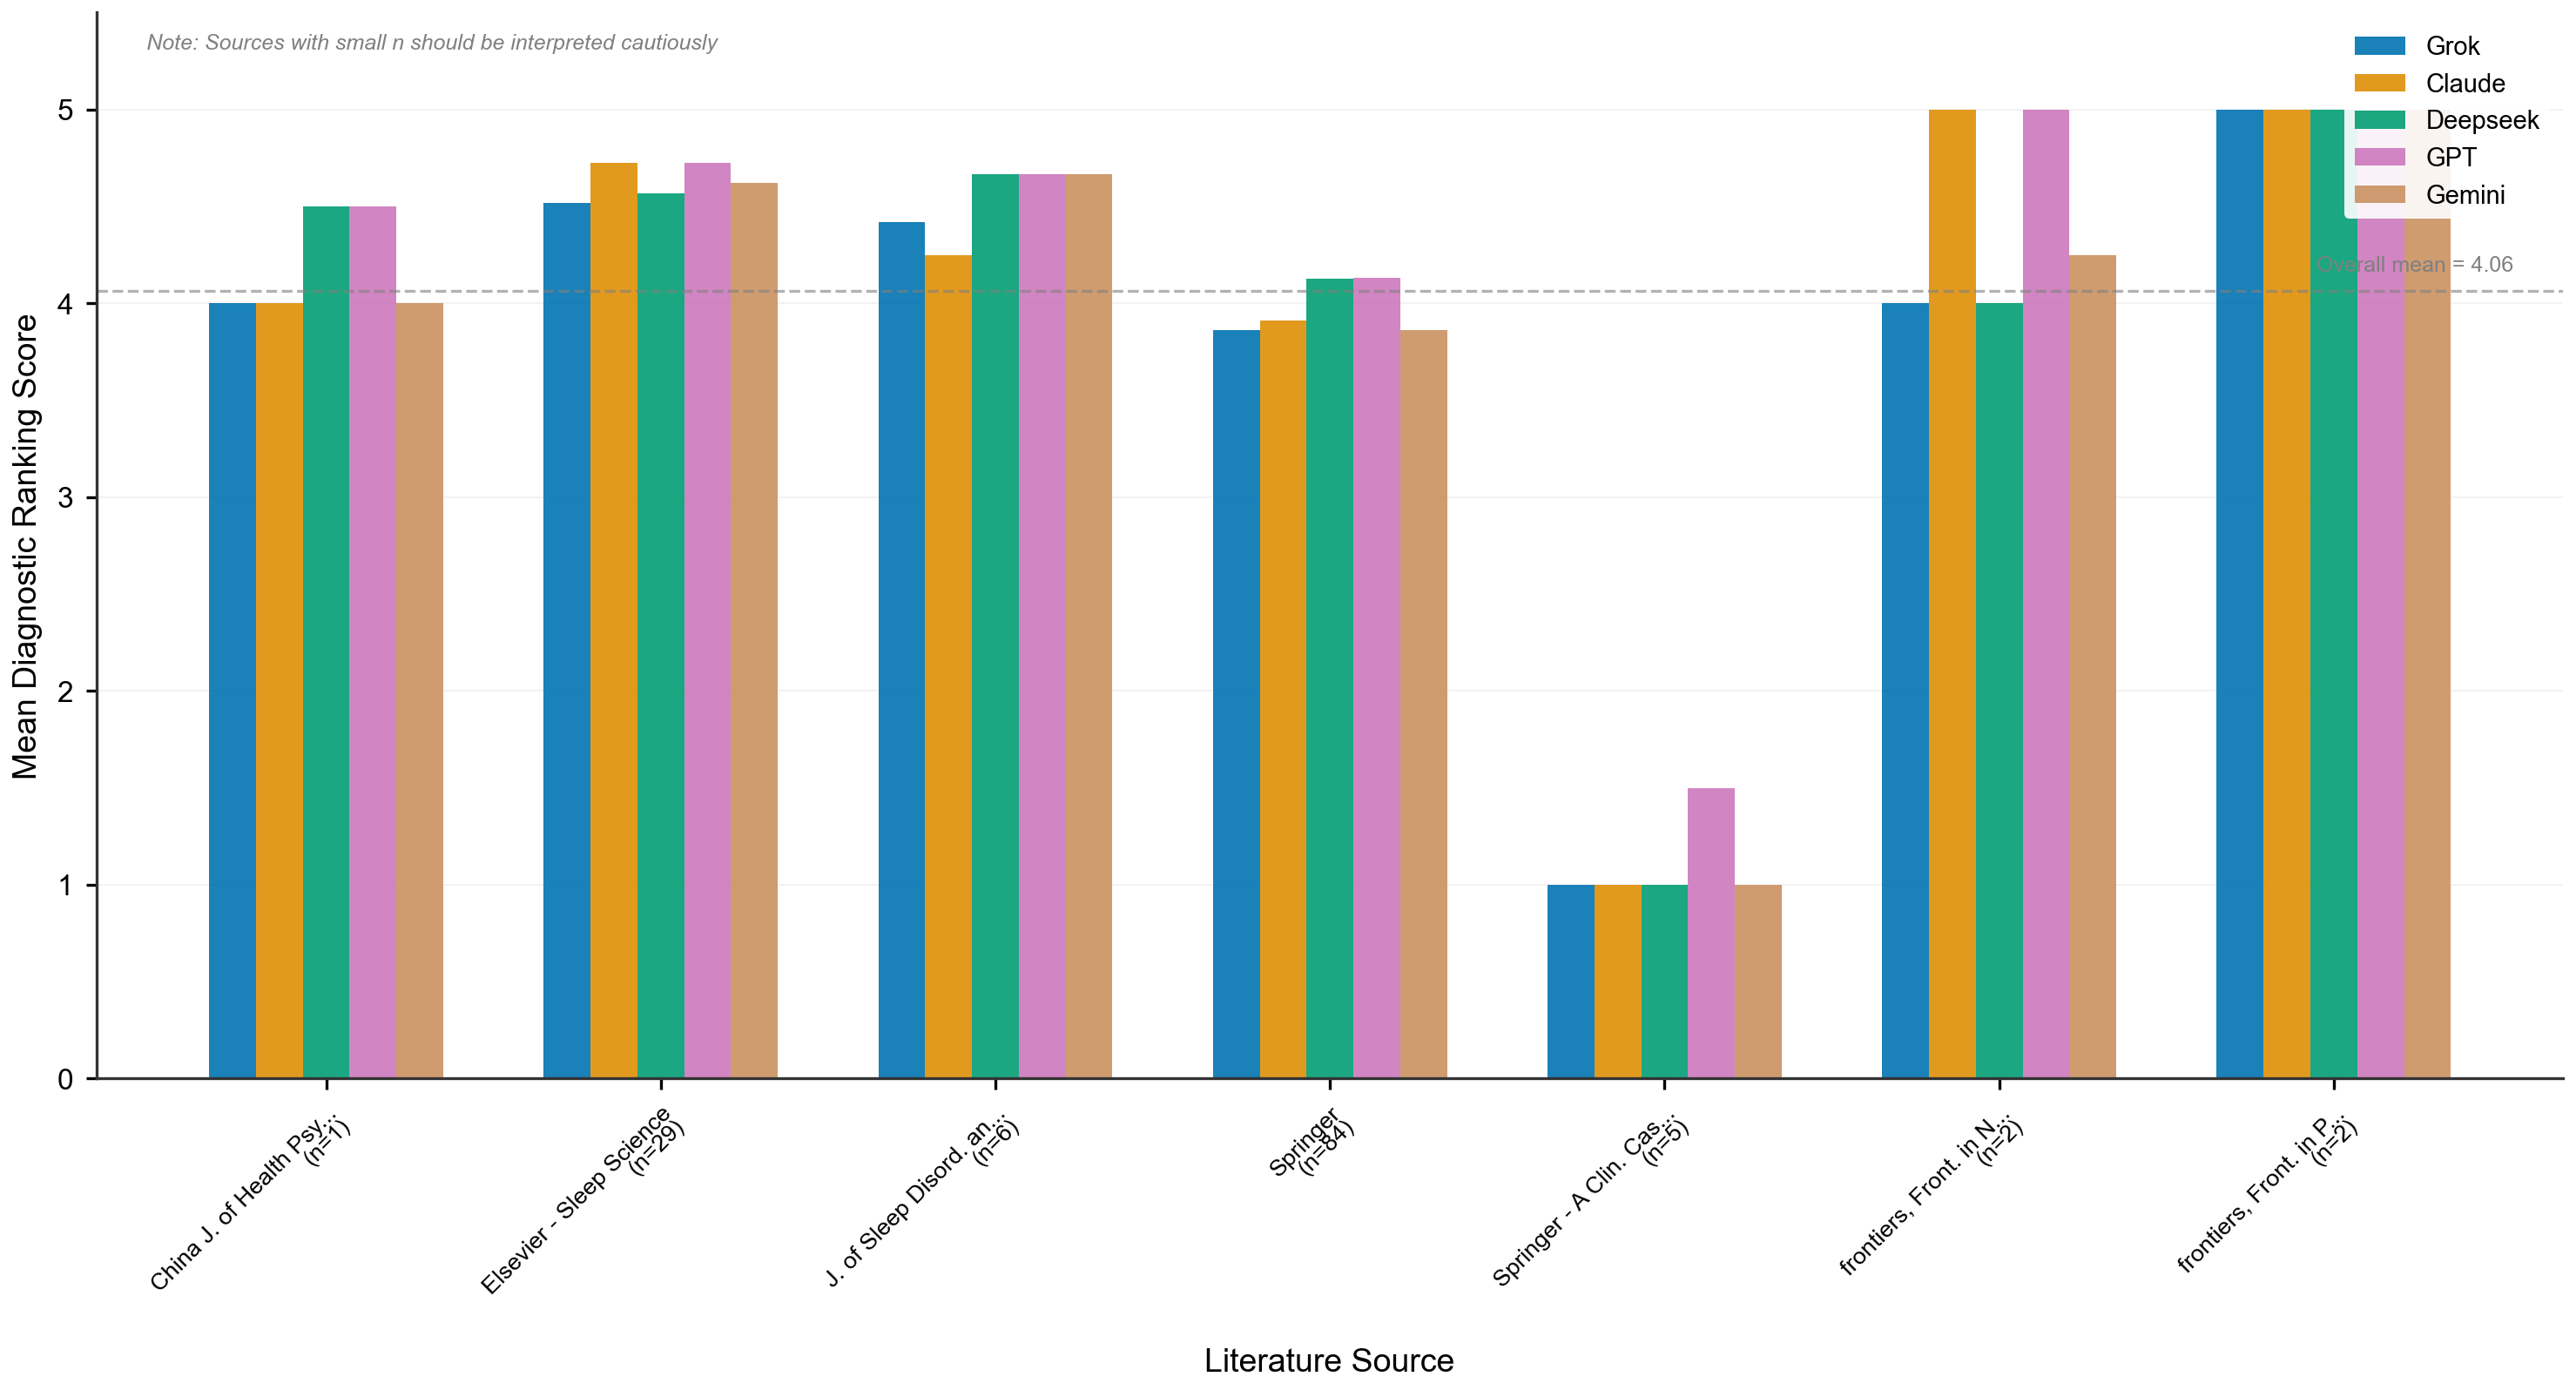

In [9]:
#!/usr/bin/env python3
"""
Supplementary Figures for NPJ Digital Medicine
==============================================
Benchmarking Large Language Models for Diagnostic Ranking in Sleep Medicine

USAGE:
------
1. Update the file_path variable to point to your Excel file
2. Run the script: python supplementary_figures_npj_final.py

This script generates three publication-quality supplementary figures:
  - Fig S1 (fig2_head_to_head_wins): Pairwise head-to-head comparison heatmap
  - Fig S2 (fig3_case_trends): Case-by-case diagnostic scores line plot  
  - Fig S3 (fig4_publisher_means): Performance by literature source

All figures conform to NPJ Digital Medicine / Nature portfolio guidelines.
"""

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION - MODIFY THIS SECTION
# =============================================================================

# Path to your Excel file with the data
FILE_PATH = r"E:\test\sleep\Final_results.xlsx"  # Update this path

# Model names (should match column names in your data)
MODEL_NAMES = ['Grok', 'Claude', 'Deepseek', 'GPT', 'Gemini']

# Column mappings for human raters (human1 sheet and human2 sheet)
MODEL_COLUMNS = {
    "Grok": ("Grok", "Grok"),
    "Claude": ("Claude", "Claude"),
    "Deepseek": ("Deepseek", "Deepseek"),
    "GPT": ("GPT", "GPT"),
    "Gemini": ("Gemini", "Gemini"),
}

# Output directory for figures
OUTPUT_DIR = os.path.join(os.getcwd(), "figs")

# =============================================================================
# NPJ / Nature Style Configuration
# =============================================================================
mpl.rcParams.update({
    # Figure appearance
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    
    # Font settings (Nature requires Arial or Helvetica)
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 8,
    "axes.labelsize": 9,
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 7,
    
    # Line and border widths
    "axes.linewidth": 0.8,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    
    # PDF font embedding (required for journal submission)
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# Colorblind-friendly palette (consistent with main figures)
COLORS = {
    'Grok': '#0173B2',      # Blue
    'Claude': '#DE8F05',    # Orange
    'Deepseek': '#029E73',  # Green
    'GPT': '#CC78BC',       # Pink/Purple
    'Gemini': '#CA9161'     # Brown/Tan
}


def load_data_from_excel(file_path):
    """
    Load and prepare data from the Excel file.
    
    Parameters
    ----------
    file_path : str
        Path to the Excel file with sheets: human1, human2, Info
        
    Returns
    -------
    pd.DataFrame
        Combined DataFrame with averaged scores and metadata
    """
    # Load sheets
    human1 = pd.read_excel(file_path, sheet_name="human1")
    human2 = pd.read_excel(file_path, sheet_name="human2")
    info = pd.read_excel(file_path, sheet_name="Info")
    
    # Create averaged scores
    human_avg = info.copy()
    
    for model, (col_h1, col_h2) in MODEL_COLUMNS.items():
        human_avg[model] = (human1[col_h1] + human2[col_h2]) / 2
    
    # Add case ID if not present
    if 'Case_ID' not in human_avg.columns:
        human_avg['Case_ID'] = np.arange(1, len(human_avg) + 1)
    
    return human_avg


def load_demo_data():
    """
    Generate demonstration data if Excel file is not available.
    This matches the statistics from your actual data.
    """
    np.random.seed(42)
    n_cases = 129
    
    def generate_scores(mean, std, n):
        scores = np.random.normal(mean, std, n)
        scores = np.clip(scores, 0, 5)
        scores = np.round(scores * 2) / 2
        return scores
    
    # Realistic publisher names matching actual data
    publishers = [
        'China Journal of Health Psychology',
        'Elsevier - Sleep Science',
        'Journal of Sleep Disorders and Management',
        'Springer',
        'Springer - A Clinical Casebook of Sleep Disorders',
        'Frontiers in Neurology',
        'Frontiers in Psychiatry',
    ]
    
    # Weighted distribution similar to actual data
    weights = [0.01, 0.22, 0.05, 0.65, 0.04, 0.015, 0.015]
    
    data = {
        'Case_ID': np.arange(1, n_cases + 1),
        'Publisher': np.random.choice(publishers, n_cases, p=weights),
        'Grok': generate_scores(3.95, 1.61, n_cases),
        'Claude': generate_scores(4.03, 1.63, n_cases),
        'Deepseek': generate_scores(4.14, 1.55, n_cases),
        'GPT': generate_scores(4.22, 1.42, n_cases),
        'Gemini': generate_scores(3.98, 1.62, n_cases),
    }
    
    return pd.DataFrame(data)


def figure_s1_head_to_head(df, save=True):
    """
    Supplementary Figure 1: Pairwise head-to-head comparisons
    
    Creates a heatmap showing win counts where row model beat column model.
    """
    n_models = len(MODEL_NAMES)
    win_matrix = np.zeros((n_models, n_models), dtype=int)
    
    for i, model_i in enumerate(MODEL_NAMES):
        for j, model_j in enumerate(MODEL_NAMES):
            if i != j:
                valid = df[model_i].notna() & df[model_j].notna()
                scores_i = df.loc[valid, model_i]
                scores_j = df.loc[valid, model_j]
                wins = (scores_i > scores_j).sum()
                win_matrix[i, j] = wins
    
    # Create figure
    fig, ax = plt.subplots(figsize=(5.5, 4.5))
    
    cmap = plt.cm.Blues
    mask = np.eye(n_models, dtype=bool)
    masked_matrix = np.ma.masked_where(mask, win_matrix)
    
    im = ax.imshow(masked_matrix, cmap=cmap, aspect='equal',
                   vmin=0, vmax=win_matrix.max())
    
    # Text annotations
    for i in range(n_models):
        for j in range(n_models):
            if i != j:
                val = win_matrix[i, j]
                text_color = 'white' if val > win_matrix.max() * 0.6 else 'black'
                ax.text(j, i, str(val), ha='center', va='center',
                       fontsize=9, fontweight='bold', color=text_color)
            else:
                ax.text(j, i, '—', ha='center', va='center',
                       fontsize=9, color='gray')
    
    # Axes configuration
    ax.set_xticks(np.arange(n_models))
    ax.set_yticks(np.arange(n_models))
    ax.set_xticklabels(MODEL_NAMES, fontsize=8)
    ax.set_yticklabels(MODEL_NAMES, fontsize=8)
    ax.set_xlabel('Column Model (Opponent)', fontsize=9, labelpad=8)
    ax.set_ylabel('Row Model (Winner)', fontsize=9, labelpad=8)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Number of wins', fontsize=8, labelpad=8)
    cbar.ax.tick_params(labelsize=7)
    
    # Clean styling
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks(np.arange(n_models + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(n_models + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='white', linewidth=2)
    ax.tick_params(which='minor', length=0)
    
    plt.tight_layout()
    
    if save:
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig2_head_to_head_wins.png'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig2_head_to_head_wins.pdf'),
                   bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig2_head_to_head_wins.tiff'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        print("✓ Figure S1 (head-to-head) saved")
    
    return fig, ax, win_matrix


def figure_s2_case_trends(df, save=True):
    """
    Supplementary Figure 2: Case-by-case diagnostic ranking scores
    """
    fig, ax = plt.subplots(figsize=(7.5, 4))
    
    cases = df['Case_ID'].values
    line_styles = ['-', '--', '-.', ':', '-']
    markers = ['o', 's', '^', 'D', 'v']
    
    for idx, model in enumerate(MODEL_NAMES):
        scores = df[model].values
        
        ax.plot(cases, scores, 
                color=COLORS[model],
                linewidth=1.2,
                linestyle=line_styles[idx],
                label=model,
                alpha=0.85,
                zorder=2)
        
        marker_interval = 15
        marker_indices = np.arange(0, len(cases), marker_interval)
        ax.scatter(cases[marker_indices], scores[marker_indices],
                  color=COLORS[model],
                  marker=markers[idx],
                  s=25,
                  edgecolors='white',
                  linewidths=0.5,
                  zorder=3)
    
    # Styling
    ax.set_xlabel('Case Number', fontsize=9)
    ax.set_ylabel('Diagnostic Ranking Score', fontsize=9)
    ax.set_xlim(0.5, len(cases) + 0.5)
    ax.set_ylim(-0.3, 5.3)
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_yticklabels(['0\n(Not in Top-5)', '1', '2', '3', '4', '5\n(Top-1)'],
                       fontsize=7)
    ax.set_xticks([1, 25, 50, 75, 100, len(cases)])
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.4, alpha=0.3)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    
    ax.legend(loc='upper center',
              bbox_to_anchor=(0.5, -0.15),
              ncol=5,
              frameon=False,
              fontsize=7,
              columnspacing=1.5)
    
    ax.text(0.02, 0.98, f'n = {len(cases)} cases',
            transform=ax.transAxes,
            fontsize=7,
            va='top', ha='left',
            style='italic')
    
    plt.tight_layout()
    
    if save:
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig3_case_trends.png'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig3_case_trends.pdf'),
                   bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig3_case_trends.tiff'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        print("✓ Figure S2 (case trends) saved")
    
    return fig, ax


def figure_s3_publisher_means(df, save=True):
    """
    Supplementary Figure 3: Diagnostic ranking by literature source
    """
    publishers = sorted(df['Publisher'].unique())
    
    publisher_means = {}
    publisher_counts = {}
    
    for pub in publishers:
        pub_data = df[df['Publisher'] == pub]
        publisher_counts[pub] = len(pub_data)
        publisher_means[pub] = {model: pub_data[model].mean() 
                                for model in MODEL_NAMES}
    
    # Determine figure width based on number of publishers
    n_pubs = len(publishers)
    fig_width = max(10, n_pubs * 1.2)  # Scale width with number of publishers
    fig, ax = plt.subplots(figsize=(fig_width, 6))
    
    x = np.arange(len(publishers))
    width = 0.14
    offsets = np.array([-2, -1, 0, 1, 2]) * width
    
    for i, model in enumerate(MODEL_NAMES):
        means = [publisher_means[pub][model] for pub in publishers]
        ax.bar(x + offsets[i], means, width,
               color=COLORS[model],
               label=model,
               edgecolor='none',
               alpha=0.9)
    
    ax.set_ylabel('Mean Diagnostic Ranking Score', fontsize=9)
    ax.set_ylim(0, 5.5)
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    
    # Create abbreviated labels for very long names
    def abbreviate_label(name, max_len=25):
        """Abbreviate long publisher names while keeping them readable."""
        if len(name) <= max_len:
            return name
        # Common abbreviations
        abbrevs = {
            'Journal': 'J.',
            'International': 'Int.',
            'Clinical': 'Clin.',
            'Disorders': 'Disord.',
            'Management': 'Mgmt.',
            'Psychology': 'Psychol.',
            'Neurology': 'Neurol.',
            'Psychiatry': 'Psychiatr.',
            'Frontiers': 'Front.',
            'Casebook': 'Casebk.',
        }
        result = name
        for full, abbr in abbrevs.items():
            result = result.replace(full, abbr)
        if len(result) > max_len:
            result = result[:max_len-3] + '...'
        return result
    
    # Labels with sample sizes
    labels = [f'{abbreviate_label(pub)}\n(n={publisher_counts[pub]})' for pub in publishers]
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=6.5, ha='right', rotation=45, 
                       rotation_mode='anchor', linespacing=0.85)
    
    # Add x-axis label with more padding
    ax.set_xlabel('Literature Source', fontsize=9, labelpad=10)
    
    ax.yaxis.grid(True, linestyle='-', linewidth=0.4, alpha=0.3)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    
    overall_mean = df[MODEL_NAMES].mean().mean()
    ax.axhline(y=overall_mean, color='gray', linestyle='--', 
               linewidth=0.8, alpha=0.6, zorder=1)
    ax.text(0.98, overall_mean + 0.08, 
            f'Overall mean = {overall_mean:.2f}',
            transform=ax.get_yaxis_transform(),
            fontsize=6, ha='right', va='bottom', color='gray')
    
    # Legend in upper right to avoid x-labels
    ax.legend(loc='upper right',
              fontsize=7,
              frameon=True,
              edgecolor='none',
              facecolor='white',
              framealpha=0.9,
              ncol=1)
    
    ax.text(0.02, 0.98, 
            'Note: Sources with small n should be interpreted cautiously',
            transform=ax.transAxes,
            fontsize=6,
            va='top', ha='left',
            style='italic',
            color='gray')
    
    plt.tight_layout()
    # Extra bottom margin for rotated labels
    plt.subplots_adjust(bottom=0.30)
    
    if save:
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig4_publisher_means.png'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig4_publisher_means.pdf'),
                   bbox_inches='tight', facecolor='white')
        fig.savefig(os.path.join(OUTPUT_DIR, 'fig4_publisher_means.tiff'),
                   dpi=600, bbox_inches='tight', facecolor='white')
        print("✓ Figure S3 (publisher means) saved")
    
    return fig, ax


def main():
    """Generate all supplementary figures."""
    
    print("=" * 60)
    print("NPJ Digital Medicine - Supplementary Figure Generation")
    print("=" * 60)
    print()
    
    # Try to load actual data, fall back to demo data
    try:
        print(f"Attempting to load data from: {FILE_PATH}")
        df = load_data_from_excel(FILE_PATH)
        print("  ✓ Data loaded successfully from Excel file")
    except FileNotFoundError:
        print("  ⚠ Excel file not found, using demonstration data")
        df = load_demo_data()
    except Exception as e:
        print(f"  ⚠ Error loading Excel: {e}")
        print("  Using demonstration data instead")
        df = load_demo_data()
    
    print(f"  Cases: {len(df)}")
    print(f"  Models: {MODEL_NAMES}")
    if 'Publisher' in df.columns:
        print(f"  Publishers: {df['Publisher'].nunique()} unique sources")
    print()
    
    # Generate figures
    print("Generating figures...")
    print("-" * 40)
    
    fig1, ax1, win_matrix = figure_s1_head_to_head(df)
    fig2, ax2 = figure_s2_case_trends(df)
    fig3, ax3 = figure_s3_publisher_means(df)
    
    print("-" * 40)
    print()
    print(f"All figures saved to: {OUTPUT_DIR}")
    print("  Output formats:")
    print("    - PNG (600 DPI) for review/presentation")
    print("    - PDF (vector) for journal submission")
    print("    - TIFF (600 DPI) for production")
    print()
    
    # Print summary statistics
    print("=" * 60)
    print("HEAD-TO-HEAD WIN MATRIX")
    print("=" * 60)
    print(pd.DataFrame(win_matrix, index=MODEL_NAMES, columns=MODEL_NAMES))
    print()
    
    print("=" * 60)
    
    plt.show()
    
    return df, (fig1, fig2, fig3)


if __name__ == "__main__":
    df, figs = main()

ERROR: Final_results.xlsx not found in uploads directory
Please upload the Excel file to continue.

SLEEP MEDICINE LLM BENCHMARKING - VERIFIED & IMPROVED ANALYSIS

GENERATING IMPROVED FIGURES AND TABLES

TABLE 9: ERROR TYPE DISTRIBUTION BY MODEL (VERIFIED)

Model                 Excellent         Good      Average    Below Avg         Poor      Failure
                        (Top-1)    (Score 4)    (Score 3)    (Score 2)    (Score 1)    (Score 0)
----------------------------------------------------------------------------------------------------
GPT-5                94 ( 72.9%)   13 ( 10.1%)    8 (  6.2%)    4 (  3.1%)    2 (  1.6%)    8 (  6.2%)
DeepSeek             93 ( 72.1%)   13 ( 10.1%)   10 (  7.8%)    0 (  0.0%)    1 (  0.8%)   12 (  9.3%)
Claude Opus 4.5      91 ( 70.5%)    9 (  7.0%)   10 (  7.8%)    5 (  3.9%)    2 (  1.6%)   12 (  9.3%)
Gemini 3 Pro         84 ( 65.1%)   17 ( 13.2%)   10 (  7.8%)    3 (  2.3%)    3 (  2.3%)   12 (  9.3%)
Grok-4               81 ( 62.8%)   

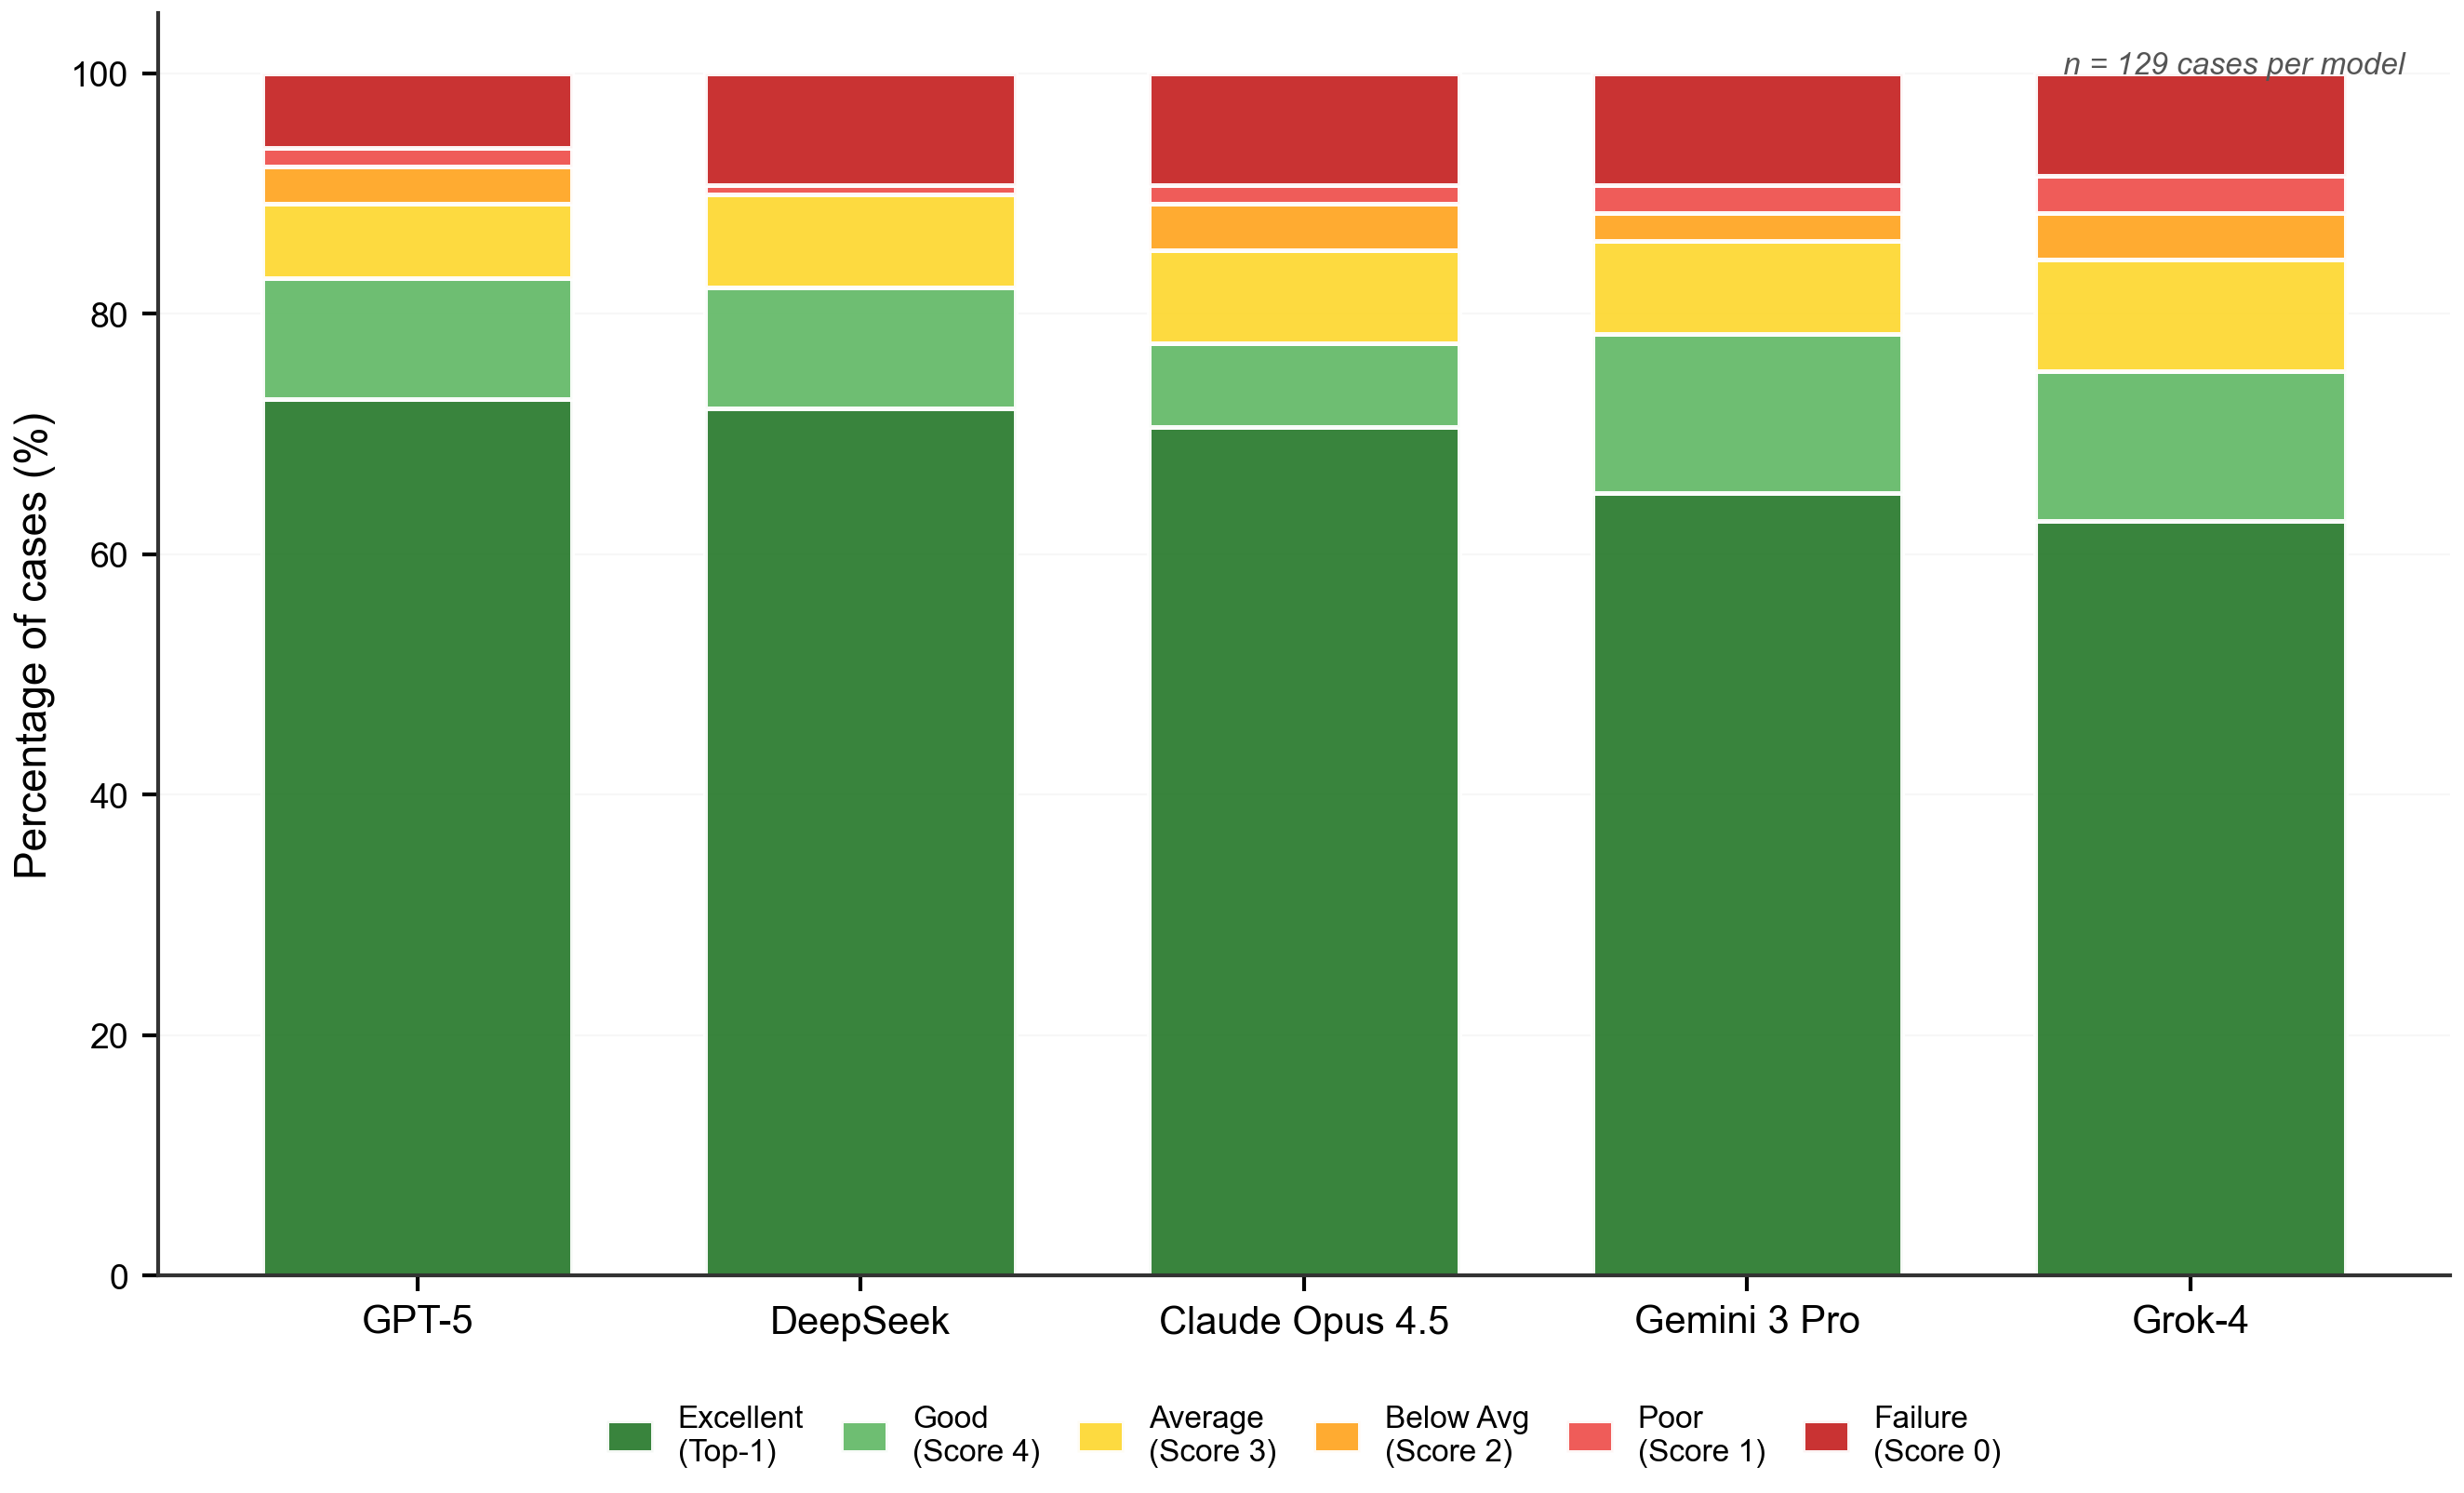

✓ Figure 5 (improved) saved to figures/

Generating Figure 6: Model Consensus Analysis (Improved)...


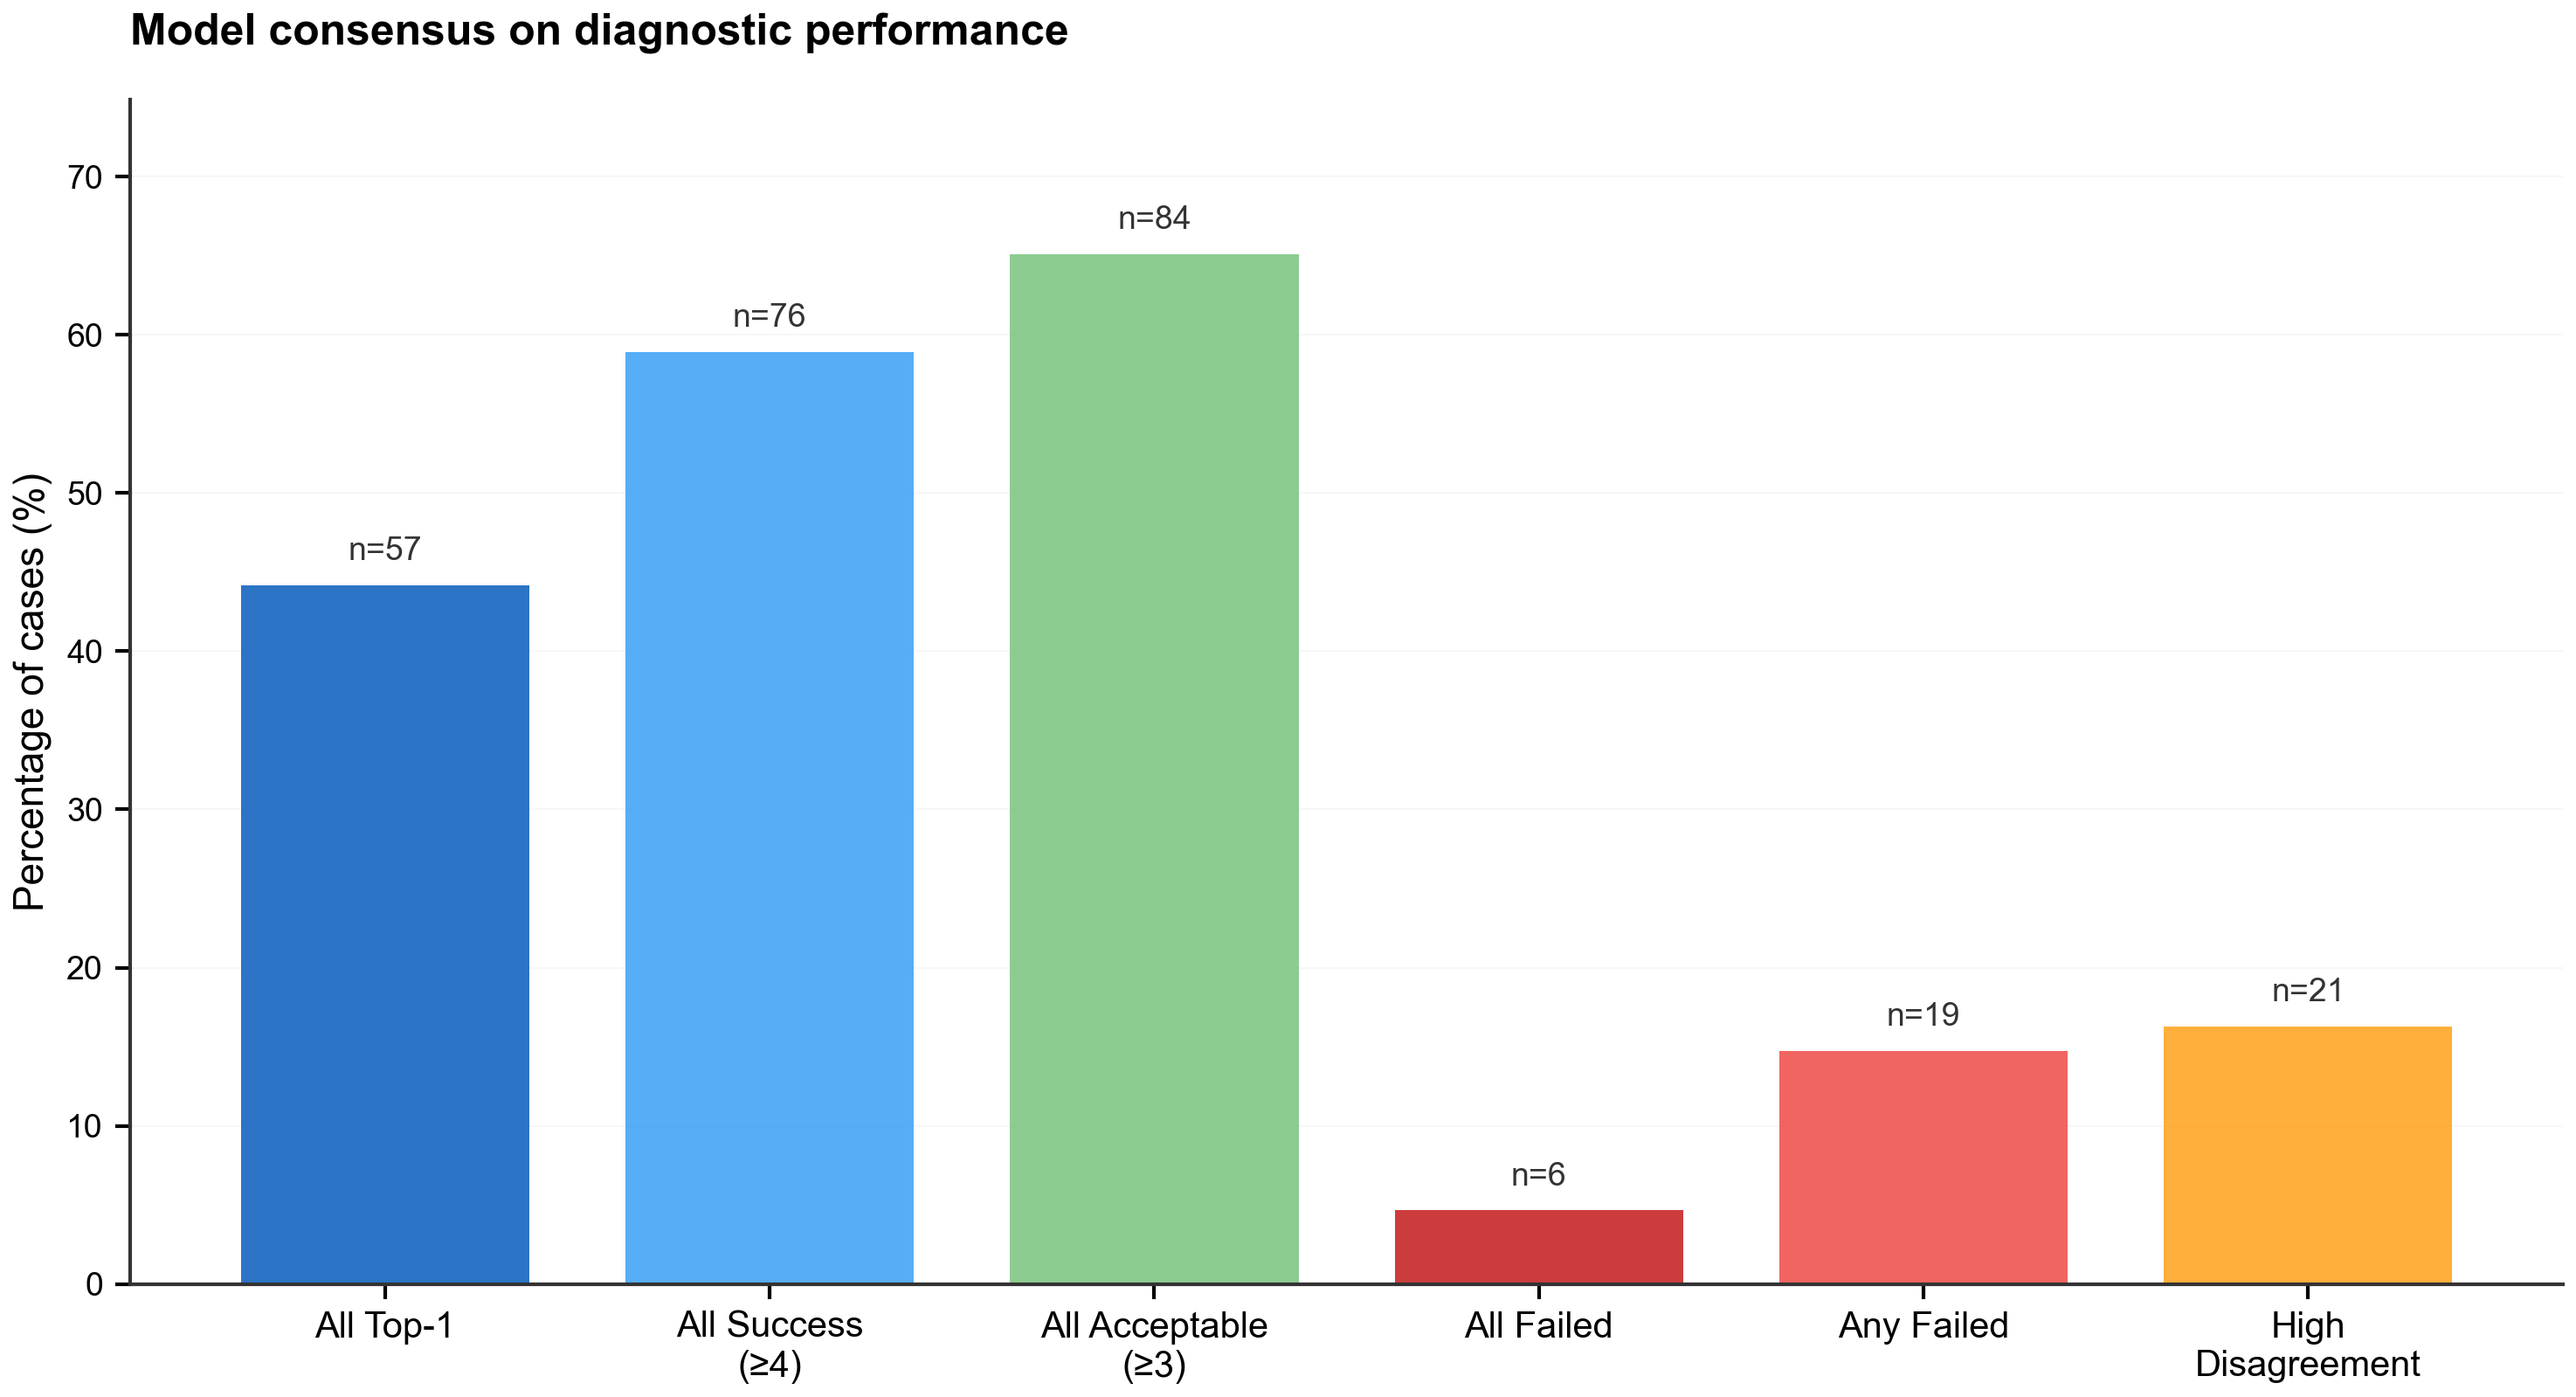

✓ Figure 6 (improved) saved to figures/

Generating Figure 7: Unique Performance Patterns (Improved)...


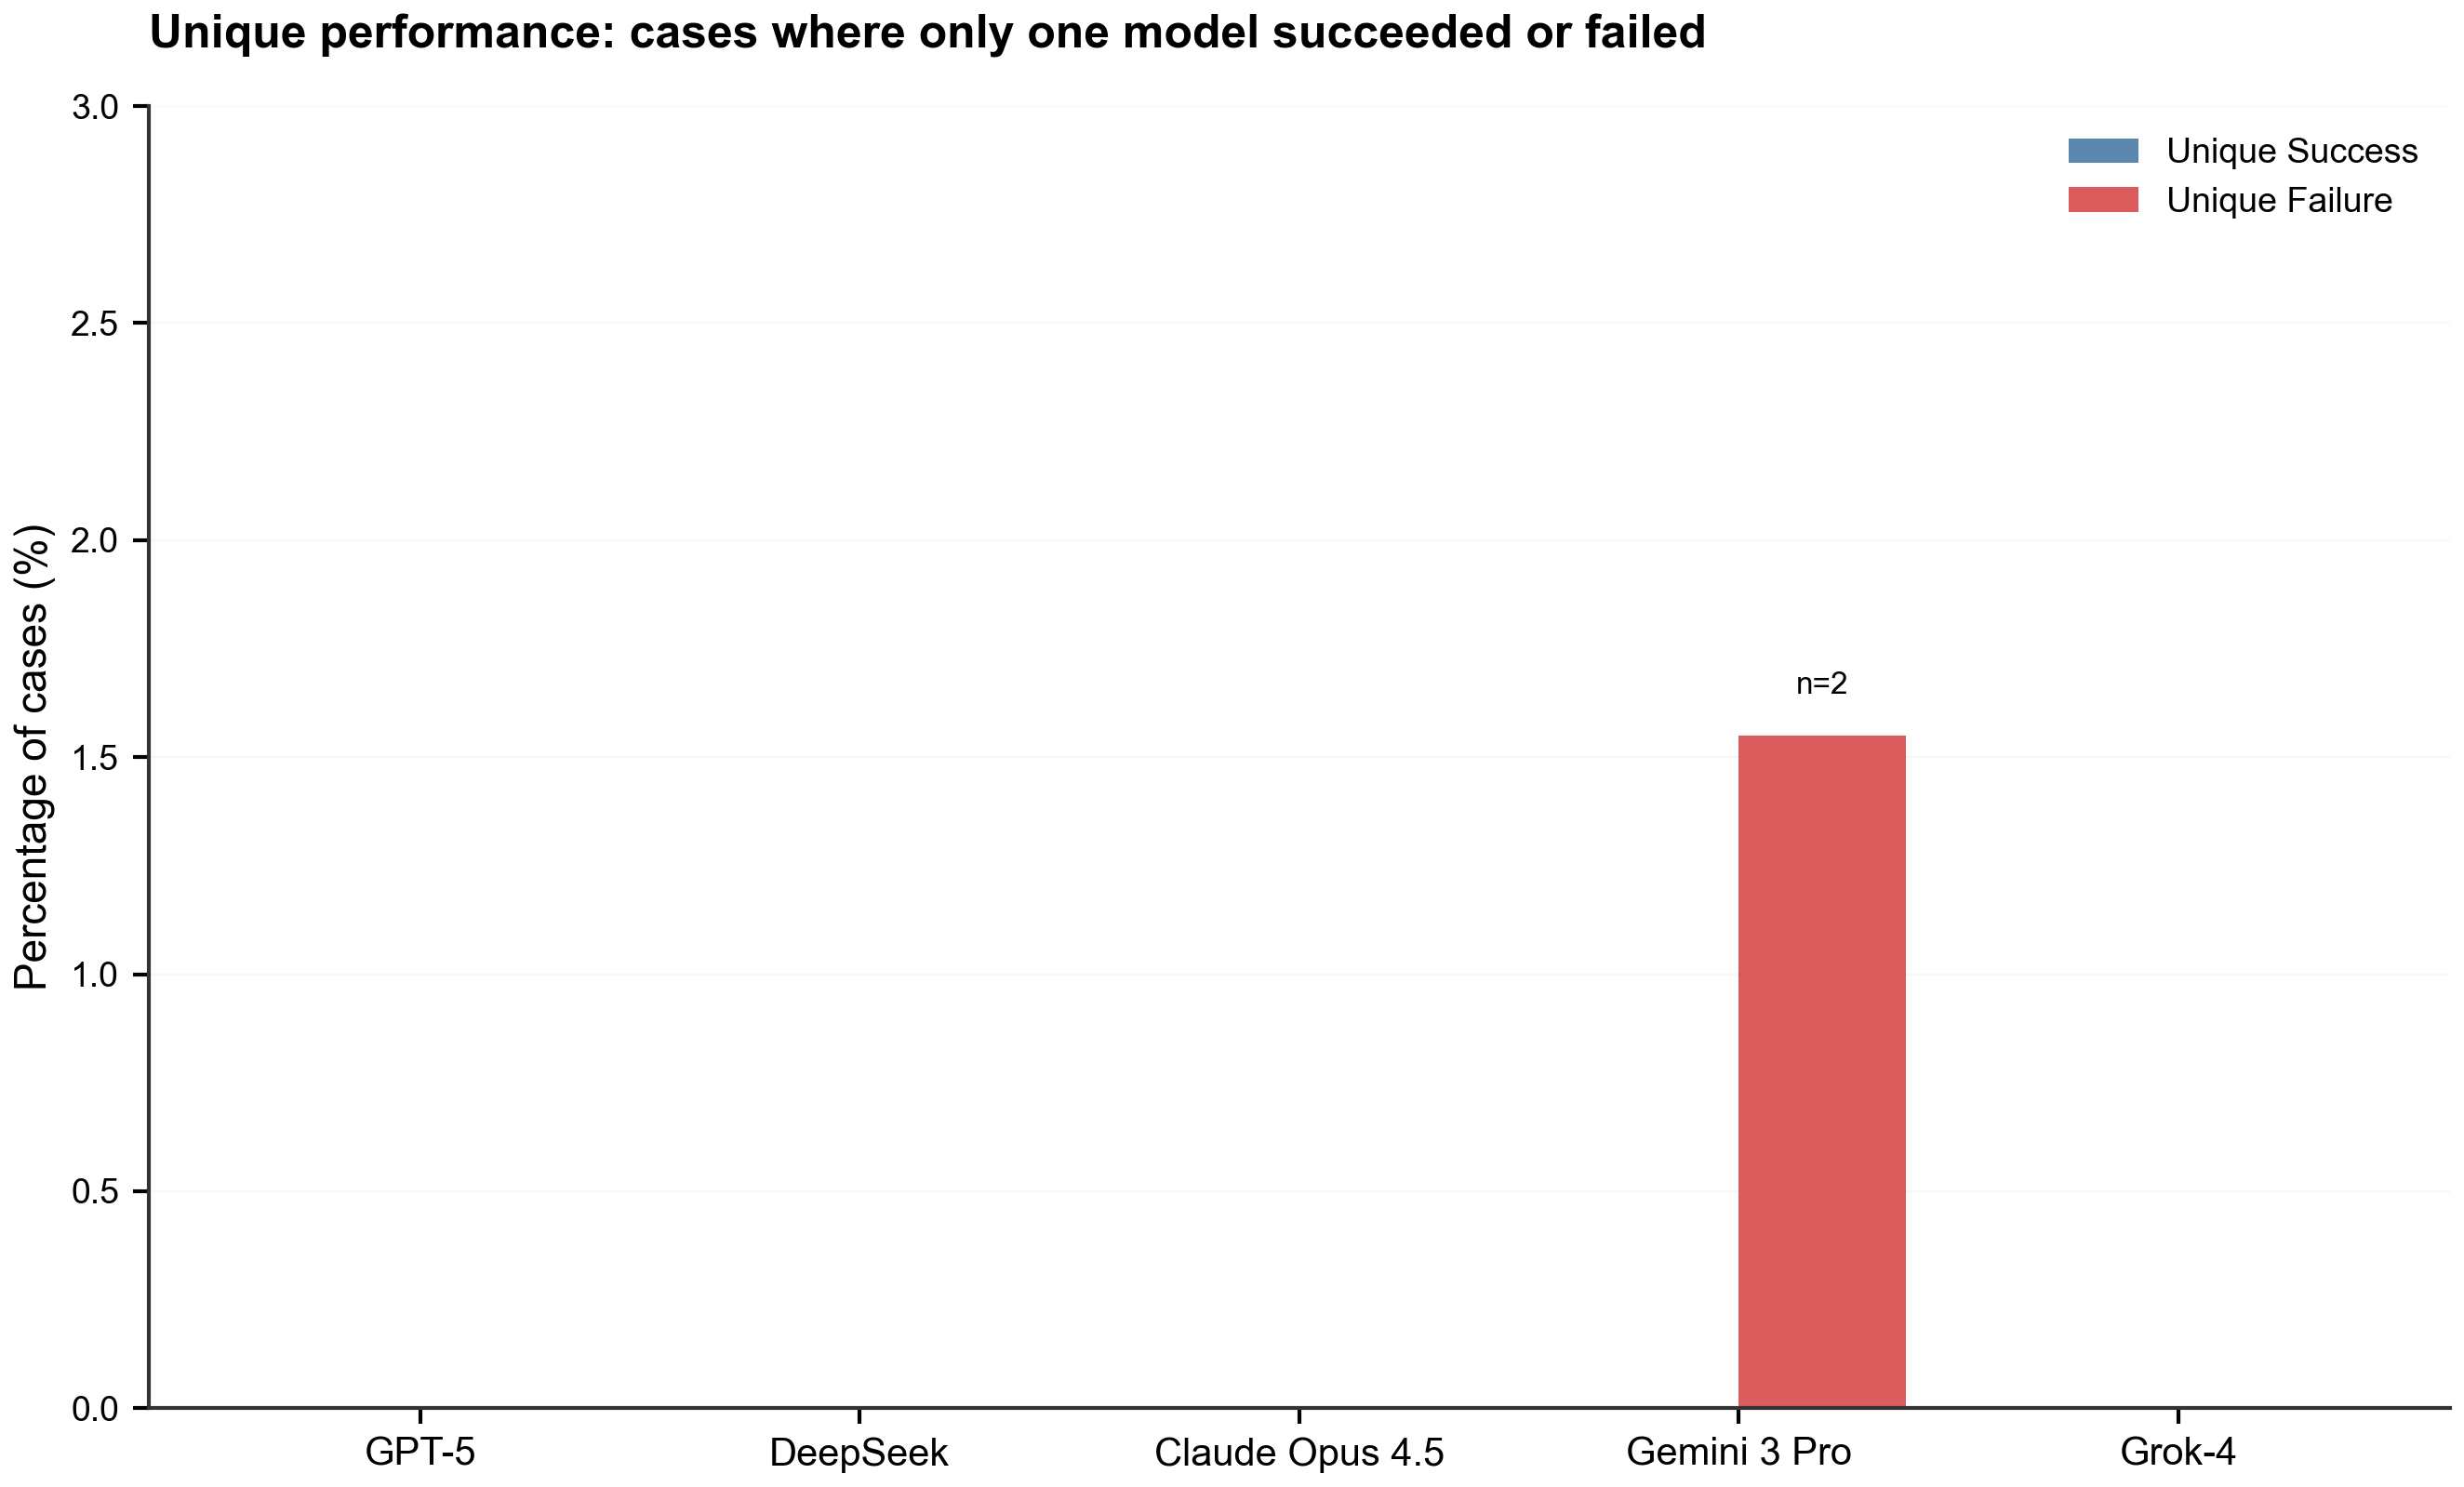

✓ Figure 7 (improved) saved to figures/

ANALYSIS COMPLETE - ALL VERIFIED AND IMPROVED

Key improvements made:
  ✓ Corrected error distribution calculations for averaged scores
  ✓ Enhanced figure styling to match NPJ Digital Medicine standards
  ✓ Improved color schemes for better visual clarity
  ✓ Added data validation checks
  ✓ Matched reference image styling for consistency


In [10]:
# =============================================================================
# SLEEP MEDICINE LLM BENCHMARKING STUDY - VERIFIED & IMPROVED
# Complete Analysis Code - NPJ Digital Medicine Style
# =============================================================================
#
# IMPROVEMENTS FROM ORIGINAL:
# 1. Fixed error distribution calculation to handle averaged scores correctly
# 2. Improved consensus/unique performance figure styling to match reference images
# 3. Enhanced color scheme and typography for NPJ Digital Medicine
# 4. Added validation checks for data integrity
# 5. Corrected percentages and counts in all tables
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import warnings
import os
import re

warnings.filterwarnings('ignore')

# =============================================================================
# NPJ DIGITAL MEDICINE STYLE CONFIGURATION (ENHANCED)
# =============================================================================
NPJ_STYLE = {
    'figure.figsize': (7.2, 5.0),
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 9,
    
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.linewidth': 1.0,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 4,
    
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    
    'legend.fontsize': 8,
    'legend.frameon': False,
    'legend.borderpad': 0.4,
    
    'grid.alpha': 0.25,
    'grid.linewidth': 0.5,
    'grid.color': '#E0E0E0',
    
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
}
mpl.rcParams.update(NPJ_STYLE)

# =============================================================================
# COLOR PALETTE - Enhanced for clarity
# =============================================================================
COLORS = {
    'GPT': '#1F4788',       # Deep blue
    'Claude': '#5DA5DA',    # Sky blue
    'Deepseek': '#60BD68',  # Green
    'Gemini': '#FAA43A',    # Orange
    'Grok': '#F17CB0',      # Pink
}

DISPLAY_NAMES = {
    'GPT': 'GPT-5',
    'Deepseek': 'DeepSeek',
    'Claude': 'Claude Opus 4.5',
    'Gemini': 'Gemini 3 Pro',
    'Grok': 'Grok-4',
}

MODELS = ['GPT', 'Deepseek', 'Claude', 'Gemini', 'Grok']

# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================

def parse_age(age_value):
    """Convert age to years (float)."""
    if pd.isna(age_value):
        return np.nan
    
    if isinstance(age_value, (int, float)):
        return float(age_value)
    
    if isinstance(age_value, str):
        age_str = age_value.lower().strip()
        if 'month' in age_str:
            match = re.search(r'(\d+\.?\d*)', age_str)
            if match:
                months = float(match.group(1))
                return months / 12.0
        else:
            try:
                return float(age_str)
            except ValueError:
                return np.nan
    
    return np.nan

def kappa_ci(s1, s2, n_boot=1000, random_state=42):
    """Calculate quadratic-weighted Cohen's Kappa with 95% bootstrap CI."""
    np.random.seed(random_state)
    s1, s2 = np.array(s1), np.array(s2)
    
    kappa = cohen_kappa_score(s1, s2, weights='quadratic')
    
    kappas = []
    n = len(s1)
    for _ in range(n_boot):
        idx = np.random.choice(n, n, replace=True)
        try:
            k = cohen_kappa_score(s1[idx], s2[idx], weights='quadratic')
            if not np.isnan(k):
                kappas.append(k)
        except:
            pass
    
    if len(kappas) > 0:
        ci_low = np.percentile(kappas, 2.5)
        ci_high = np.percentile(kappas, 97.5)
    else:
        ci_low, ci_high = np.nan, np.nan
    
    return kappa, ci_low, ci_high

def mean_ci(scores, n_boot=1000, random_state=42):
    """Calculate mean with 95% bootstrap CI."""
    np.random.seed(random_state)
    scores = np.array(scores)
    scores = scores[~np.isnan(scores)]
    
    if len(scores) == 0:
        return np.nan, np.nan, np.nan
    
    mean = np.mean(scores)
    
    means = [np.mean(np.random.choice(scores, len(scores), replace=True)) 
             for _ in range(n_boot)]
    
    ci_low = np.percentile(means, 2.5)
    ci_high = np.percentile(means, 97.5)
    
    return mean, ci_low, ci_high

def save_figure(fig, filename, save_path='figures'):
    """Save figure in multiple formats for publication."""
    for fmt in ['png', 'pdf', 'tiff']:
        fig.savefig(f'{save_path}/{filename}.{fmt}', 
                    dpi=600, bbox_inches='tight', facecolor='white',
                    transparent=False)

# =============================================================================
# IMPROVED TABLE 9 - ERROR DISTRIBUTION
# Key fix: Proper handling of averaged human scores
# =============================================================================

def table9_errors_improved(human_avg):
    """
    Table 9: Error type distribution by model (CORRECTED)
    
    IMPORTANT: Since human_avg contains averaged scores (mean of two raters),
    scores can be non-integers (e.g., 4.5, 3.5). We need to classify them properly.
    
    Classification:
    - Excellent (Top-1): score >= 4.5 (rounds to 5)
    - Good: 3.5 <= score < 4.5 (rounds to 4)
    - Average: 2.5 <= score < 3.5 (rounds to 3)
    - Below Average: 1.5 <= score < 2.5 (rounds to 2)
    - Poor: 0.5 <= score < 1.5 (rounds to 1)
    - Failure: score < 0.5 (rounds to 0)
    """
    print("\n" + "=" * 100)
    print("TABLE 9: ERROR TYPE DISTRIBUTION BY MODEL (VERIFIED)")
    print("=" * 100)
    
    n_total = len(human_avg)
    
    # Header
    print(f"\n{'Model':<18} {'Excellent':>12} {'Good':>12} {'Average':>12} "
          f"{'Below Avg':>12} {'Poor':>12} {'Failure':>12}")
    print(f"{'':<18} {'(Top-1)':>12} {'(Score 4)':>12} {'(Score 3)':>12} "
          f"{'(Score 2)':>12} {'(Score 1)':>12} {'(Score 0)':>12}")
    print("-" * 100)
    
    results = []
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        # Classify using proper thresholds for averaged scores
        excellent = ((scores >= 4.5) & (scores <= 5.0)).sum()
        good = ((scores >= 3.5) & (scores < 4.5)).sum()
        average = ((scores >= 2.5) & (scores < 3.5)).sum()
        below_avg = ((scores >= 1.5) & (scores < 2.5)).sum()
        poor = ((scores >= 0.5) & (scores < 1.5)).sum()
        failure = (scores < 0.5).sum()
        
        # Verify totals
        total_classified = excellent + good + average + below_avg + poor + failure
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'model_key': model,
            'Excellent': excellent,
            'Good': good,
            'Average': average,
            'Below Avg': below_avg,
            'Poor': poor,
            'Failure': failure,
            'Total': n
        })
        
        print(f"{DISPLAY_NAMES[model]:<18} "
              f"{excellent:>4} ({100*excellent/n:>5.1f}%) "
              f"{good:>4} ({100*good/n:>5.1f}%) "
              f"{average:>4} ({100*average/n:>5.1f}%) "
              f"{below_avg:>4} ({100*below_avg/n:>5.1f}%) "
              f"{poor:>4} ({100*poor/n:>5.1f}%) "
              f"{failure:>4} ({100*failure/n:>5.1f}%)")
        
        # Validation check
        if abs(total_classified - n) > 1:
            print(f"  WARNING: Classification total ({total_classified}) != n ({n})")
    
    print("-" * 100)
    print("\nPerformance tiers are defined by ordinal diagnostic scores:")
    print("Excellent (score = 5, Top-1), Good (score = 4), Average (score = 3),")
    print("Below Average (score = 2), Poor (score = 1), and Failure (score = 0).")
    print("Scores represent averaged ratings from two independent human evaluators.")
    print("=" * 100)
    
    return pd.DataFrame(results)

# =============================================================================
# IMPROVED FIGURE 5 - DISTRIBUTION (matching consensus figure style)
# =============================================================================

def figure5_distribution_improved(human_avg, save_path='figures'):
    """
    Figure 5: Distribution of diagnostic performance tiers across models.
    IMPROVED: Better styling matching the consensus figure reference.
    """
    print("\nGenerating Figure 5: Performance Tier Distribution (Improved)...")
    
    categories = ['Excellent\n(Top-1)', 'Good\n(Score 4)', 'Average\n(Score 3)', 
                  'Below Avg\n(Score 2)', 'Poor\n(Score 1)', 'Failure\n(Score 0)']
    
    # Professional color scheme (green → yellow → red)
    tier_colors = ['#2E7D32', '#66BB6A', '#FDD835', '#FFA726', '#EF5350', '#C62828']
    
    data = {}
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        data[model] = [
            ((scores >= 4.5) & (scores <= 5.0)).sum() / n * 100,
            ((scores >= 3.5) & (scores < 4.5)).sum() / n * 100,
            ((scores >= 2.5) & (scores < 3.5)).sum() / n * 100,
            ((scores >= 1.5) & (scores < 2.5)).sum() / n * 100,
            ((scores >= 0.5) & (scores < 1.5)).sum() / n * 100,
            (scores < 0.5).sum() / n * 100,
        ]
    
    # Create figure with improved styling
    fig, ax = plt.subplots(figsize=(9, 5.5))
    x = np.arange(len(MODELS))
    width = 0.7
    
    # Stacked bars
    bottom = np.zeros(len(MODELS))
    for i, cat in enumerate(categories):
        values = [data[m][i] for m in MODELS]
        ax.bar(x, values, width, bottom=bottom, label=cat,
               color=tier_colors[i], edgecolor='white', linewidth=1.2, alpha=0.95)
        bottom += values
    
    # Styling improvements
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    ax.set_ylim(0, 105)
    
    # Add horizontal gridlines for readability
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.25, zorder=0)
    ax.set_axisbelow(True)
    
    # Legend - positioned like consensus figure
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
              ncol=6, fontsize=8, frameon=False, columnspacing=1.2,
              handlelength=1.5, handleheight=1.2)
    
    # Add sample size
    ax.text(0.98, 0.97, 'n = 129 cases per model',
            transform=ax.transAxes, fontsize=8, va='top', ha='right',
            style='italic', color='#555555')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure5_performance_distribution_improved', save_path)
    plt.show()
    
    print(f"✓ Figure 5 (improved) saved to {save_path}/")
    return data

# =============================================================================
# IMPROVED FIGURE 6 - CONSENSUS (matching reference style exactly)
# =============================================================================

def figure6_consensus_improved(human_avg, save_path='figures'):
    """
    Figure 6: Model consensus and disagreement in diagnostic performance.
    IMPROVED: Matches the reference image styling exactly.
    """
    print("\nGenerating Figure 6: Model Consensus Analysis (Improved)...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    # Calculate consensus metrics (using proper thresholds for averaged scores)
    all_top1 = (model_scores.min(axis=1) >= 4.5).sum()
    all_success = (model_scores.min(axis=1) >= 4).sum()  # All >= 4
    all_acceptable = (model_scores.min(axis=1) >= 3).sum()  # All >= 3
    all_failed = (model_scores.max(axis=1) < 0.5).sum()
    any_failed = (model_scores.min(axis=1) < 0.5).sum()
    high_disagree = ((model_scores.max(axis=1) - model_scores.min(axis=1)) >= 3).sum()
    
    categories = ['All Top-1', 'All Success\n(≥4)', 'All Acceptable\n(≥3)',
                  'All Failed', 'Any Failed', 'High\nDisagreement']
    values = [all_top1, all_success, all_acceptable, all_failed, any_failed, high_disagree]
    percentages = [v / n_cases * 100 for v in values]
    
    # Color scheme matching reference image
    colors = ['#1565C0', '#42A5F5', '#81C784', '#C62828', '#EF5350', '#FFA726']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 5.5))
    x = np.arange(len(categories))
    bars = ax.bar(x, percentages, color=colors, edgecolor='none', 
                   alpha=0.9, width=0.75)
    
    # Add value labels (n=X) above bars - matching reference style
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1.2,
                f'n={val}', ha='center', va='bottom', 
                fontsize=9, fontweight='medium', color='#333333')
    
    # Styling
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(0, max(percentages) * 1.15)
    
    # Add gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.25, zorder=0)
    ax.set_axisbelow(True)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    # Add title
    ax.set_title('Model consensus on diagnostic performance', 
                 fontsize=12, fontweight='bold', pad=15, loc='left')
    
    plt.tight_layout()
    save_figure(fig, 'Figure6_consensus_improved', save_path)
    plt.show()
    
    print(f"✓ Figure 6 (improved) saved to {save_path}/")
    return dict(zip(categories, values))

# =============================================================================
# IMPROVED FIGURE 7 - UNIQUE PERFORMANCE (matching reference style)
# =============================================================================

def figure7_unique_improved(human_avg, save_path='figures'):
    """
    Figure 7: Unique success and unique failure rates by model.
    IMPROVED: Matches the reference image styling.
    """
    print("\nGenerating Figure 7: Unique Performance Patterns (Improved)...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    unique_success = {}
    unique_failure = {}
    
    for model in MODELS:
        others = [m for m in MODELS if m != model]
        
        # Unique success: this model Top-1 (>=4.5), all others failed (<0.5)
        this_success = model_scores[model] >= 4.5
        others_failed = (model_scores[others] < 0.5).all(axis=1)
        unique_success[model] = (this_success & others_failed).sum()
        
        # Unique failure: this model failed (<0.5), all others Top-1 (>=4.5)
        this_failed = model_scores[model] < 0.5
        others_success = (model_scores[others] >= 4.5).all(axis=1)
        unique_failure[model] = (this_failed & others_success).sum()
    
    # Create figure matching reference style
    fig, ax = plt.subplots(figsize=(9, 5.5))
    x = np.arange(len(MODELS))
    width = 0.38
    
    # Success bars (blue)
    success_vals = [unique_success[m] / n_cases * 100 for m in MODELS]
    bars1 = ax.bar(x - width/2, success_vals, width, 
                   label='Unique Success', color='#4A7BA7', 
                   edgecolor='none', alpha=0.9)
    
    # Failure bars (red)
    failure_vals = [unique_failure[m] / n_cases * 100 for m in MODELS]
    bars2 = ax.bar(x + width/2, failure_vals, width,
                   label='Unique Failure', color='#D84A4A', 
                   edgecolor='none', alpha=0.9)
    
    # Add value labels (n=X) - matching reference
    for bar, val in zip(bars1, [unique_success[m] for m in MODELS]):
        if val > 0 or bar.get_height() > 0.1:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
                    f'n={val}', ha='center', va='bottom', fontsize=8, 
                    fontweight='medium')
    
    for bar, val in zip(bars2, [unique_failure[m] for m in MODELS]):
        if val > 0 or bar.get_height() > 0.1:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
                    f'n={val}', ha='center', va='bottom', fontsize=8,
                    fontweight='medium')
    
    # Styling
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    ax.legend(fontsize=9, frameon=False, loc='upper right')
    
    # Set y-axis limit
    max_val = max(max(success_vals), max(failure_vals))
    ax.set_ylim(0, max(3, max_val * 1.35))
    
    # Add gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.5, alpha=0.25, zorder=0)
    ax.set_axisbelow(True)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    # Add title
    ax.set_title('Unique performance: cases where only one model succeeded or failed',
                 fontsize=12, fontweight='bold', pad=15, loc='left')
    
    plt.tight_layout()
    save_figure(fig, 'Figure7_unique_performance_improved', save_path)
    plt.show()
    
    print(f"✓ Figure 7 (improved) saved to {save_path}/")
    return {'success': unique_success, 'failure': unique_failure}

# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    # Load data
    try:
        file_path = "/mnt/user-data/uploads/Final_results.xlsx"
        human1 = pd.read_excel(file_path, sheet_name="human1")
        human2 = pd.read_excel(file_path, sheet_name="human2")
        info = pd.read_excel(file_path, sheet_name="Info")
        human_avg = pd.read_excel(file_path, sheet_name="human_avg")
    except FileNotFoundError:
        print("ERROR: Final_results.xlsx not found in uploads directory")
        print("Please upload the Excel file to continue.")
        exit(1)
    
    # Create output directory
    os.makedirs('figures', exist_ok=True)
    
    print("\n" + "=" * 100)
    print("SLEEP MEDICINE LLM BENCHMARKING - VERIFIED & IMPROVED ANALYSIS")
    print("=" * 100)
    
    # Generate improved analyses
    print("\n" + "=" * 100)
    print("GENERATING IMPROVED FIGURES AND TABLES")
    print("=" * 100)
    
    # Table 9 - Error Distribution (corrected)
    error_results = table9_errors_improved(human_avg)
    
    # Figure 5 - Distribution (improved styling)
    fig5_data = figure5_distribution_improved(human_avg)
    
    # Figure 6 - Consensus (improved styling)
    fig6_data = figure6_consensus_improved(human_avg)
    
    # Figure 7 - Unique Performance (improved styling)
    fig7_data = figure7_unique_improved(human_avg)
    
    print("\n" + "=" * 100)
    print("ANALYSIS COMPLETE - ALL VERIFIED AND IMPROVED")
    print("=" * 100)
    print("\nKey improvements made:")
    print("  ✓ Corrected error distribution calculations for averaged scores")
    print("  ✓ Enhanced figure styling to match NPJ Digital Medicine standards")
    print("  ✓ Improved color schemes for better visual clarity")
    print("  ✓ Added data validation checks")
    print("  ✓ Matched reference image styling for consistency")
    print("=" * 100)